<h1 style="text-align: center;">EDA Credit Analysis</h1>

## PROBLEM STATEMENT : 
Perform a detailed analysis of a dataset that includes diverse financial and demographic information about loan applicants. Our objective is to identify the factors that impact loan default rates and to devise strategies to reduce lending risks.


### Objectives:

**Importing necessary Libraries/Modules**:
- Import the modules necessary for Data Manipulation and Visualization.

**Loading dataset**:
- Read the dataset containing loan applicant information.

**Task 1 - Exploring the Dataset**:
- Understand the Structure and various datatypes of the attributes within the dataset.

**Task 2 - Missing value analysis**:
- Identify and analyze missing values in the dataset.

**Task 3 - Analysing categorical and numerical columns**:
- Analyze categorical and numerical columns to understand the statistical properties and relationships within the dataset.

**Task 4 - Univariate Analysis**:
- Conduct univariate analysis to explore the distribution and characteristics of individual variables.

**Task 5 - Outliers**:
- Identify and analyze outliers within the dataset to understand their impact on the analysis.

**Task 6 - Merging Datasets**:
- Identify and merge different Datasets for further analysis.

**Task 7 - Bivariate analysis**:
- Conduct bivariate analysis to explore relationships between different variables and their impact on loan default rates.

### IMPORTING LIBRARIES/MODULES

In [1]:
# importing all the necessary libraries
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sketch
warnings.filterwarnings("ignore")

### LOADING DATASET

In [2]:
# loading the required datasets

'''application_data.csv'-  contains all the information of the client at the time 
   of application. The data is about whether a client has payment difficulties.'''
df=pd.read_csv("application_data.csv")


'''columns_description.csv' is data dictionary which describes the meaning of the variables.'''
des=pd.read_csv("columns_description.csv",encoding='ISO-8859-1')


In [3]:
# to Fetch the column description of application data csv[des_df]

pd.set_option('display.max_rows', None)
des_df=des[des["Table"]=="application_data"].reset_index().drop(columns=["index","Unnamed: 0"])
des_df

Table                           Row  \
0    application_data                    SK_ID_CURR   
1    application_data                        TARGET   
2    application_data            NAME_CONTRACT_TYPE   
3    application_data                   CODE_GENDER   
4    application_data                  FLAG_OWN_CAR   
5    application_data               FLAG_OWN_REALTY   
6    application_data                  CNT_CHILDREN   
7    application_data              AMT_INCOME_TOTAL   
8    application_data                    AMT_CREDIT   
9    application_data                   AMT_ANNUITY   
10   application_data               AMT_GOODS_PRICE   
11   application_data               NAME_TYPE_SUITE   
12   application_data              NAME_INCOME_TYPE   
13   application_data           NAME_EDUCATION_TYPE   
14   application_data            NAME_FAMILY_STATUS   
15   application_data             NAME_HOUSING_TYPE   
16   application_data    REGION_POPULATION_RELATIVE   
17   application_data                    DAYS_BIRTH   
18   application_data                 DAYS_EMPLOYED   
19   application_data             DAYS_REGISTRATION   
20   application_data               DAYS_ID_PUBLISH   
21   application_data                   OWN_CAR_AGE   
22   application_data                    FLAG_MOBIL   
23   application_data                FLAG_EMP_PHONE   
24   application_data               FLAG_WORK_PHONE   
25   application_data              FLAG_CONT_MOBILE   
26   application_data                    FLAG_PHONE   
27   application_data                    FLAG_EMAIL   
28   application_data               OCCUPATION_TYPE   
29   application_data               CNT_FAM_MEMBERS   
30   application_data          REGION_RATING_CLIENT   
31   application_data   REGION_RATING_CLIENT_W_CITY   
32   application_data    WEEKDAY_APPR_PROCESS_START   
33   application_data       HOUR_APPR_PROCESS_START   
34   application_data    REG_REGION_NOT_LIVE_REGION   
35   application_data    REG_REGION_NOT_WORK_REGION   
36   application_data   LIVE_REGION_NOT_WORK_REGION   
37   application_data        REG_CITY_NOT_LIVE_CITY   
38   application_data        REG_CITY_NOT_WORK_CITY   
39   application_data       LIVE_CITY_NOT_WORK_CITY   
40   application_data             ORGANIZATION_TYPE   
41   application_data                  EXT_SOURCE_1   
42   application_data                  EXT_SOURCE_2   
43   application_data                  EXT_SOURCE_3   
44   application_data                APARTMENTS_AVG   
45   application_data              BASEMENTAREA_AVG   
46   application_data   YEARS_BEGINEXPLUATATION_AVG   
47   application_data               YEARS_BUILD_AVG   
48   application_data                COMMONAREA_AVG   
49   application_data                 ELEVATORS_AVG   
50   application_data                 ENTRANCES_AVG   
51   application_data                 FLOORSMAX_AVG   
52   application_data                 FLOORSMIN_AVG   
53   application_data                  LANDAREA_AVG   
54   application_data          LIVINGAPARTMENTS_AVG   
55   application_data                LIVINGAREA_AVG   
56   application_data       NONLIVINGAPARTMENTS_AVG   
57   application_data             NONLIVINGAREA_AVG   
58   application_data               APARTMENTS_MODE   
59   application_data             BASEMENTAREA_MODE   
60   application_data  YEARS_BEGINEXPLUATATION_MODE   
61   application_data              YEARS_BUILD_MODE   
62   application_data               COMMONAREA_MODE   
63   application_data                ELEVATORS_MODE   
64   application_data                ENTRANCES_MODE   
65   application_data                FLOORSMAX_MODE   
66   application_data                FLOORSMIN_MODE   
67   application_data                 LANDAREA_MODE   
68   application_data         LIVINGAPARTMENTS_MODE   
69   application_data               LIVINGAREA_MODE   
70   application_data      NONLIVINGAPARTMENTS_MODE   
71   application_data            NONLIVINGAREA_MODE   
7

In [4]:
des["Description"][9]

'Loan annuity'

# Task 1 - Exploring the Dataset

###  Understand the Structure and various datatypes of the attributes within the dataset.

In [5]:
# check the shape of the Dataframe
df.shape

(307511, 122)

In [6]:
# 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
df.iloc[:, :70].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 70 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [8]:
df.iloc[:,71:122].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 51 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   NONLIVINGAREA_MODE            137829 non-null  float64
 1   APARTMENTS_MEDI               151450 non-null  float64
 2   BASEMENTAREA_MEDI             127568 non-null  float64
 3   YEARS_BEGINEXPLUATATION_MEDI  157504 non-null  float64
 4   YEARS_BUILD_MEDI              103023 non-null  float64
 5   COMMONAREA_MEDI               92646 non-null   float64
 6   ELEVATORS_MEDI                143620 non-null  float64
 7   ENTRANCES_MEDI                152683 non-null  float64
 8   FLOORSMAX_MEDI                154491 non-null  float64
 9   FLOORSMIN_MEDI                98869 non-null   float64
 10  LANDAREA_MEDI                 124921 non-null  float64
 11  LIVINGAPARTMENTS_MEDI         97312 non-null   float64
 12  LIVINGAREA_MEDI               153161 non-nul

# Task 2 - Missing value analysis:

## Identify and analyze missing values in the dataset.

In [9]:
# display the first few rows of the dataframe to review the structure and the content
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

## Calculate the percentage of mean values

In [10]:
na_values=df.isnull().mean()

In [11]:
result = na_values[na_values > 0].sort_values(ascending=False).head(50)*100

In [12]:
result.apply(lambda x: f"{x:.2f}%")

COMMONAREA_MEDI                 69.87%
COMMONAREA_AVG                  69.87%
COMMONAREA_MODE                 69.87%
NONLIVINGAPARTMENTS_MEDI        69.43%
NONLIVINGAPARTMENTS_MODE        69.43%
NONLIVINGAPARTMENTS_AVG         69.43%
FONDKAPREMONT_MODE              68.39%
LIVINGAPARTMENTS_MODE           68.35%
LIVINGAPARTMENTS_MEDI           68.35%
LIVINGAPARTMENTS_AVG            68.35%
FLOORSMIN_MODE                  67.85%
FLOORSMIN_MEDI                  67.85%
FLOORSMIN_AVG                   67.85%
YEARS_BUILD_MODE                66.50%
YEARS_BUILD_MEDI                66.50%
YEARS_BUILD_AVG                 66.50%
OWN_CAR_AGE                     65.99%
LANDAREA_AVG                    59.38%
LANDAREA_MEDI                   59.38%
LANDAREA_MODE                   59.38%
BASEMENTAREA_MEDI               58.52%
BASEMENTAREA_AVG                58.52%
BASEMENTAREA_MODE               58.52%
EXT_SOURCE_1                    56.38%
NONLIVINGAREA_MEDI              55.18%
NONLIVINGAREA_MODE       

In [13]:
train=df.count()/len(df)
result=(1-train)*100
result.sort_values(ascending=False).head(60)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

## Missing value treatment
As you can observe, there are lot of columns with missing values. There are some columns which has missing values around or more than 50%. Other columns has significantly less missing value. Also, the columns for which has missing values are around or more than 50% are mostly either mean, median or mode. So, there is no way one can replace these missing data. So, we will not consider these columns for analysis. We will consider other columns for analysis. Let's analyse the other columns.

### Removing the Columns with more the 50% missing values

In [14]:
data=df.loc[:,result<50]

In [15]:
pd.set_option("display.max_columns",0)
data.head(2)

SK_ID_CURR  TARGET  ... AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR
0      100002       1  ...                       0.0                        1.0
1      100003       0  ...                       0.0                        0.0

[2 rows x 81 columns]

**Let's analyse these columns**

'''Columns: DAYS_BIRTH is the dob of the applicant , it is displayed as a negative value so using
   round function and dividing it by 365 to convert their age in years'''

In [16]:
data["DAYS_BIRTH"]=data["DAYS_BIRTH"]/365
data["DAYS_BIRTH"]=-round(data["DAYS_BIRTH"])
data["DAYS_BIRTH"].head()

0    26.0
1    46.0
2    52.0
3    52.0
4    55.0
Name: DAYS_BIRTH, dtype: float64

In [17]:
# Columns: DAYS_EMPLOYED
data["DAYS_EMPLOYED"]=data["DAYS_EMPLOYED"]/365
data["DAYS_EMPLOYED"]=-round(data["DAYS_EMPLOYED"])
data["DAYS_EMPLOYED"].head()

0    2.0
1    3.0
2    1.0
3    8.0
4    8.0
Name: DAYS_EMPLOYED, dtype: float64

In [18]:
# Columns: DAYS_REGISTRATION	
data["DAYS_REGISTRATION"]=data["DAYS_REGISTRATION"]/365
data["DAYS_REGISTRATION"]=-round(data["DAYS_REGISTRATION"])
data["DAYS_REGISTRATION"].head()

0    10.0
1     3.0
2    12.0
3    27.0
4    12.0
Name: DAYS_REGISTRATION, dtype: float64

In [19]:
# columns: DAYS_ID_PUBLISH
data["DAYS_ID_PUBLISH"]=data["DAYS_ID_PUBLISH"]/365
data["DAYS_ID_PUBLISH"]=-round(data["DAYS_ID_PUBLISH"])
data["DAYS_ID_PUBLISH"].head()

0    6.0
1    1.0
2    7.0
3    7.0
4    9.0
Name: DAYS_ID_PUBLISH, dtype: float64

In [20]:
data.head(1)

SK_ID_CURR  TARGET  ... AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR
0      100002       1  ...                       0.0                        1.0

[1 rows x 81 columns]

# Task 3 - Analysing categorical and numerical columns:

In [21]:
data.head()

SK_ID_CURR  TARGET  ... AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR
0      100002       1  ...                       0.0                        1.0
1      100003       0  ...                       0.0                        0.0
2      100004       0  ...                       0.0                        0.0
3      100006       0  ...                       NaN                        NaN
4      100007       0  ...                       0.0                        0.0

[5 rows x 81 columns]

**TO ANALYSE CATEGORICAL AND NUMERICAL COLUMNS WE WILL NOW USE SOME CHARTS**


In [22]:
data_category=data.select_dtypes(include=['object']).columns
data_category

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'EMERGENCYSTATE_MODE'],
      dtype='object')

In [23]:
data_numerical=data.select_dtypes(include=["int","float"]).columns
data_numerical

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
      

# Task 4 - Univariate Analysis:

## Let's check the data imbalance

In [24]:
# Calculate the ratio of records with 'TARGET' value equal to 0 to records with 'TARGET' value equal to 1
(data["TARGET"] == 0).sum() / (data["TARGET"] == 1).sum()

11.387150050352467

Due to data imbalance, we will separate out the train with a target equal to 0 and train with a target equal to 1. And we will analyse them individually and try to find any relationship if it exists.

In [25]:
# Create a subset of the DataFrame 'data' containing records 
# where the 'TARGET' column is equal to 0
data_0=data[data["TARGET"]==0]

# Create a subset of the DataFrame 'data' containing records 
# where the 'TARGET' column is equal to 1
data_1=data[data["TARGET"]==1]

Plotting the categorical based data 

## TASK 4.1 -Univariate Analysis for categorical columns

In [26]:
def uni_plot(data,data_0,data_1,column):

    data=data
    data0=data_0
    data1=data_1
    col=column
    plt.figure(figsize=(10,7))
    plt.style.use("bmh")
    
    # create a subplot for pie chart
    ax1=plt.subplot(221)
    # create a pie chart for all the columns in the data 
    data[column].value_counts().plot.pie(autopct="%1.0f%%",ax=ax1)
    plt.title("Plotting a pie chart for " +column)

    # create a subplot for count plot
    ax2=plt.subplot(222)
    #  create a countplot for each category column 
    sns.countplot(x=data[column],hue=data["TARGET"]) 
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')
    
    # create a subplot for the bar chart
    ax3=plt.subplot(223)
    df = pd.DataFrame()
    df['0'] = ((data_0[col].value_counts())/len(data_0))
    df['1'] = ((data_1[col].value_counts())/len(data_1))
    df.plot.bar(ax=ax3)
    plt.title('Plotting data for target in terms of percentage')

    plt.tight_layout()
    plt.show()

PLOTTING OF NAME_CONTRACT_TYPE COLUMN


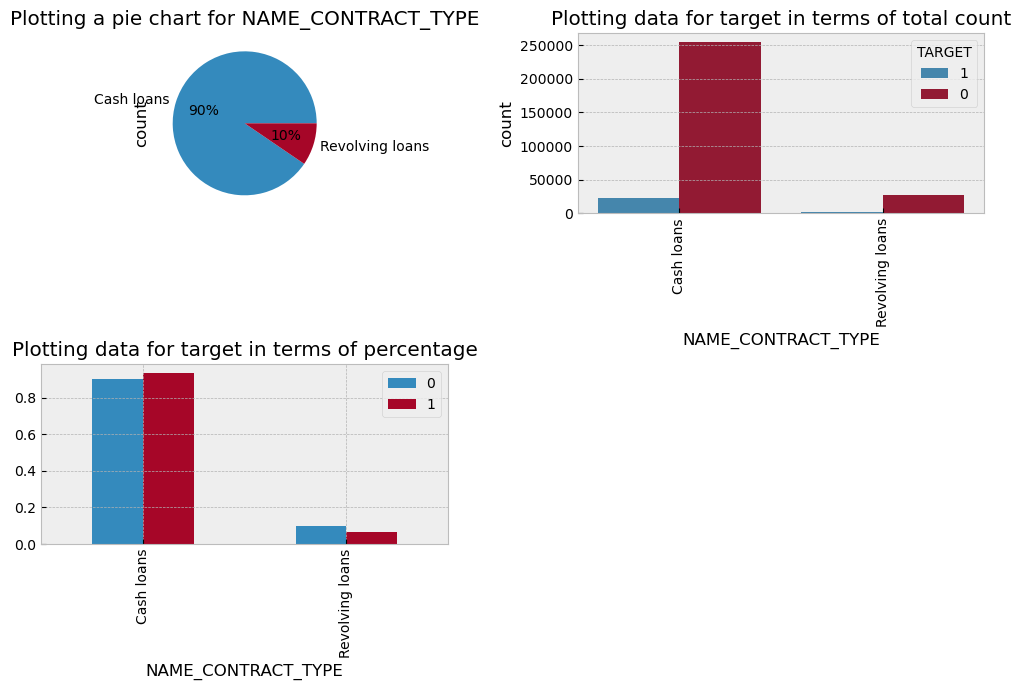

*****************************************************************************************************************
PLOTTING OF CODE_GENDER COLUMN


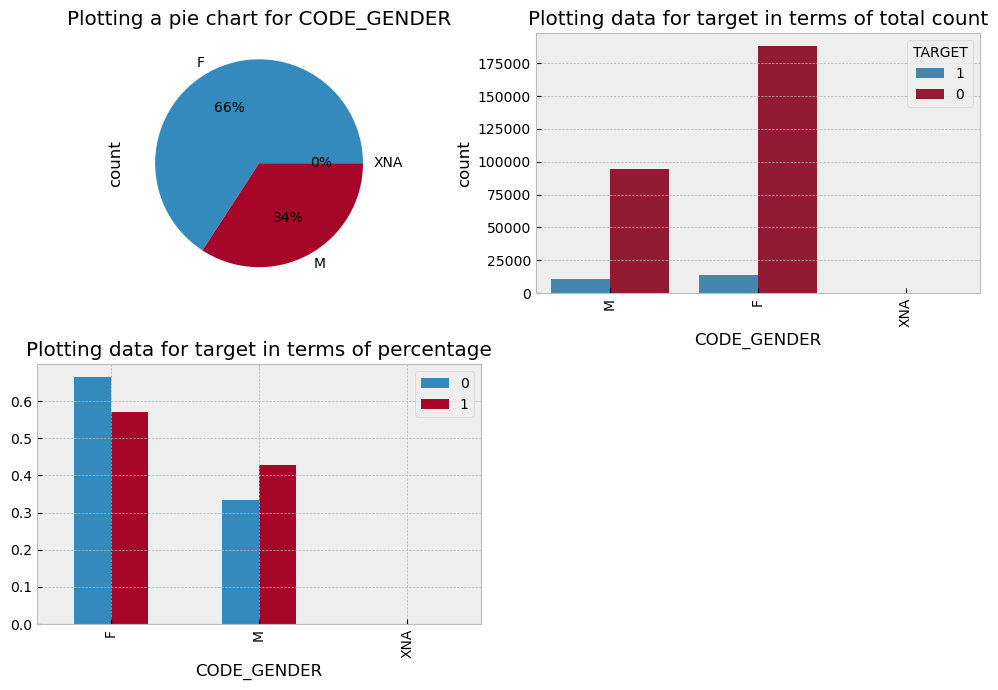

*****************************************************************************************************************
PLOTTING OF FLAG_OWN_CAR COLUMN


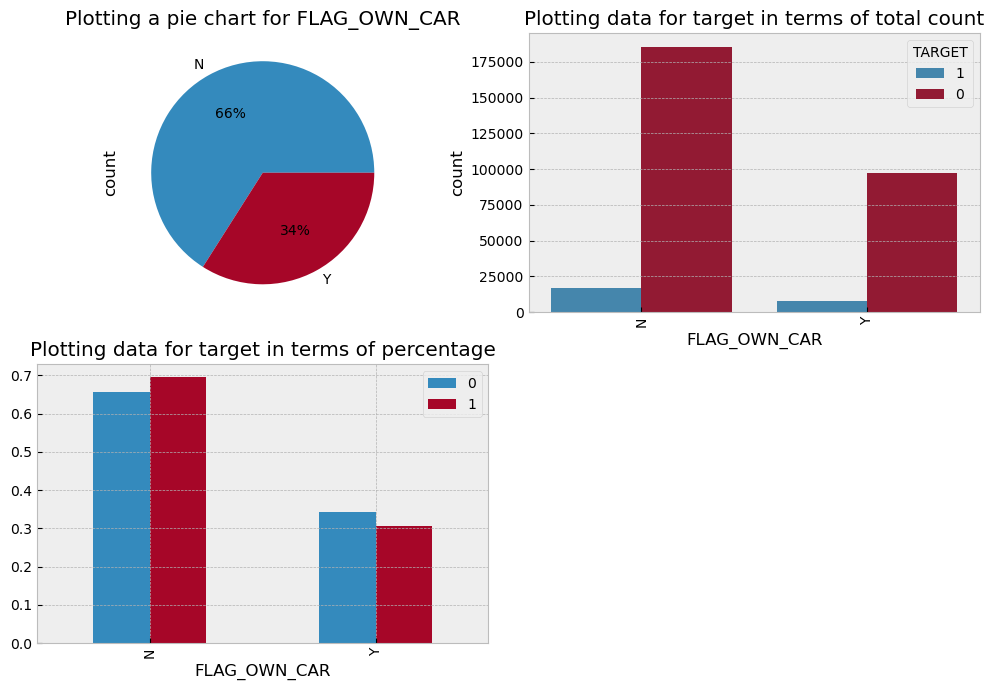

*****************************************************************************************************************
PLOTTING OF FLAG_OWN_REALTY COLUMN


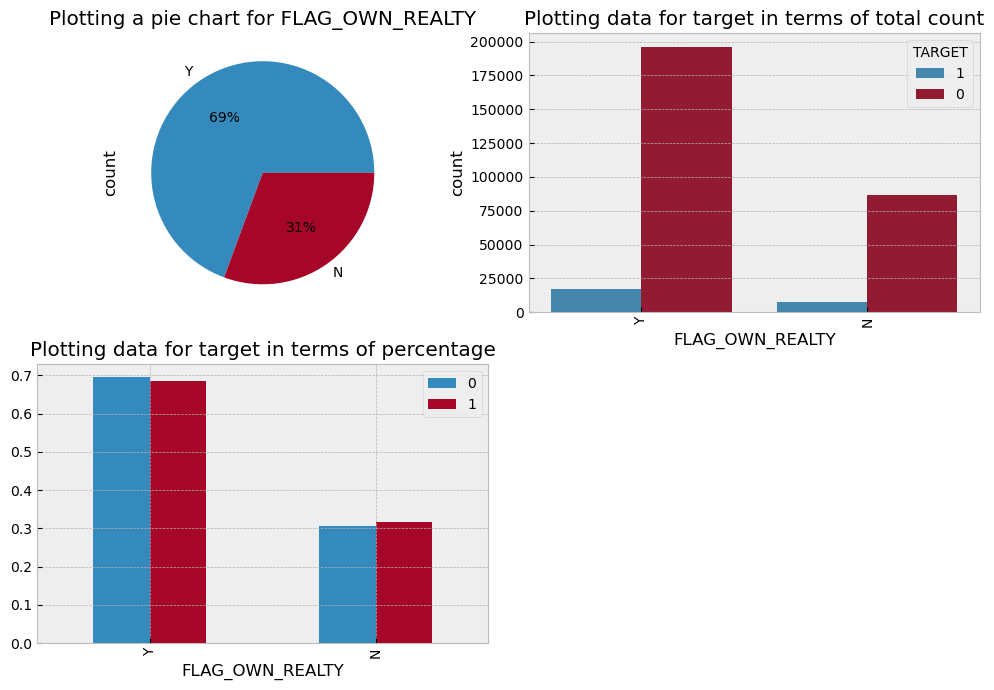

*****************************************************************************************************************
PLOTTING OF NAME_TYPE_SUITE COLUMN


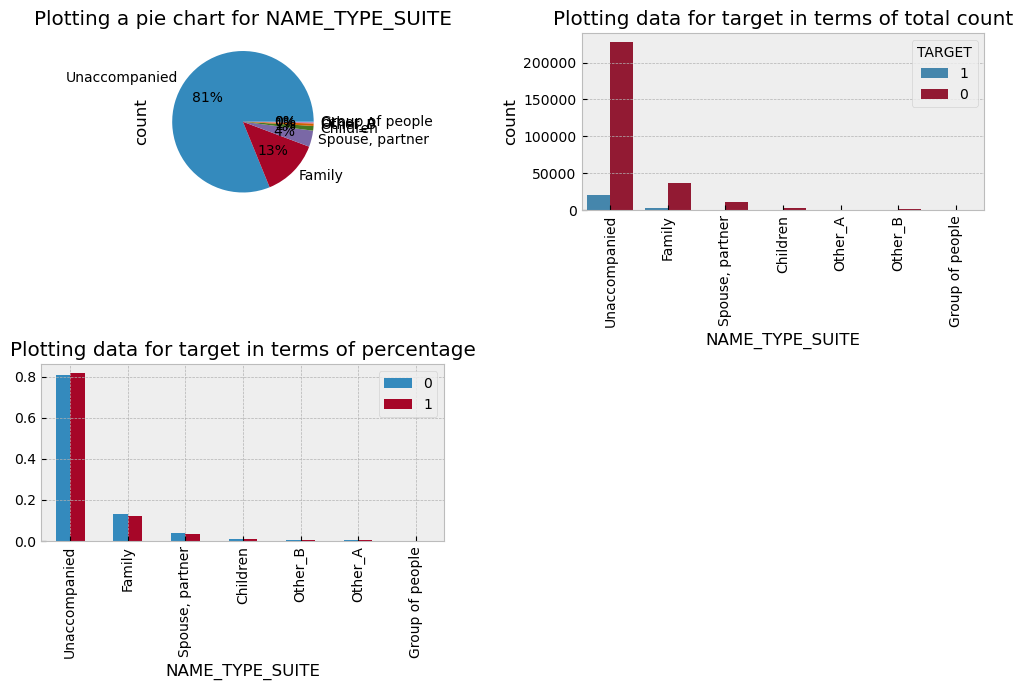

*****************************************************************************************************************
PLOTTING OF NAME_INCOME_TYPE COLUMN


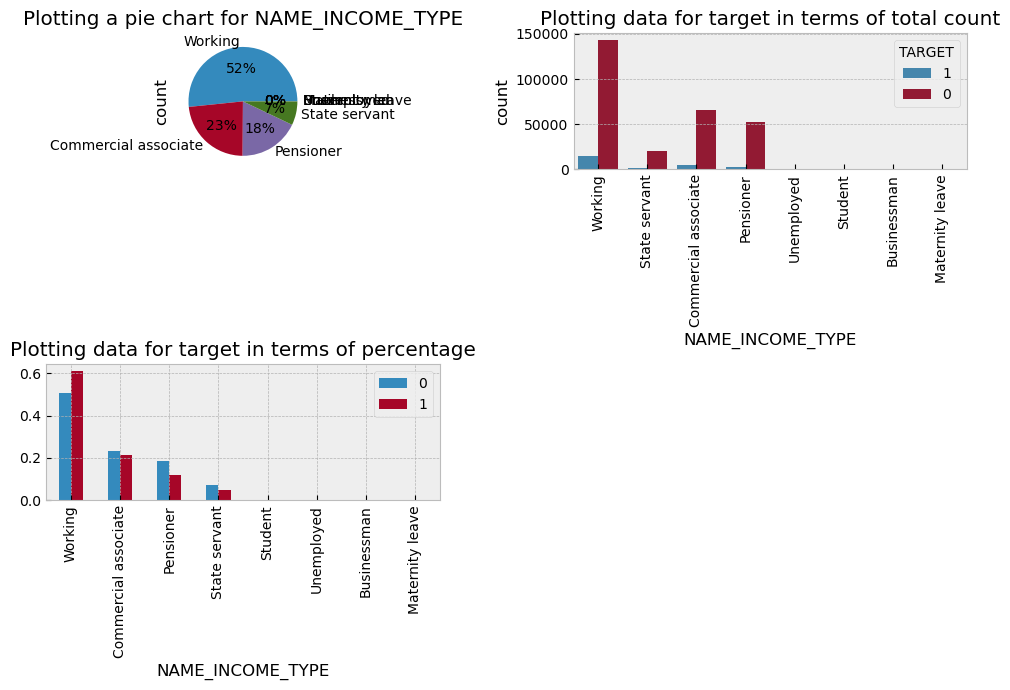

*****************************************************************************************************************
PLOTTING OF NAME_EDUCATION_TYPE COLUMN


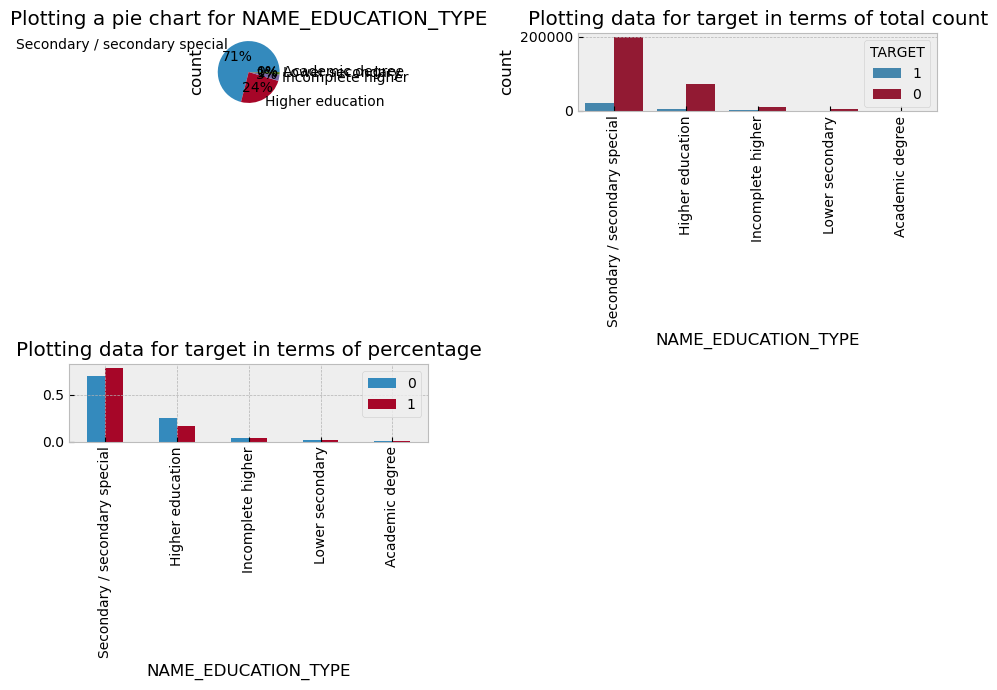

*****************************************************************************************************************
PLOTTING OF NAME_FAMILY_STATUS COLUMN


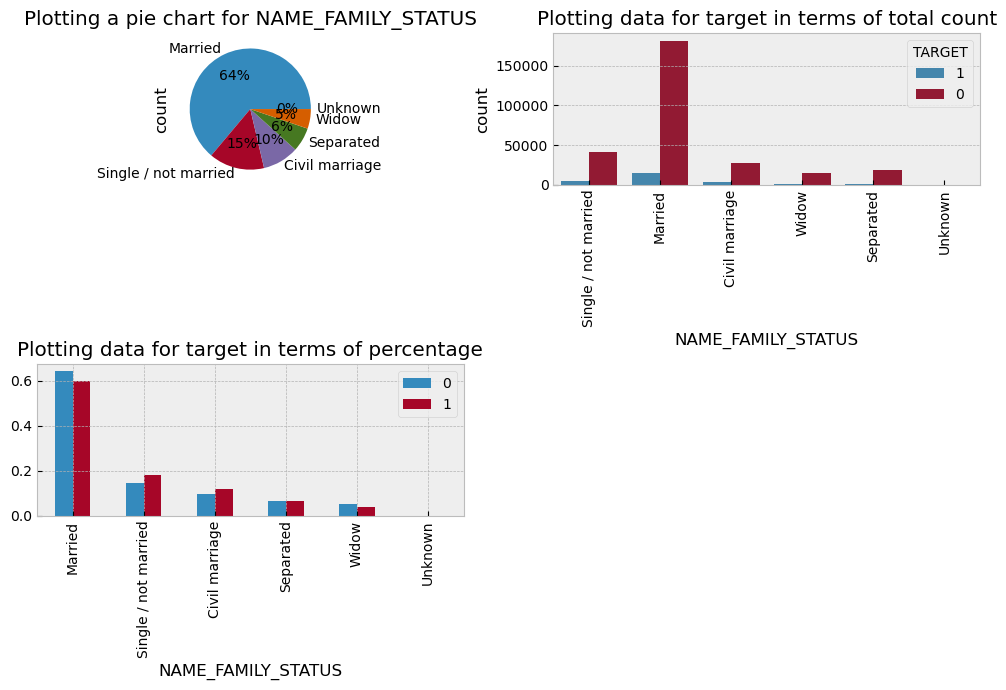

*****************************************************************************************************************
PLOTTING OF NAME_HOUSING_TYPE COLUMN


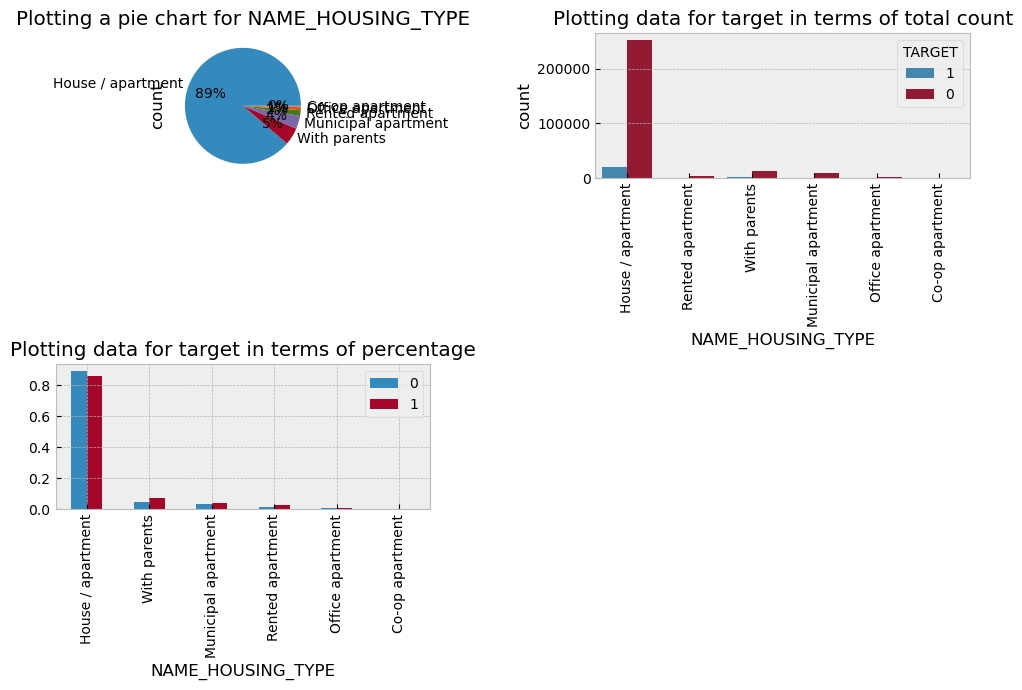

*****************************************************************************************************************
PLOTTING OF OCCUPATION_TYPE COLUMN


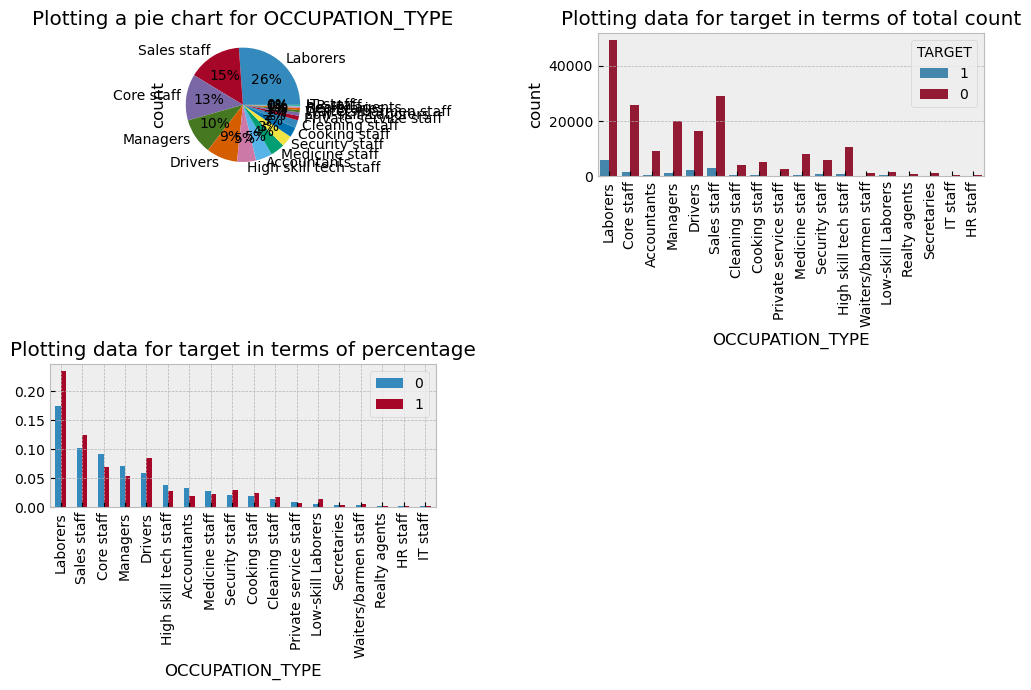

*****************************************************************************************************************
PLOTTING OF WEEKDAY_APPR_PROCESS_START COLUMN


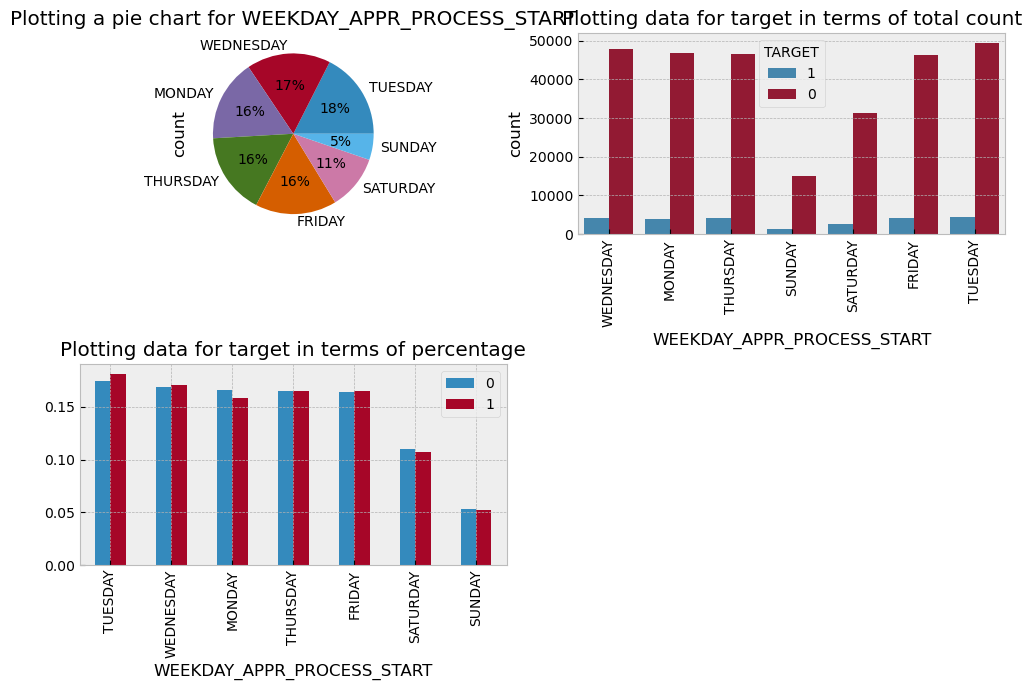

*****************************************************************************************************************
PLOTTING OF ORGANIZATION_TYPE COLUMN


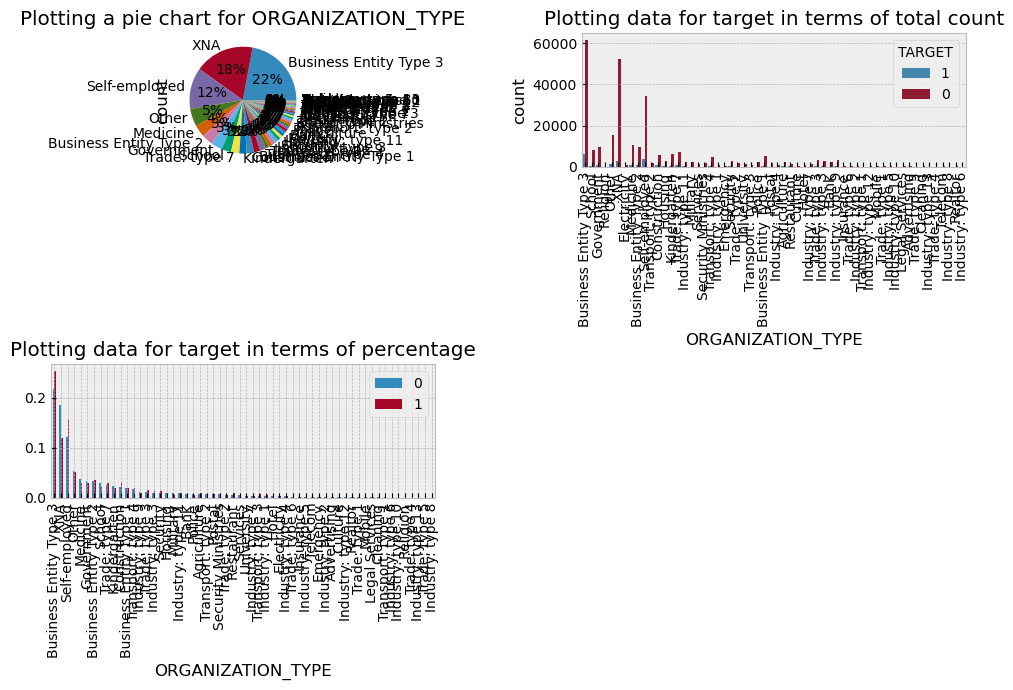

*****************************************************************************************************************
PLOTTING OF EMERGENCYSTATE_MODE COLUMN


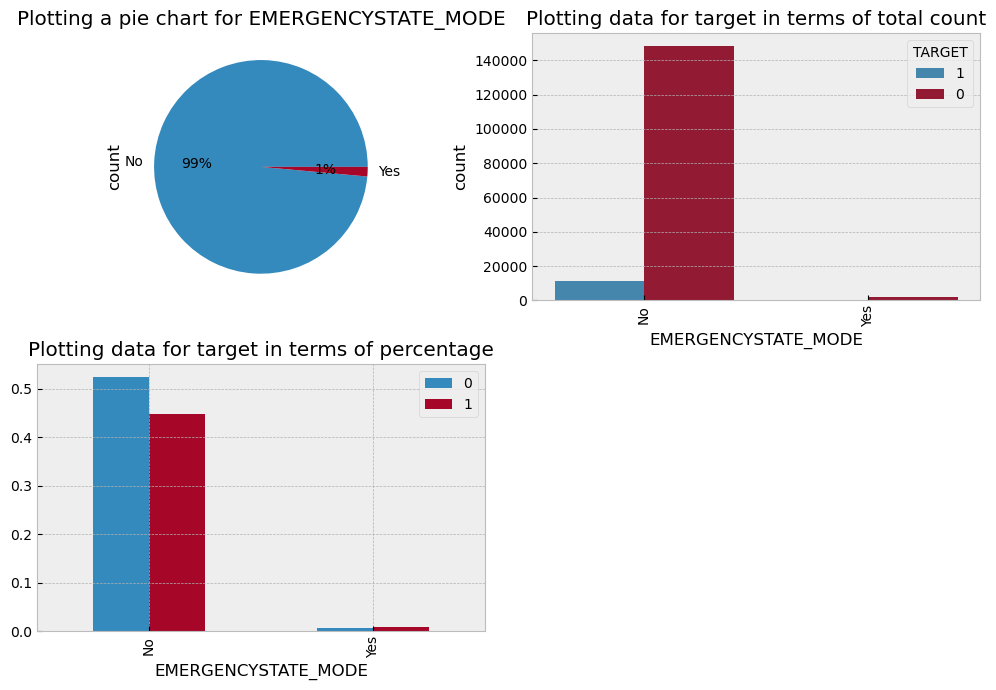

*****************************************************************************************************************


In [27]:
data['TARGET'] = data['TARGET'].astype(str)


for column in data_category:
    print("\033[1mPLOTTING OF "+column+" COLUMN\033[1m")
    
    # CALLING THE FUCNTIOM
    uni_plot(data,data_0,data_1,column)

    # PRINTING THE LINEINSTA
    print("\033[1m*****************************************************************************************************************\033[1m")

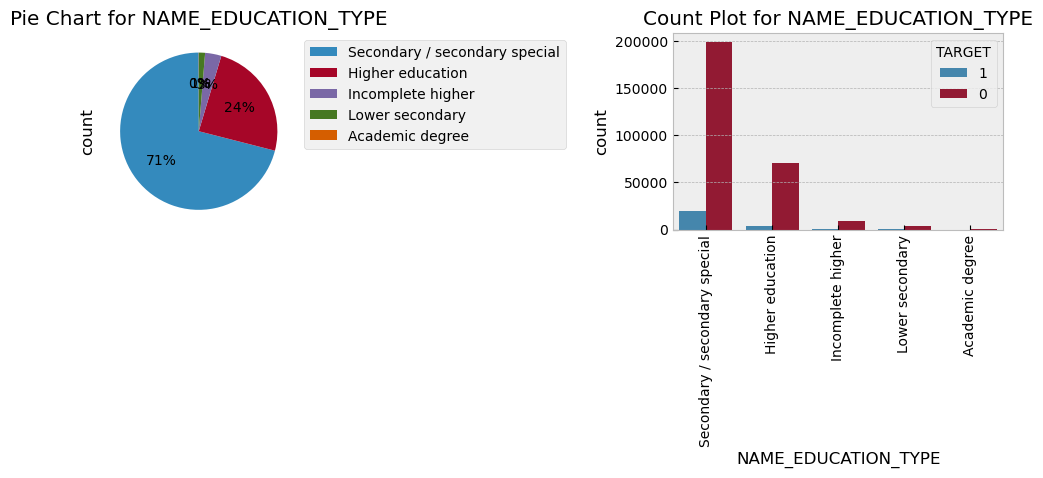

In [28]:
plt.figure(figsize=(10, 7))

# Create a pie chart for NAME_EDUCATION_TYPE without labels
ax1 = plt.subplot(221)
sizes = data["NAME_EDUCATION_TYPE"].value_counts()
sizes.plot.pie(
    autopct="%1.0f%%", ax=ax1, startangle=90, labels=None  # Set labels=None
)

# Set title for the pie chart
plt.title("Pie Chart for NAME_EDUCATION_TYPE")

# Create a custom legend using the categories
plt.legend(sizes.index, loc='upper left', bbox_to_anchor=(1, 1))

# Create a count plot for each category column
ax2 = plt.subplot(222)
sns.countplot(x=data["NAME_EDUCATION_TYPE"], hue=data["TARGET"], ax=ax2)
plt.xticks(rotation=90)
plt.title("Count Plot for NAME_EDUCATION_TYPE")

plt.tight_layout()
plt.show()

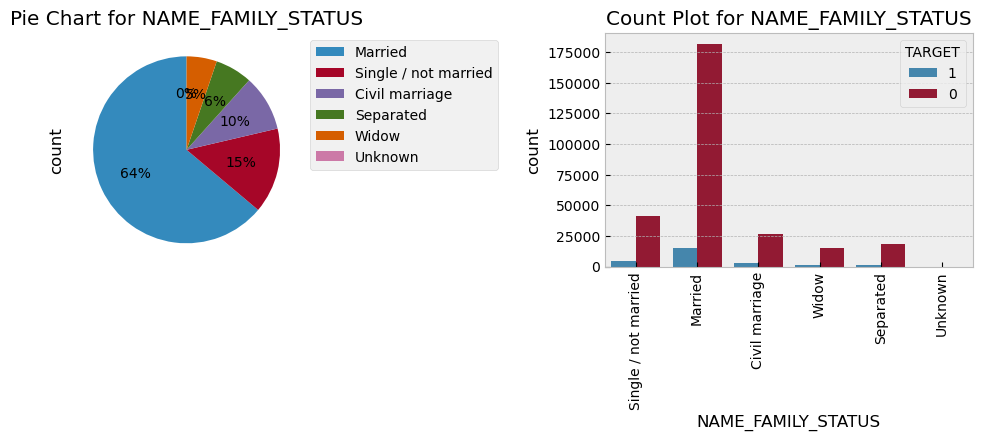

In [29]:
plt.figure(figsize=(10, 7))

# Create a pie chart for NAME_FAMILY_STATUS without labels
ax1 = plt.subplot(221)
sizes = data["NAME_FAMILY_STATUS"].value_counts()
sizes.plot.pie(
    autopct="%1.0f%%", ax=ax1, startangle=90, labels=None  # Set labels=None
)

# Set title for the pie chart
plt.title("Pie Chart for NAME_FAMILY_STATUS")

# Create a custom legend using the categories
plt.legend(sizes.index, loc='upper left', bbox_to_anchor=(1, 1))

# Create a count plot for each category column
ax2 = plt.subplot(222)
sns.countplot(x=data["NAME_FAMILY_STATUS"], hue=data["TARGET"], ax=ax2)
plt.xticks(rotation=90)
plt.title("Count Plot for NAME_FAMILY_STATUS")

plt.tight_layout()
plt.show()

### LET'S ANALYSE THE GRAPH TO LEARN THE LOAN BEHAVIOUR AND DEFAULT RATES

### **OBSERVATION-1**

**NAME_CONTRACT_TYPE**
• It reveals that 90% of the entries are 'Cash loans', while the remaining 10% are 'Revolving loans'. 

**CODE_GENDER COLUMN**
•Although loans are less frequently taken by males, the data indicates that the proportion of male defaulters is notably higher compared to females. This suggests gender as a potential factor in assessing loan risk.

**NAME_EDUCATION_TYPE**
•Most loans are taken out by individuals with secondary education, followed by those with higher education. However, the default rate is significantly higher among borrowers with only secondary education compared to those with higher education qualifications.

**NAME_FAMILY_STATUS**
•Married individuals are the most common applicants for loans and tend to have lower default rates. In contrast, singles and those in civil marriages exhibit higher default rates, highlighting the influence of marital status on loan repayment behavior.

**OCCUPATION_TYPE COLUMN**
•Laborers and various staff categories are the most frequent loan applicants, yet managers and high-skilled tech staff prove to be the most reliable in terms of repayment. This underscores the role of occupation type in predicting loan default risk.




## TASK 4.2  Univariate Analysis for numerical columns

In [30]:
plt.style.use('default')

PLOTTING OF SK_ID_CURR COLUMN


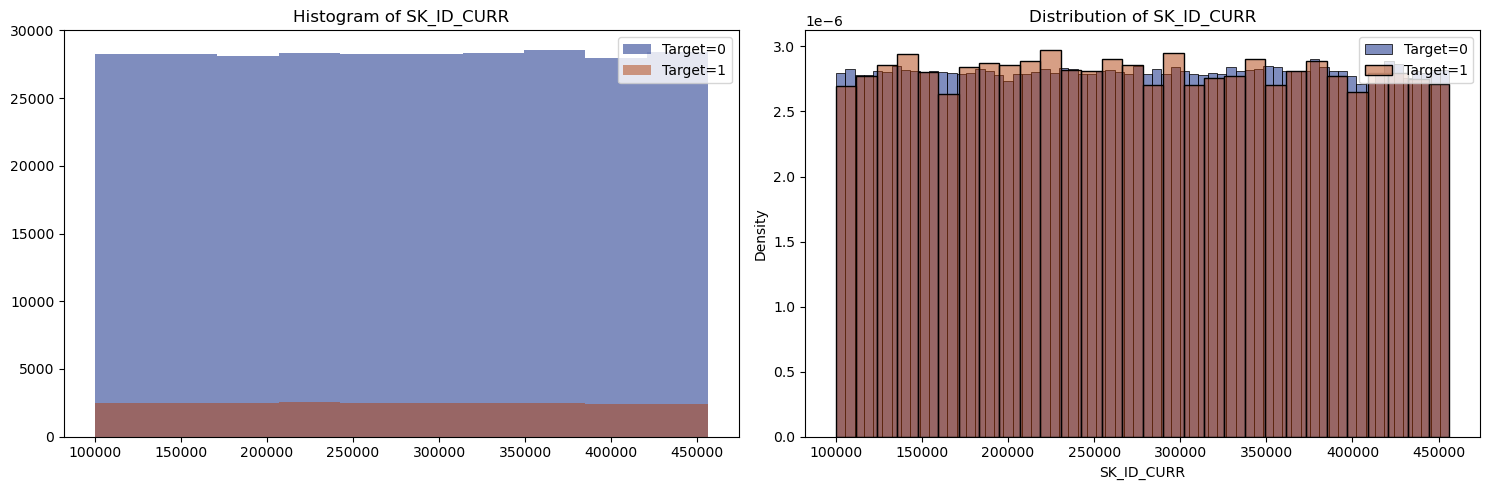

PLOTTING OF TARGET COLUMN


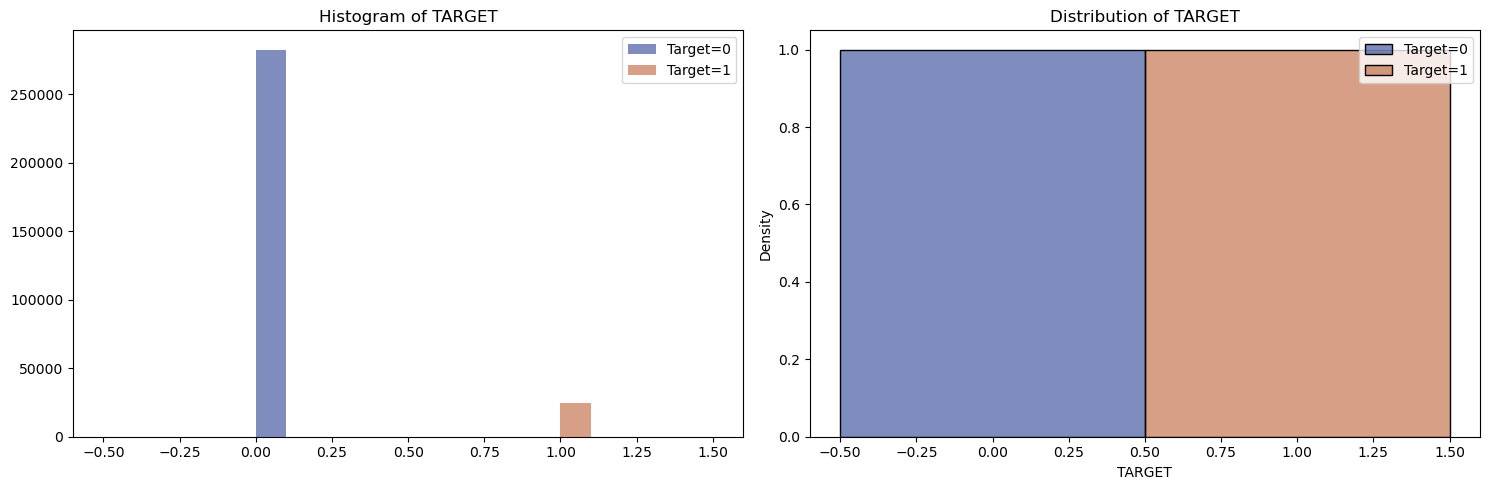

PLOTTING OF CNT_CHILDREN COLUMN


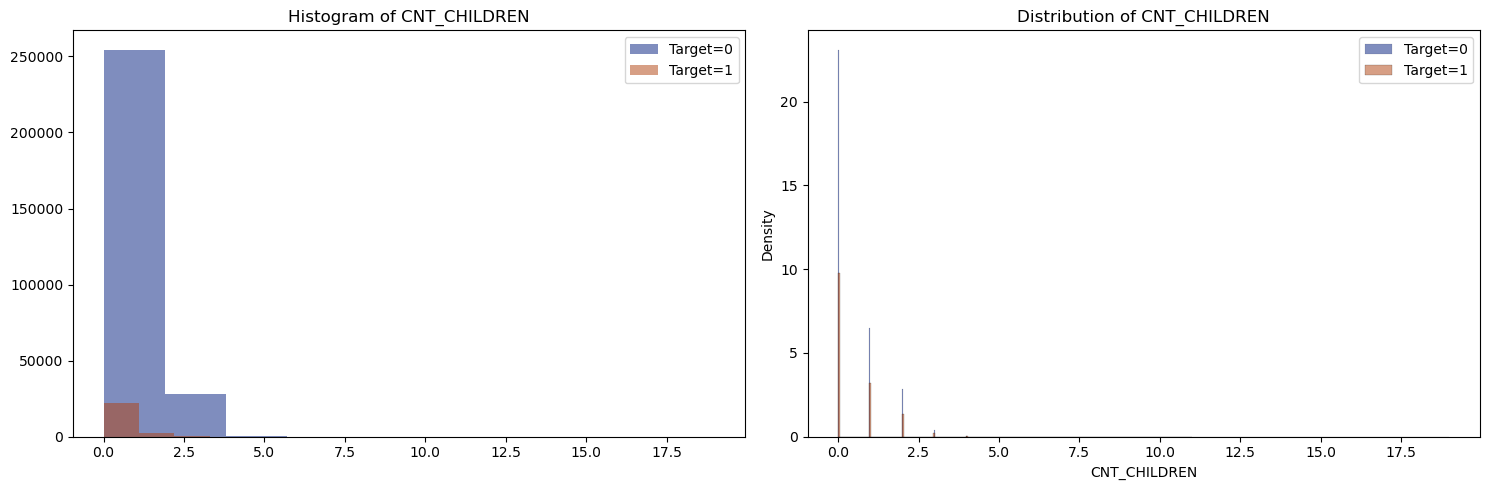

PLOTTING OF AMT_INCOME_TOTAL COLUMN


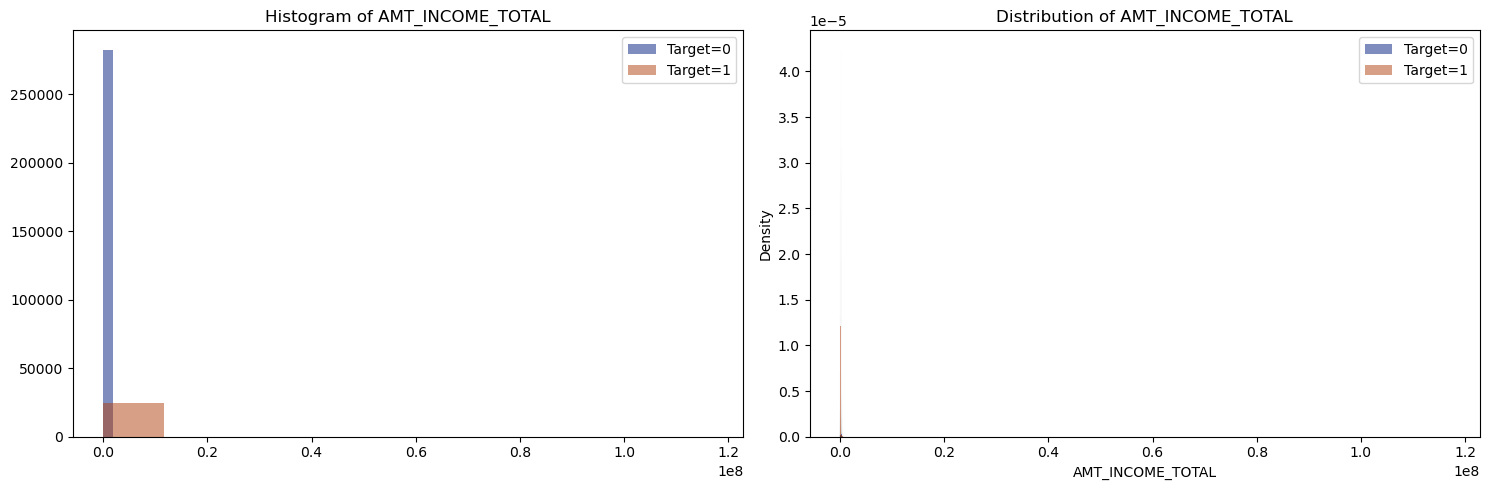

PLOTTING OF AMT_CREDIT COLUMN


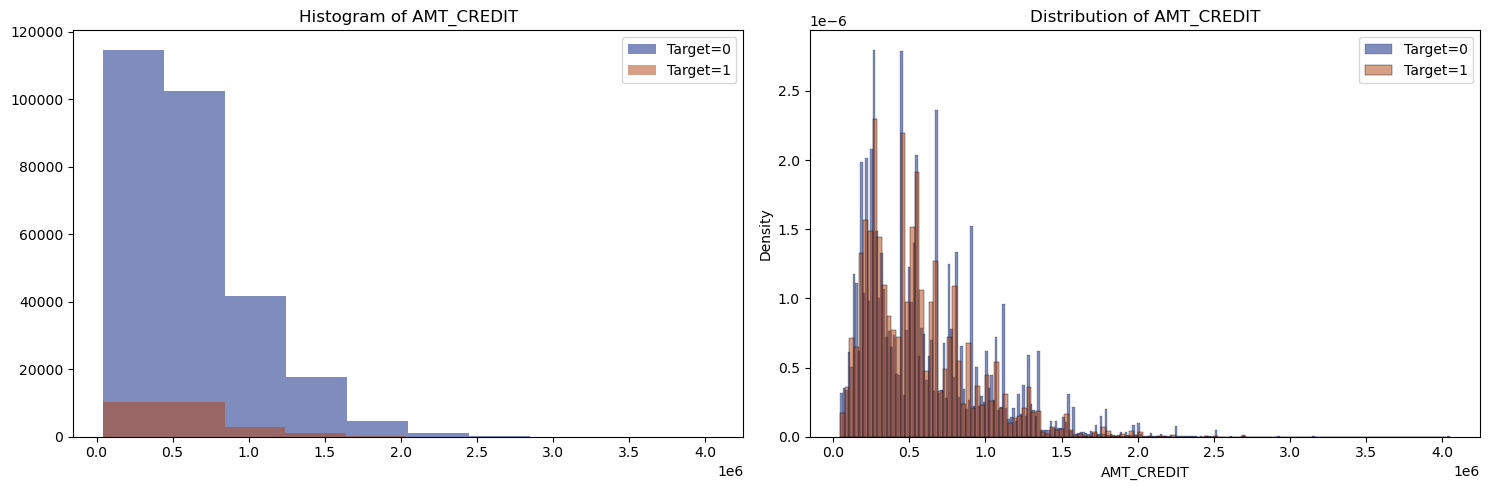

PLOTTING OF AMT_ANNUITY COLUMN


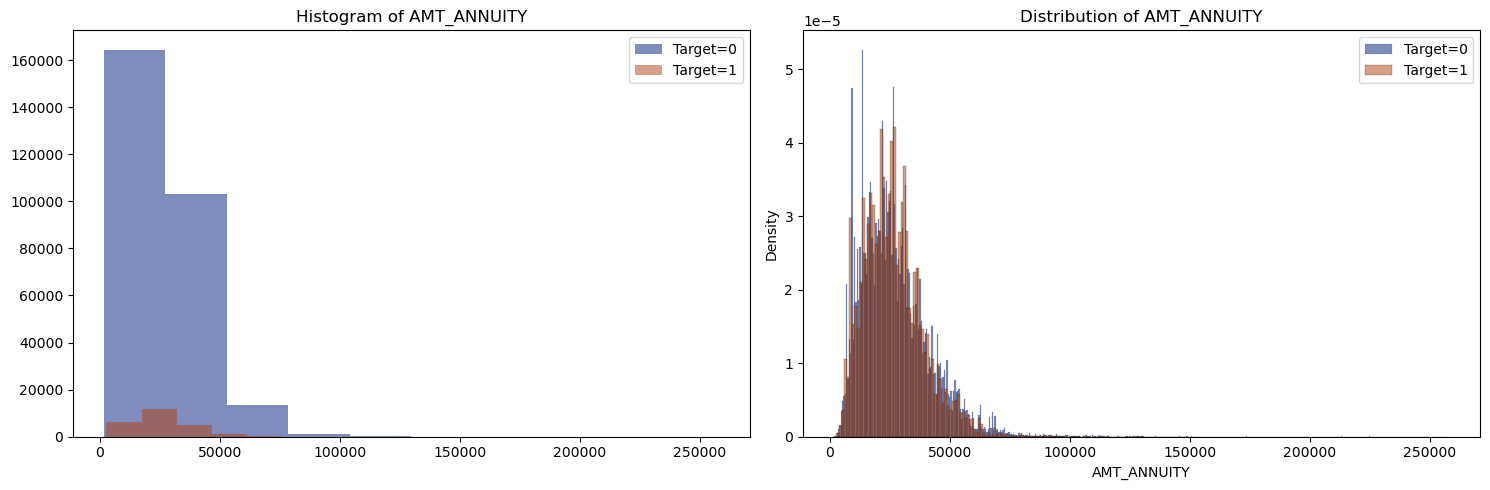

PLOTTING OF AMT_GOODS_PRICE COLUMN


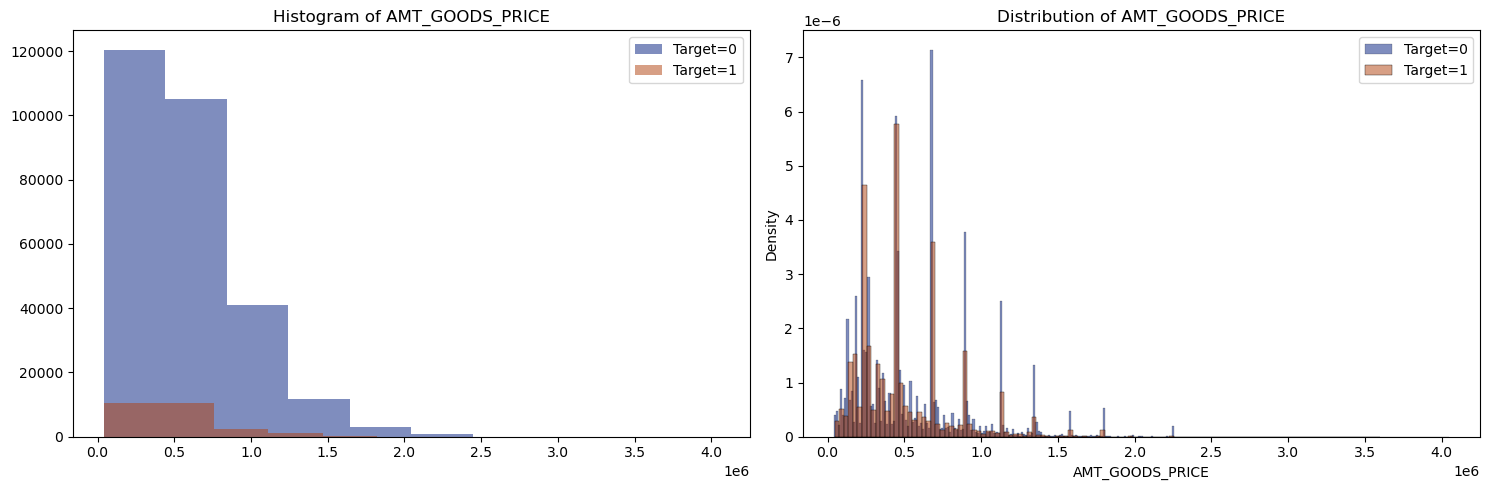

PLOTTING OF REGION_POPULATION_RELATIVE COLUMN


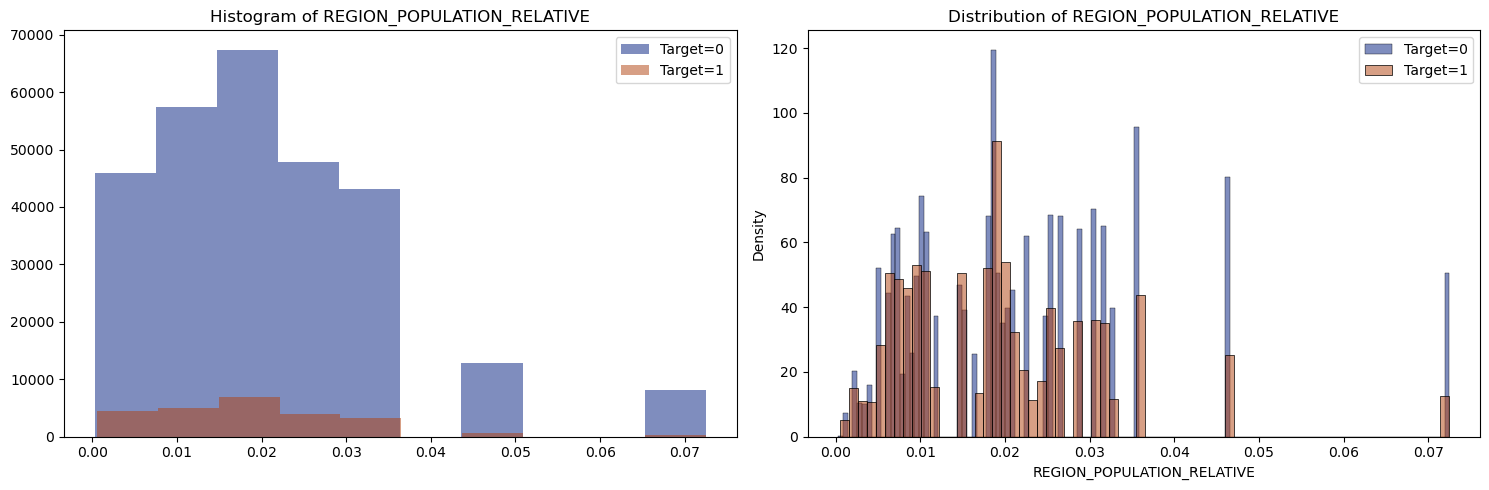

PLOTTING OF DAYS_BIRTH COLUMN


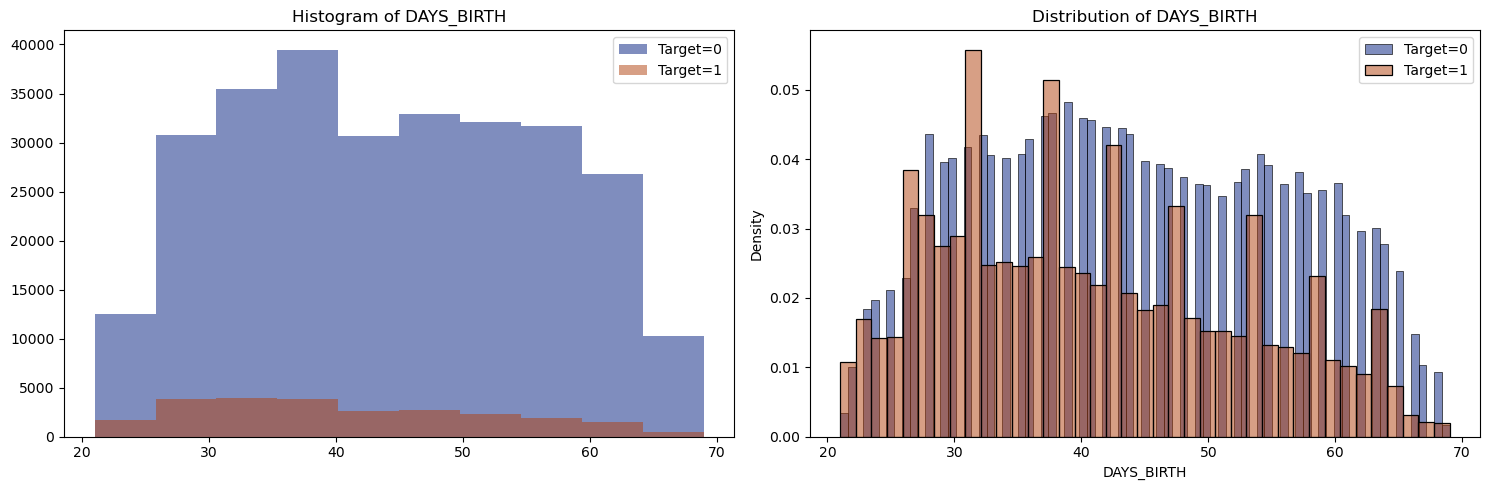

PLOTTING OF DAYS_EMPLOYED COLUMN


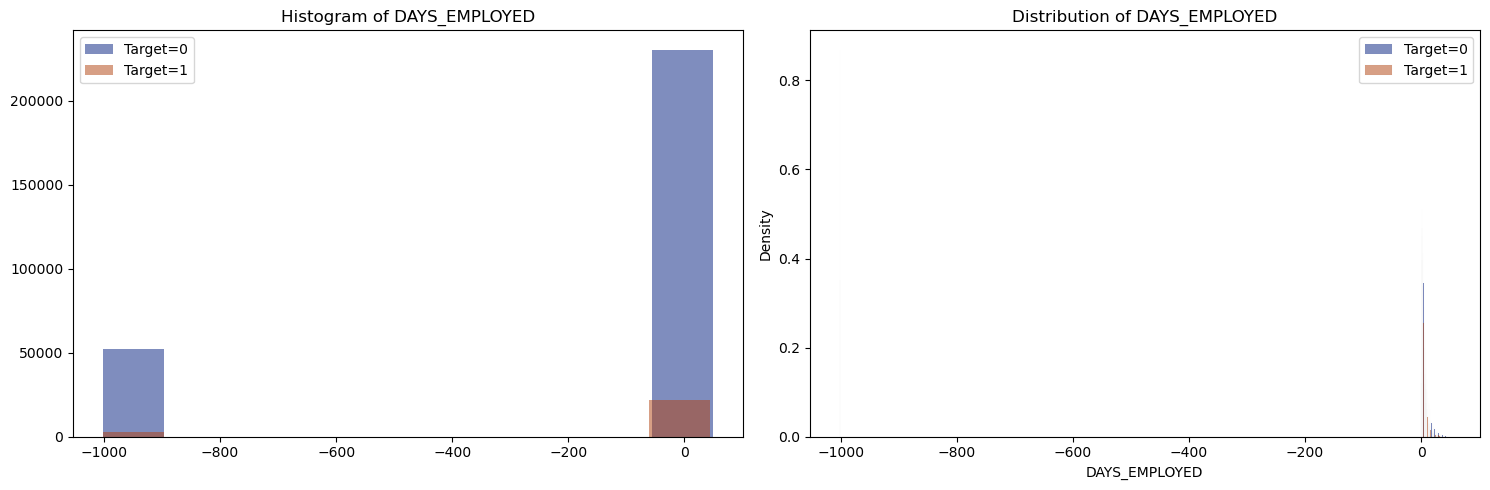

PLOTTING OF DAYS_REGISTRATION COLUMN


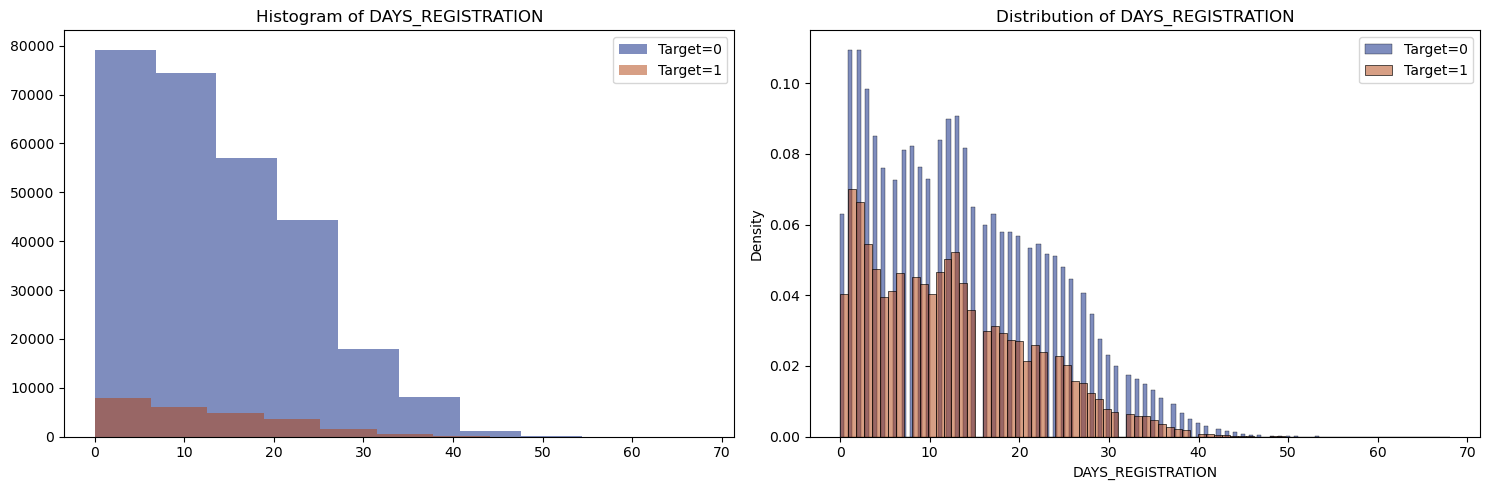

PLOTTING OF DAYS_ID_PUBLISH COLUMN


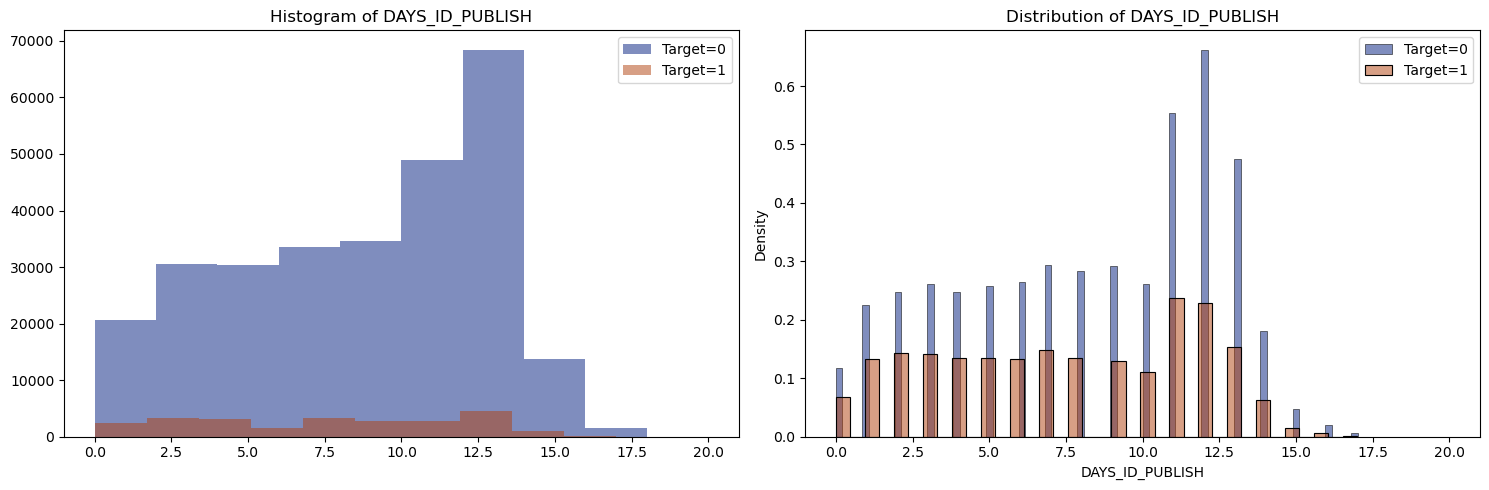

PLOTTING OF FLAG_MOBIL COLUMN


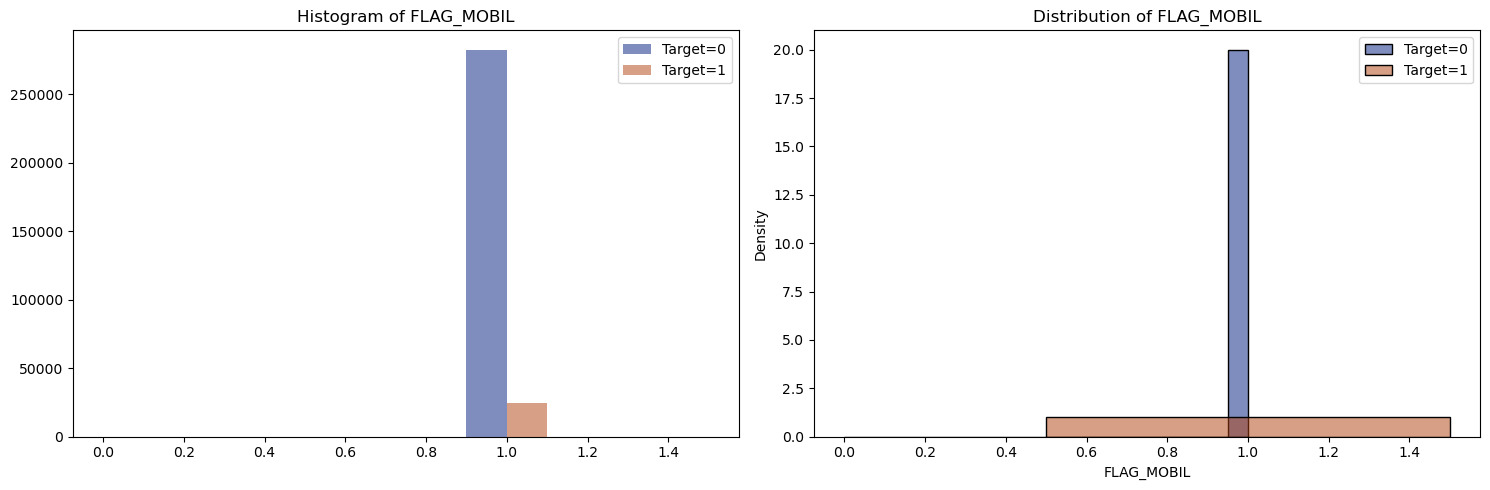

PLOTTING OF FLAG_EMP_PHONE COLUMN


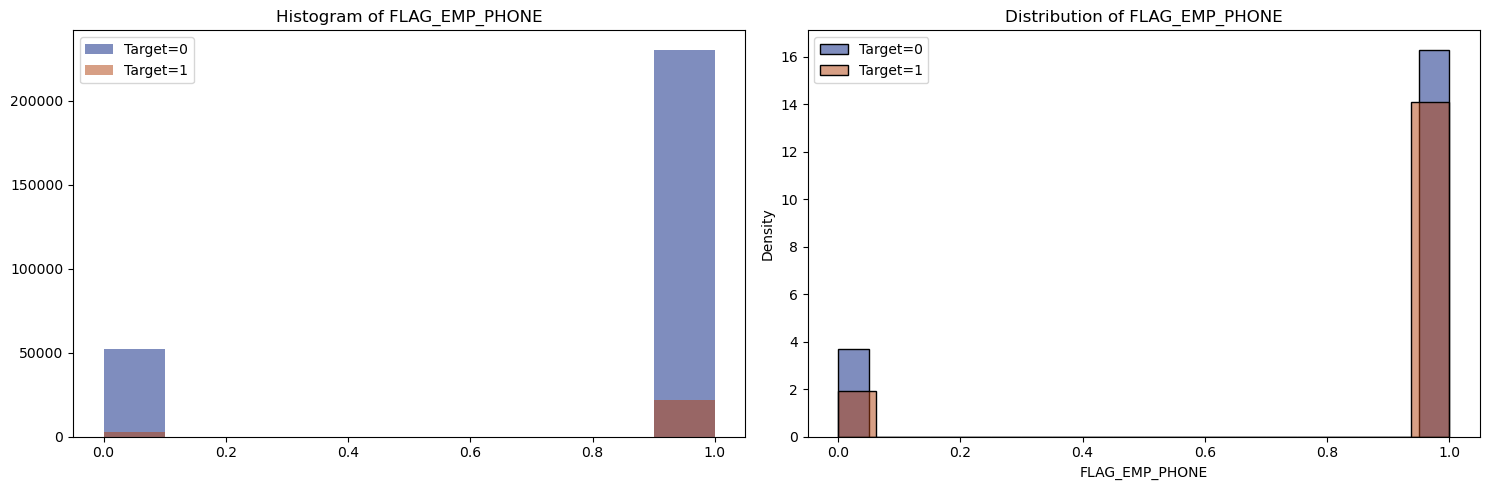

PLOTTING OF FLAG_WORK_PHONE COLUMN


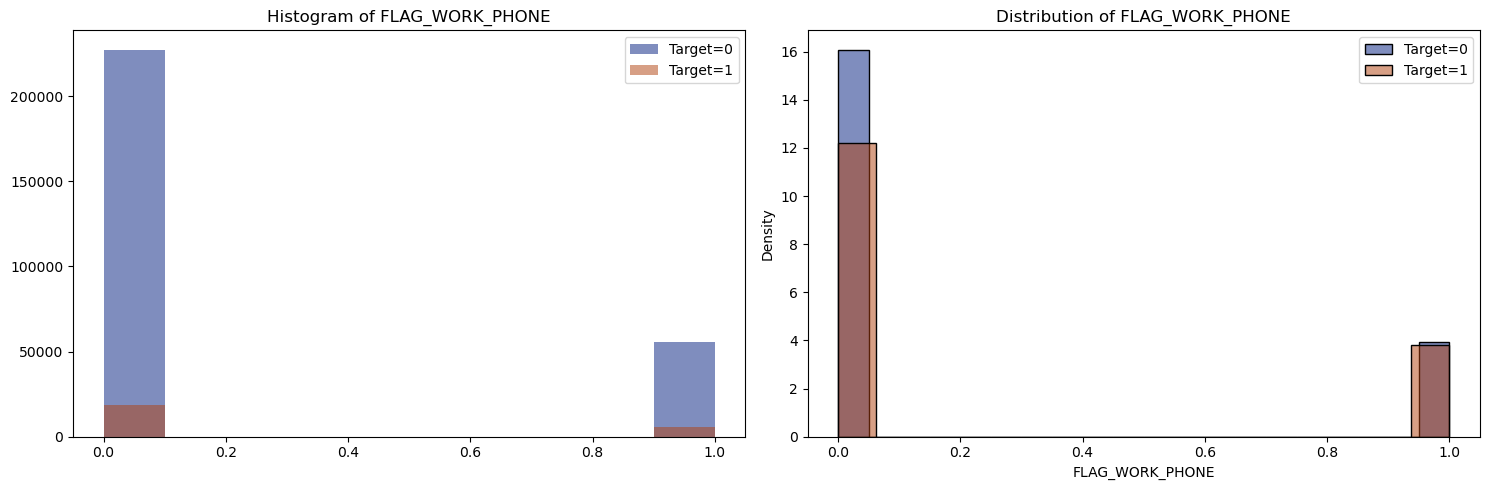

PLOTTING OF FLAG_CONT_MOBILE COLUMN


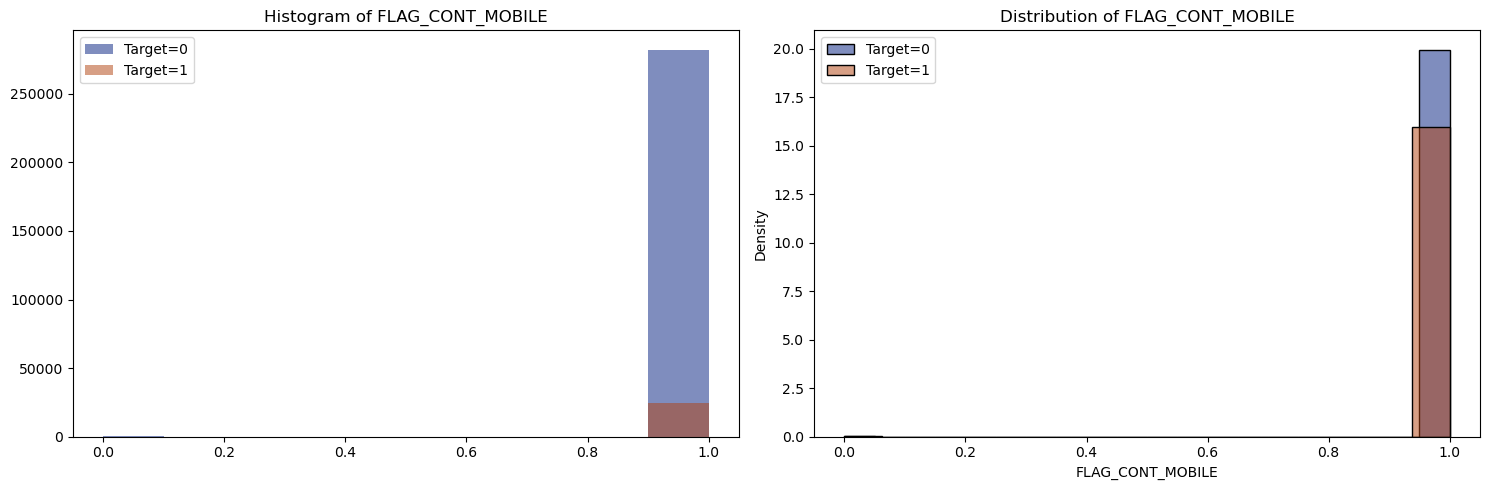

PLOTTING OF FLAG_PHONE COLUMN


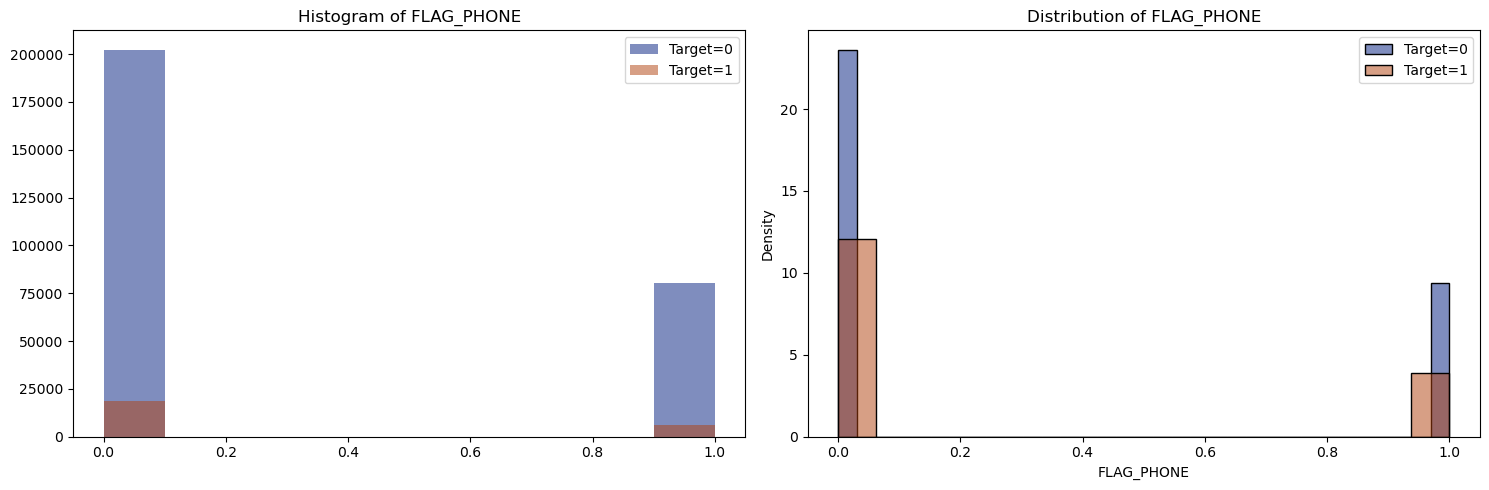

PLOTTING OF FLAG_EMAIL COLUMN


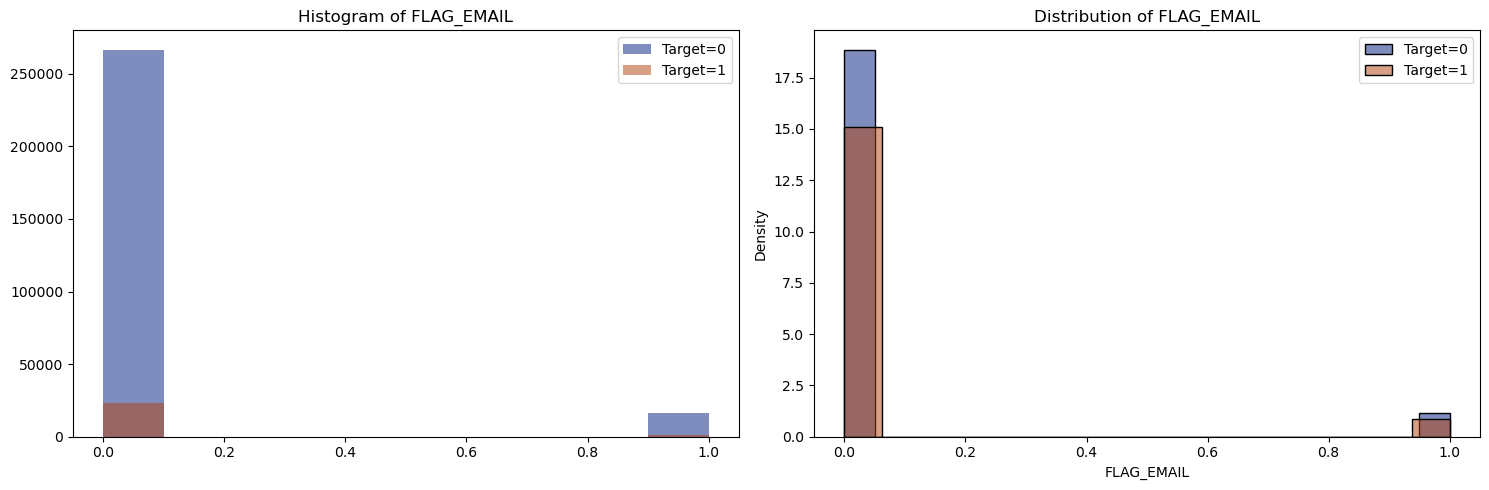

PLOTTING OF CNT_FAM_MEMBERS COLUMN


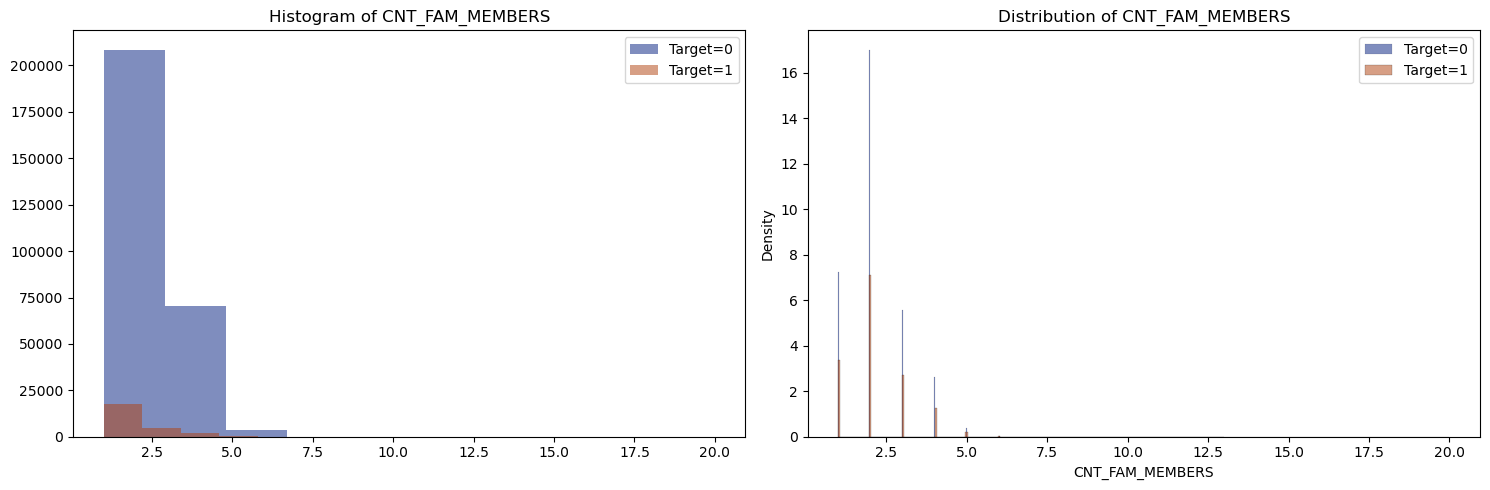

PLOTTING OF REGION_RATING_CLIENT COLUMN


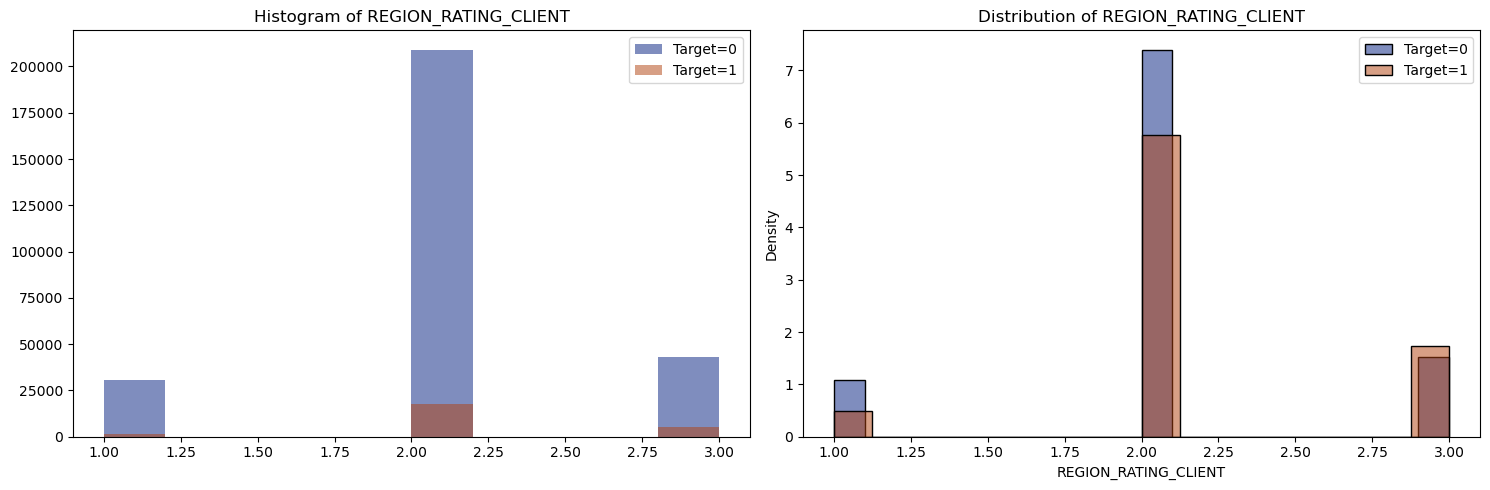

PLOTTING OF REGION_RATING_CLIENT_W_CITY COLUMN


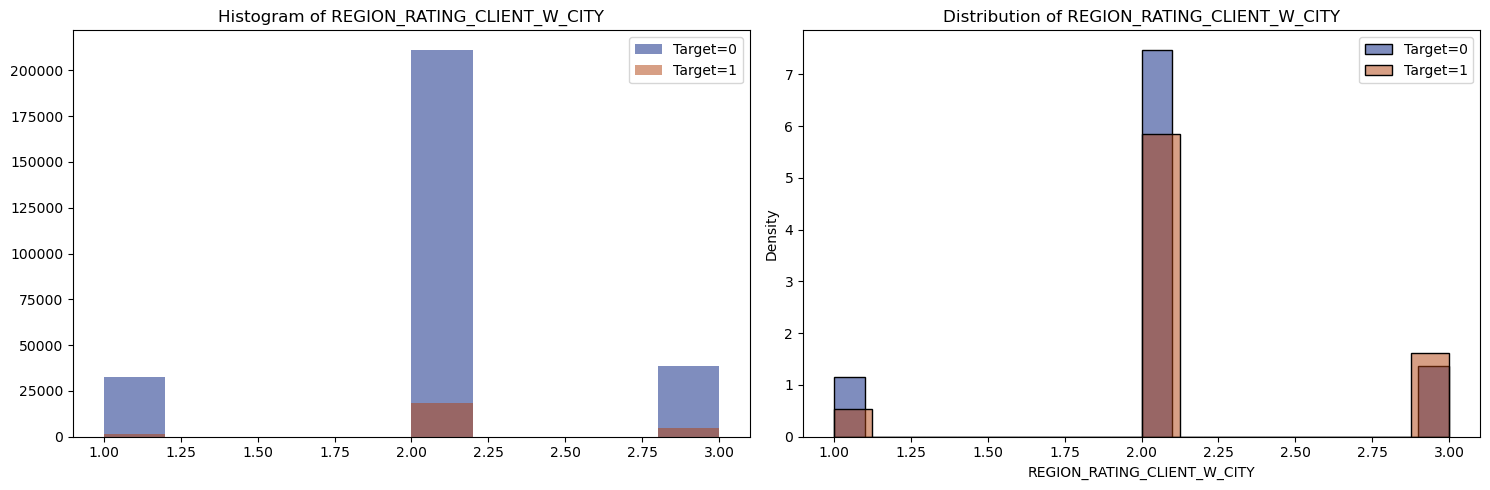

PLOTTING OF HOUR_APPR_PROCESS_START COLUMN


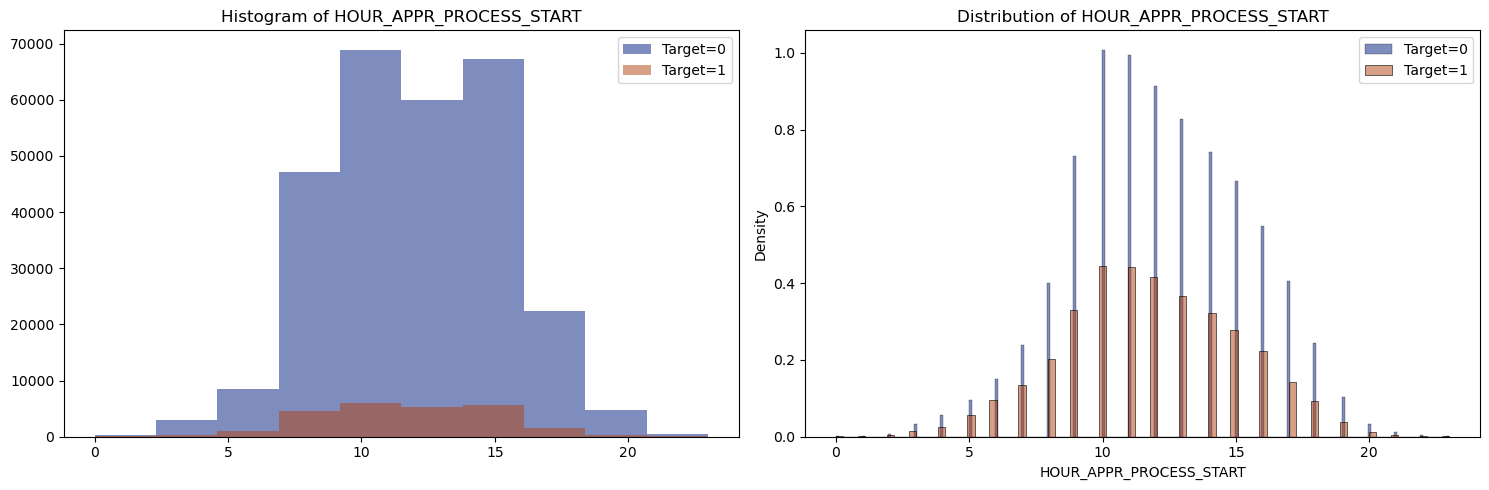

PLOTTING OF REG_REGION_NOT_LIVE_REGION COLUMN


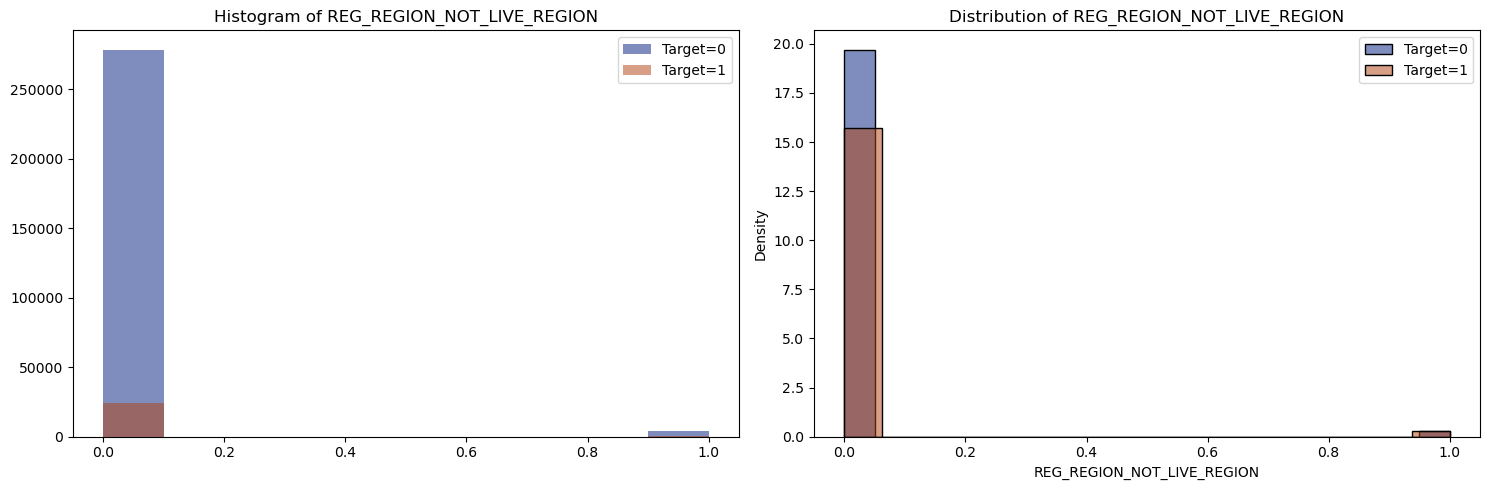

PLOTTING OF REG_REGION_NOT_WORK_REGION COLUMN


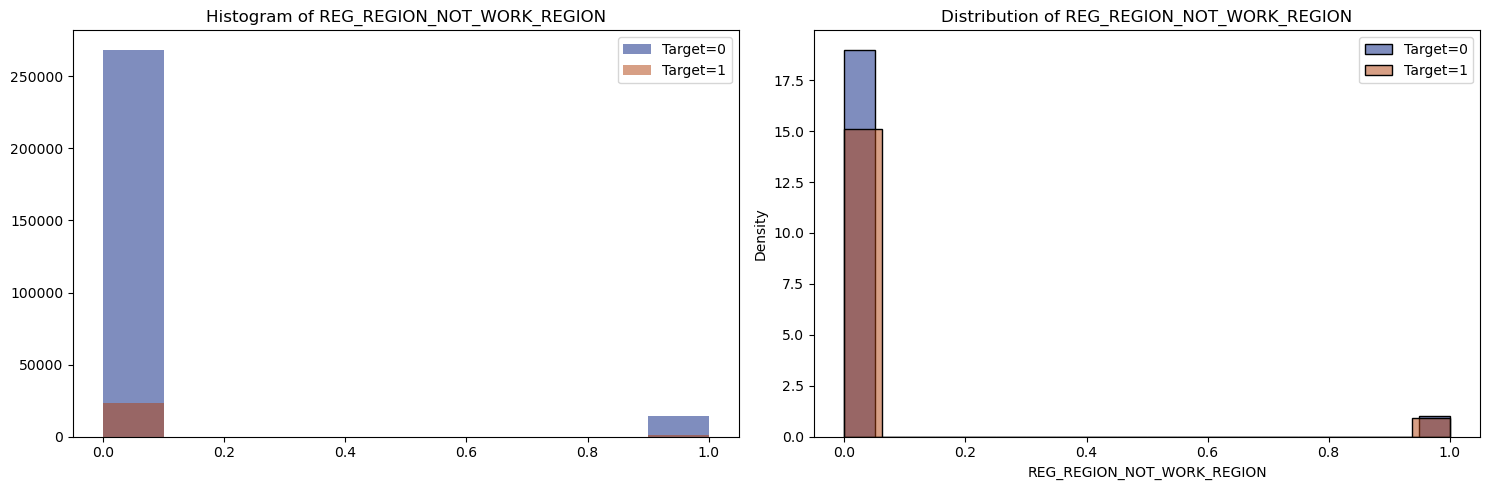

PLOTTING OF LIVE_REGION_NOT_WORK_REGION COLUMN


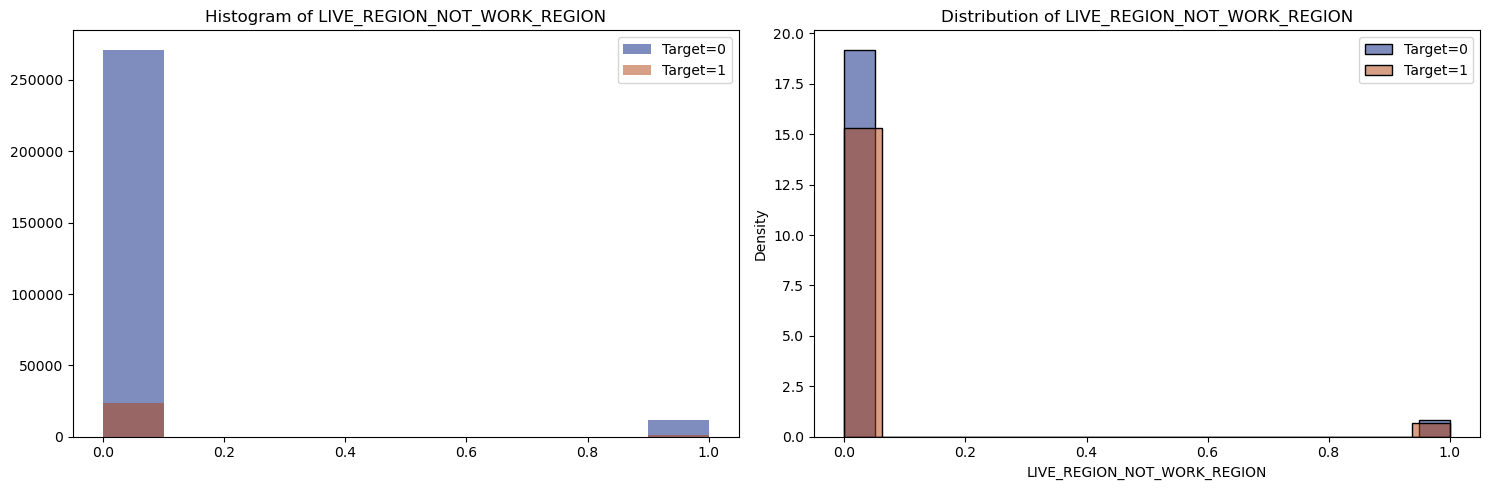

PLOTTING OF REG_CITY_NOT_LIVE_CITY COLUMN


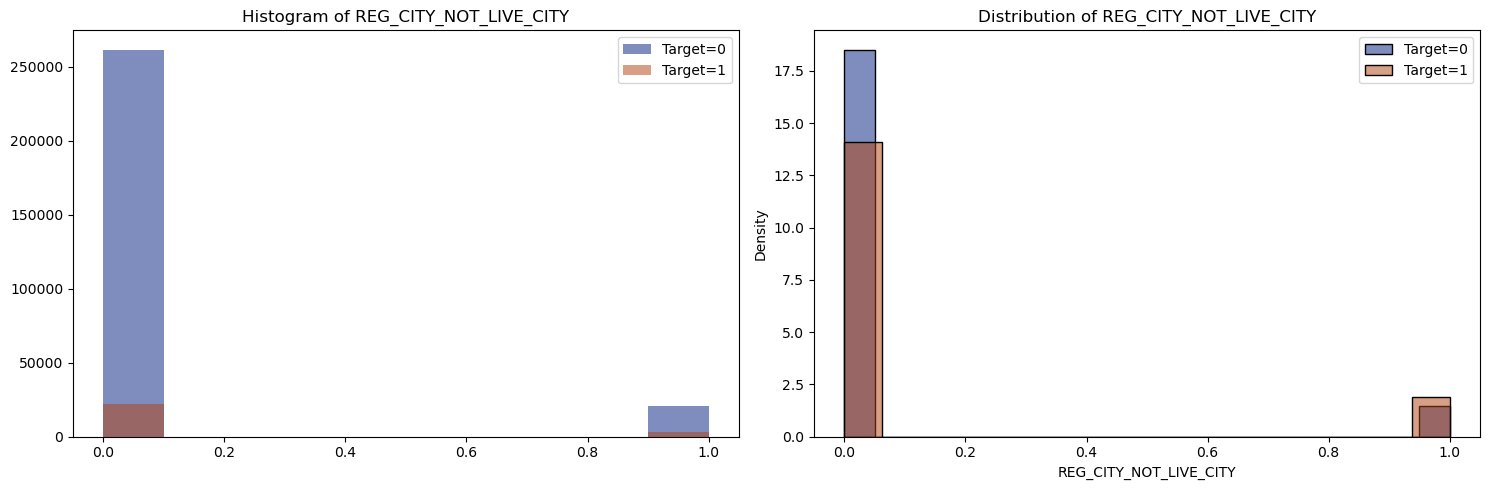

PLOTTING OF REG_CITY_NOT_WORK_CITY COLUMN


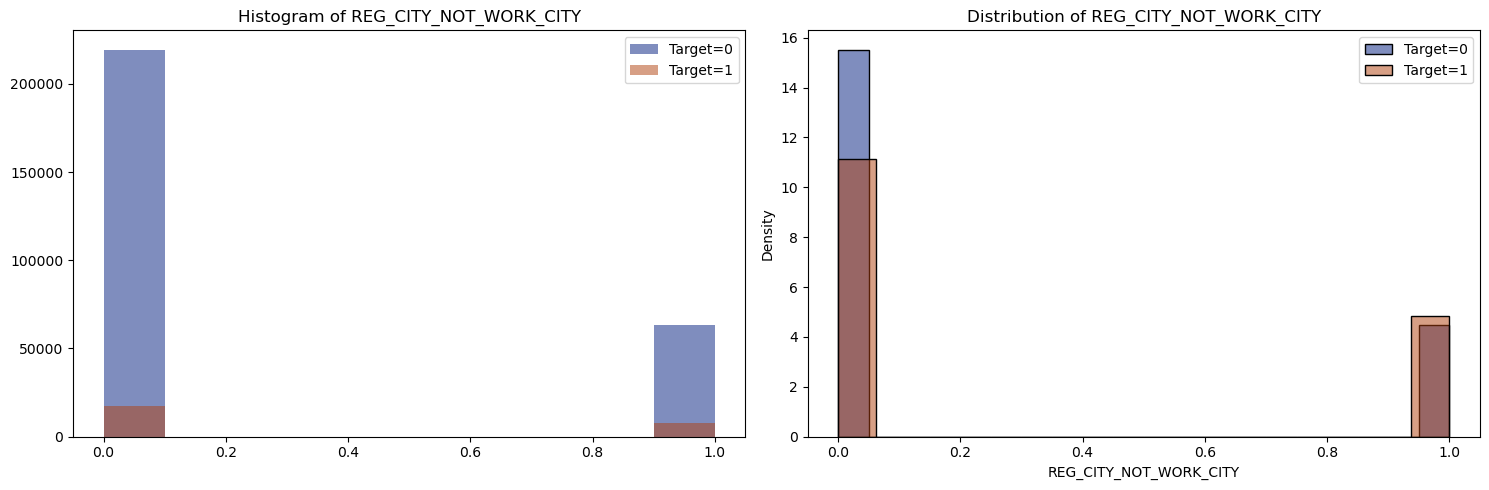

PLOTTING OF LIVE_CITY_NOT_WORK_CITY COLUMN


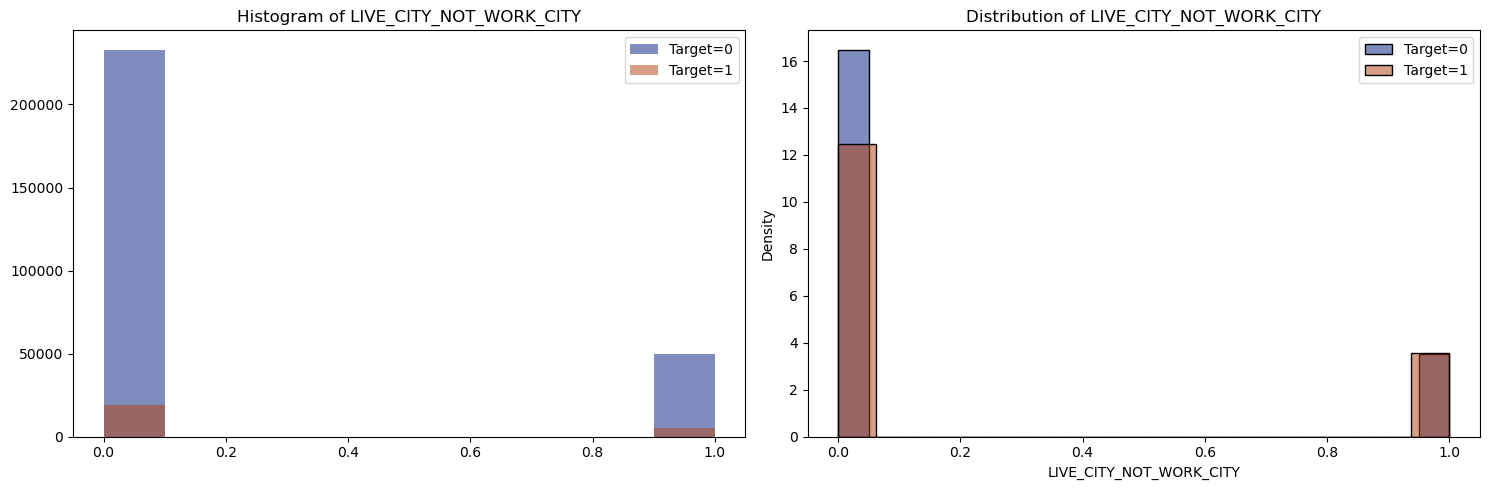

PLOTTING OF EXT_SOURCE_2 COLUMN


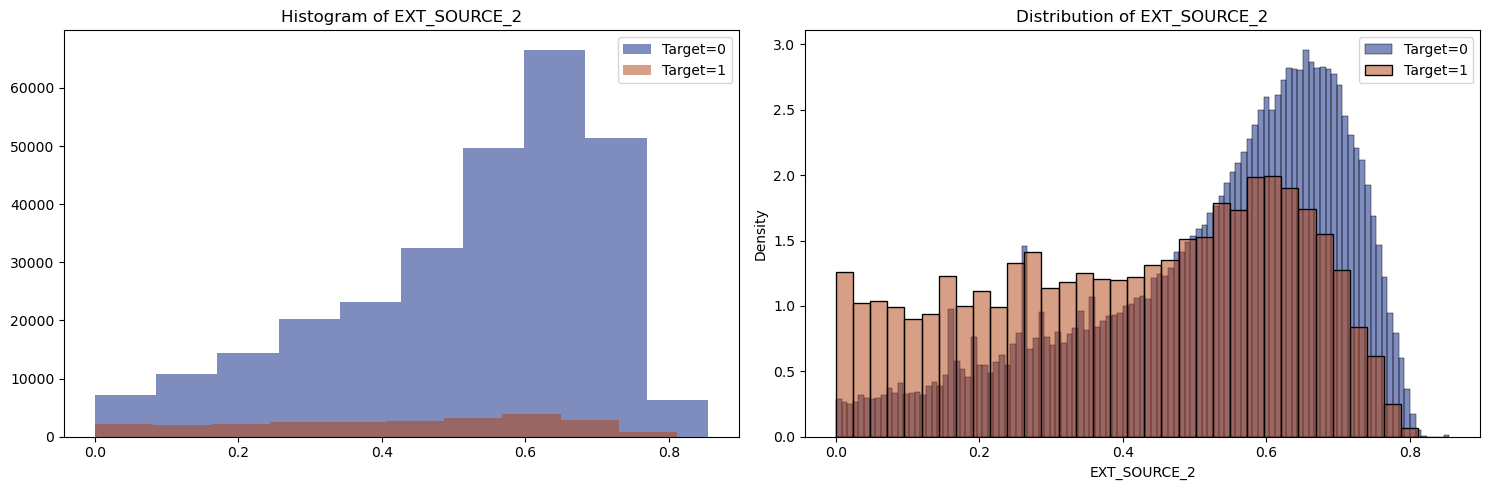

PLOTTING OF EXT_SOURCE_3 COLUMN


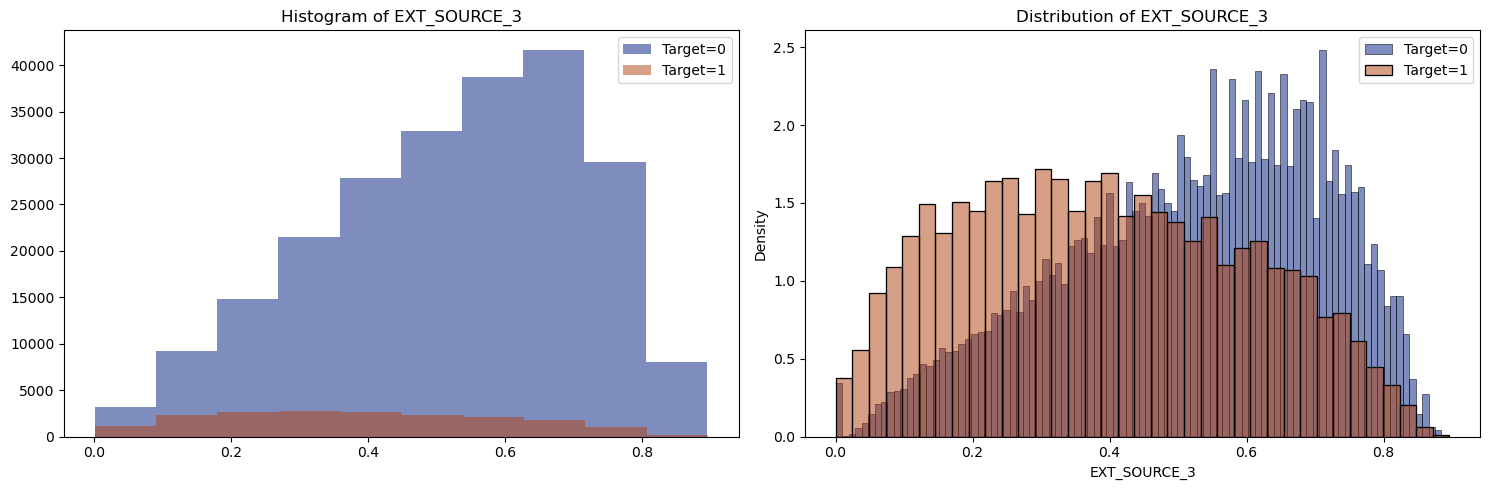

PLOTTING OF YEARS_BEGINEXPLUATATION_AVG COLUMN


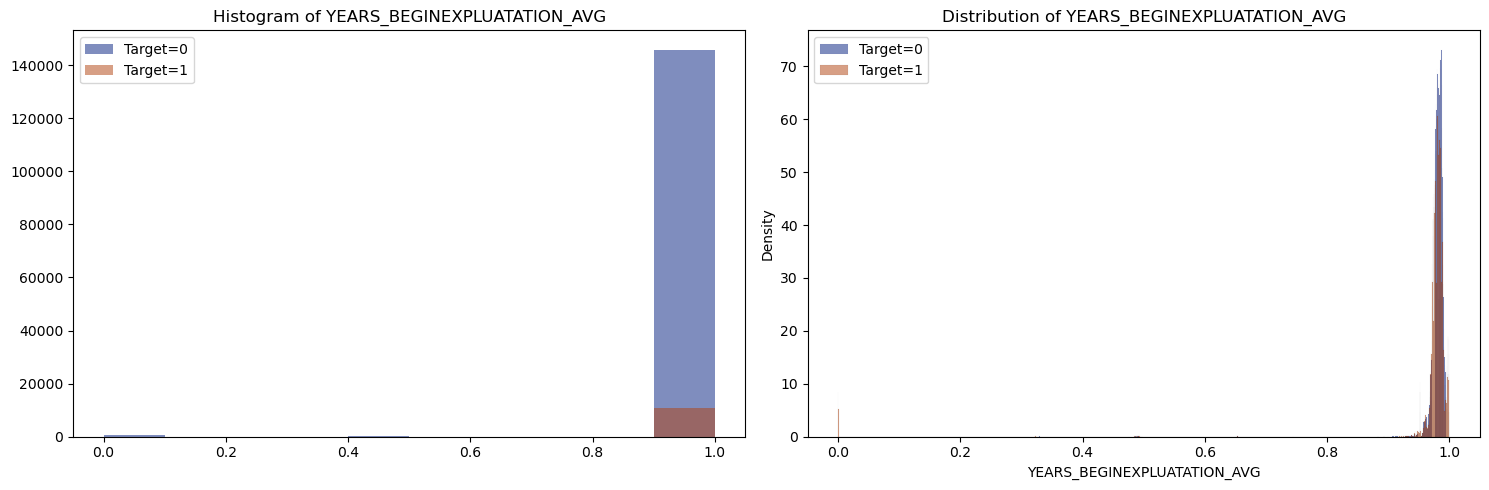

PLOTTING OF FLOORSMAX_AVG COLUMN


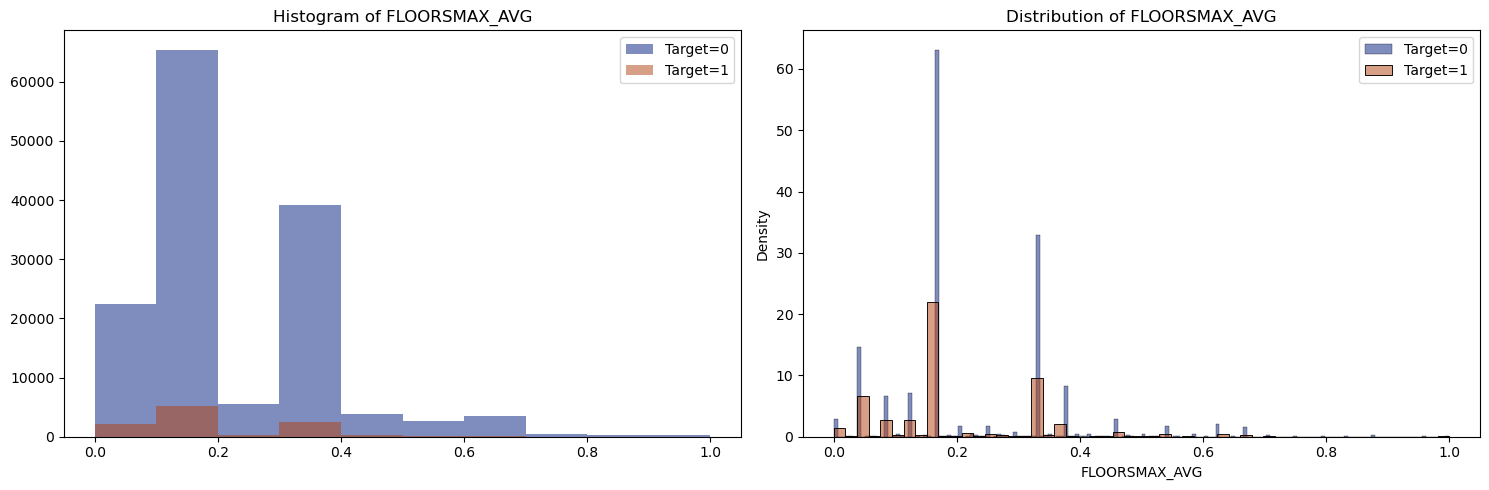

PLOTTING OF YEARS_BEGINEXPLUATATION_MODE COLUMN


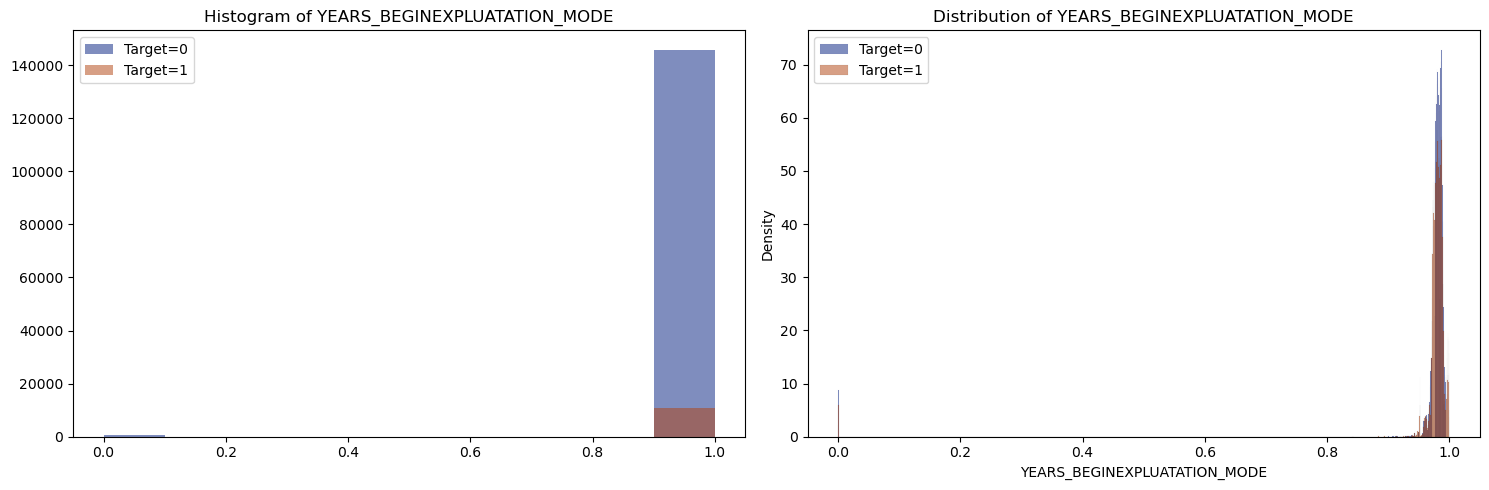

PLOTTING OF FLOORSMAX_MODE COLUMN


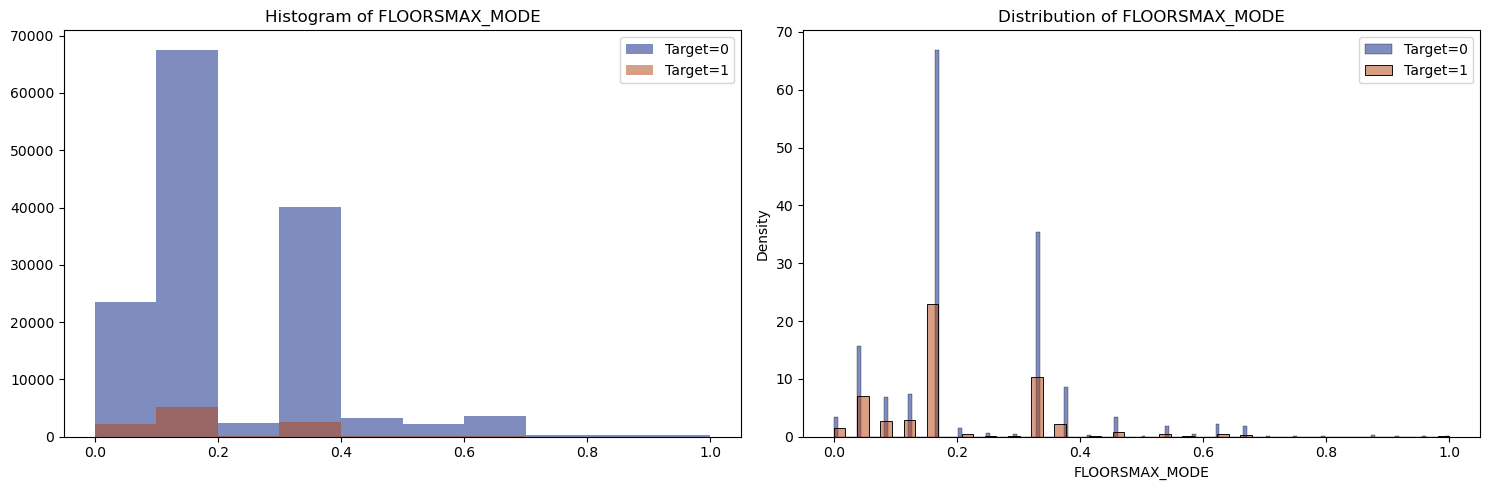

PLOTTING OF YEARS_BEGINEXPLUATATION_MEDI COLUMN


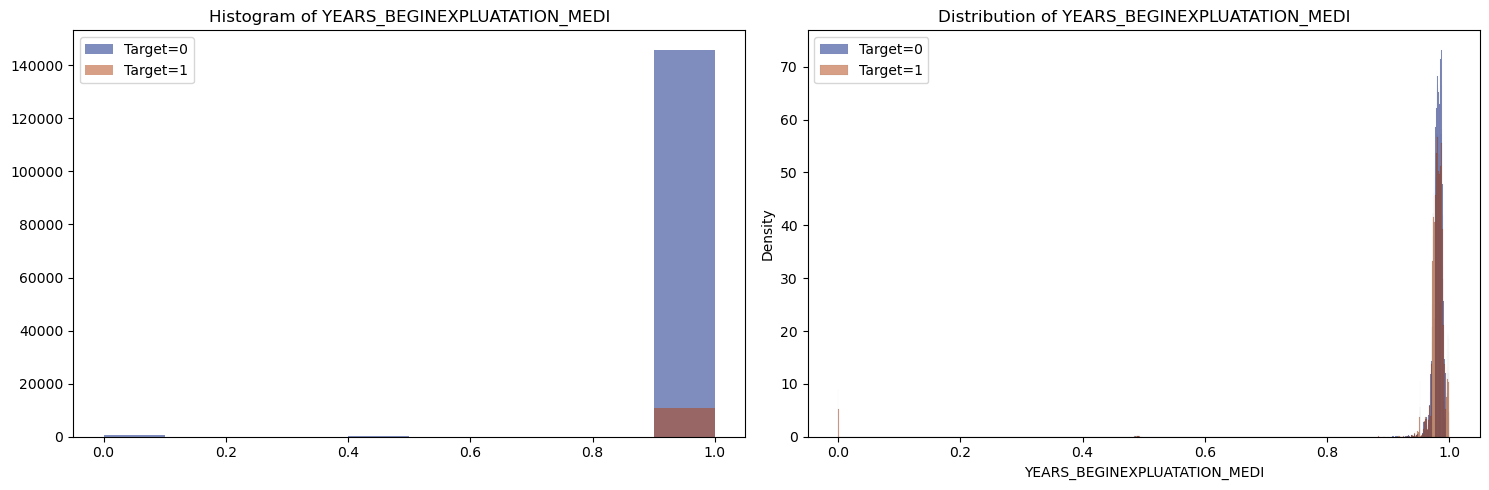

PLOTTING OF FLOORSMAX_MEDI COLUMN


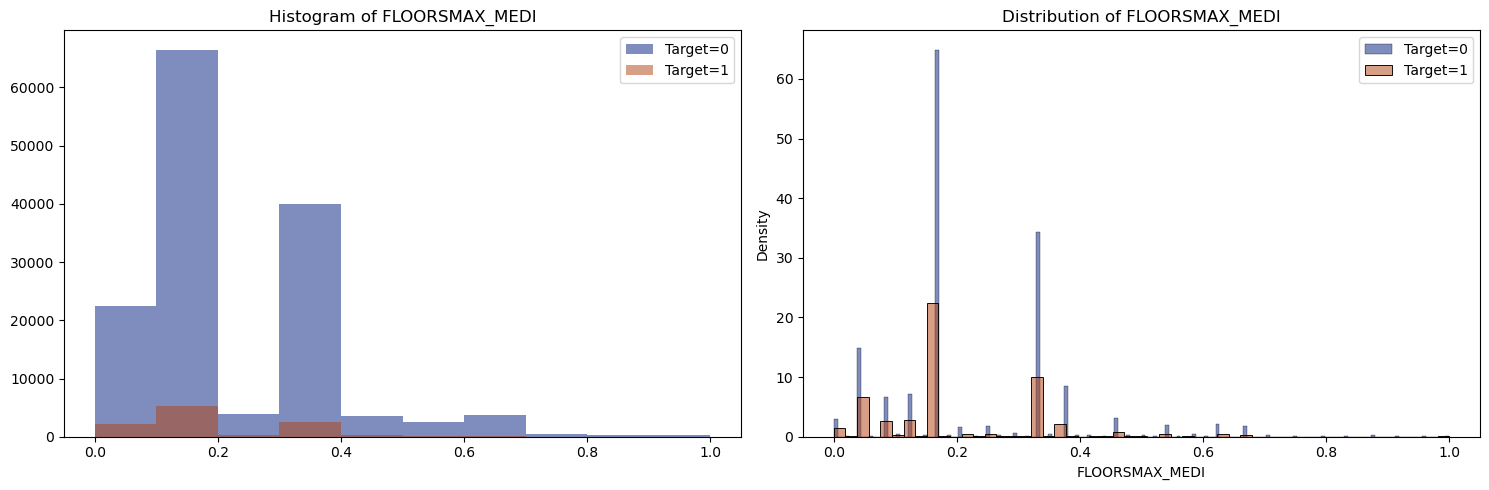

PLOTTING OF TOTALAREA_MODE COLUMN


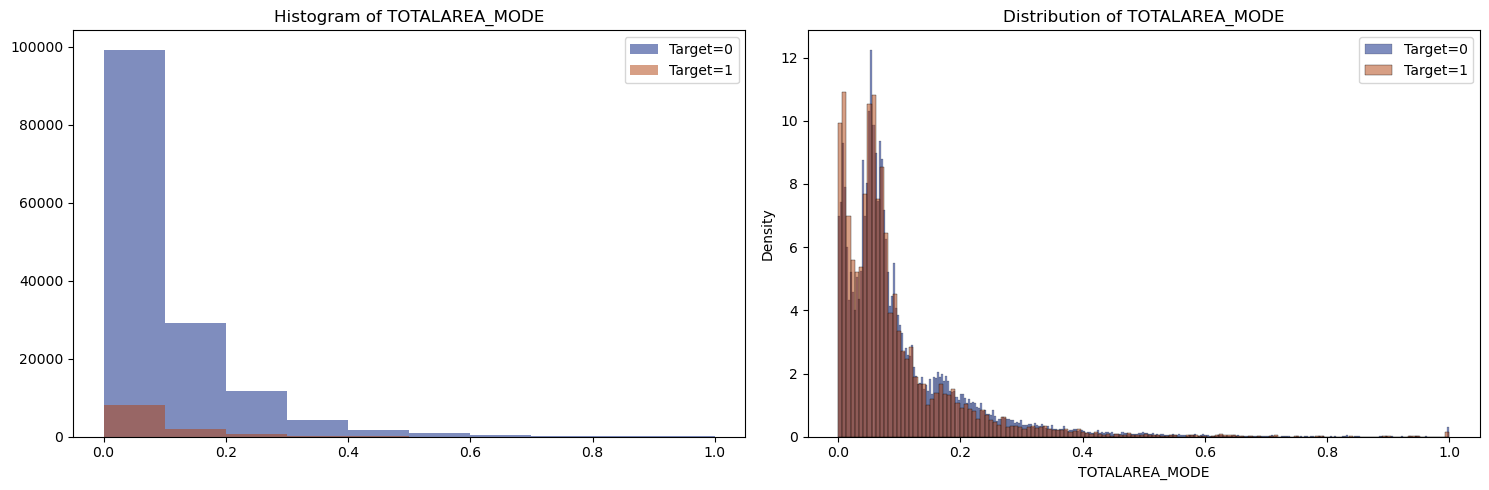

PLOTTING OF OBS_30_CNT_SOCIAL_CIRCLE COLUMN


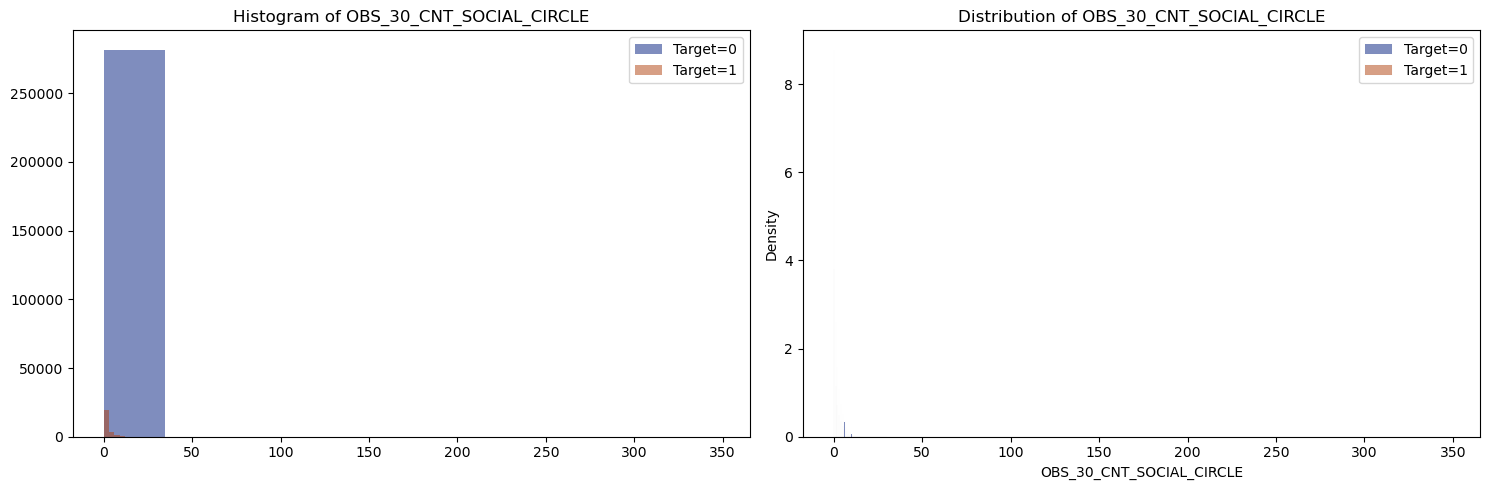

PLOTTING OF DEF_30_CNT_SOCIAL_CIRCLE COLUMN


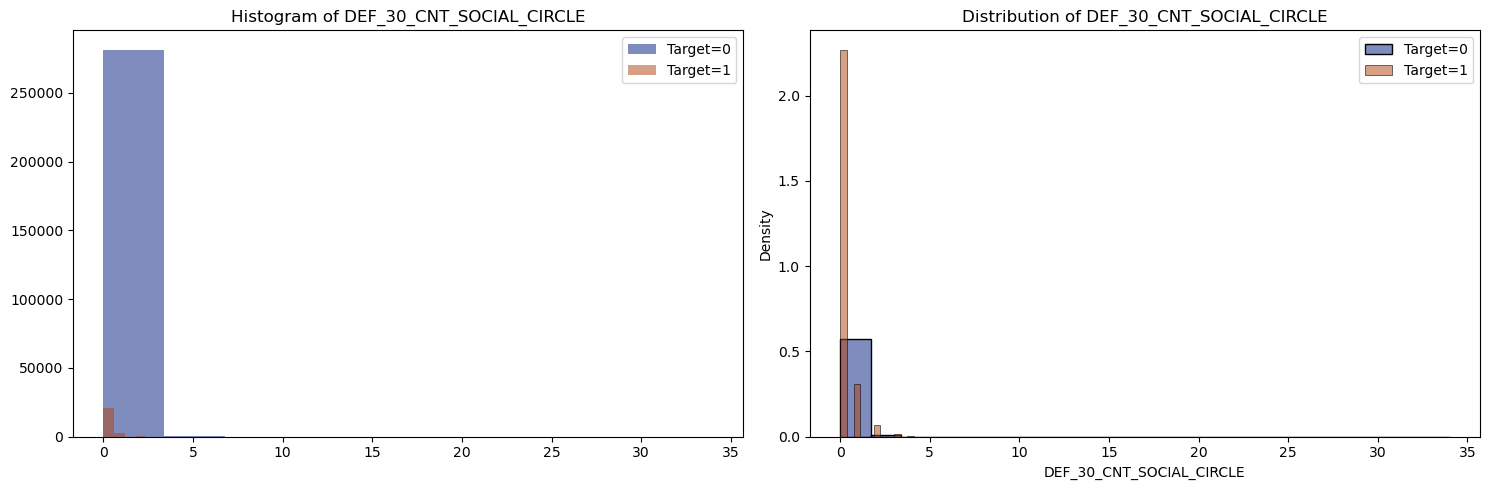

PLOTTING OF OBS_60_CNT_SOCIAL_CIRCLE COLUMN


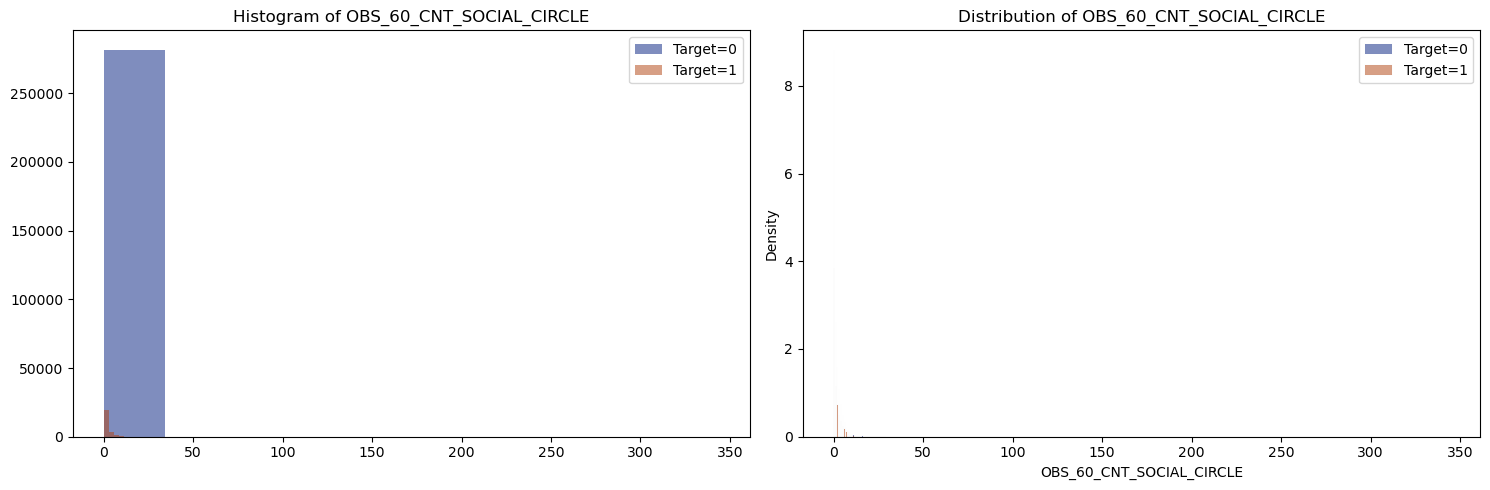

PLOTTING OF DEF_60_CNT_SOCIAL_CIRCLE COLUMN


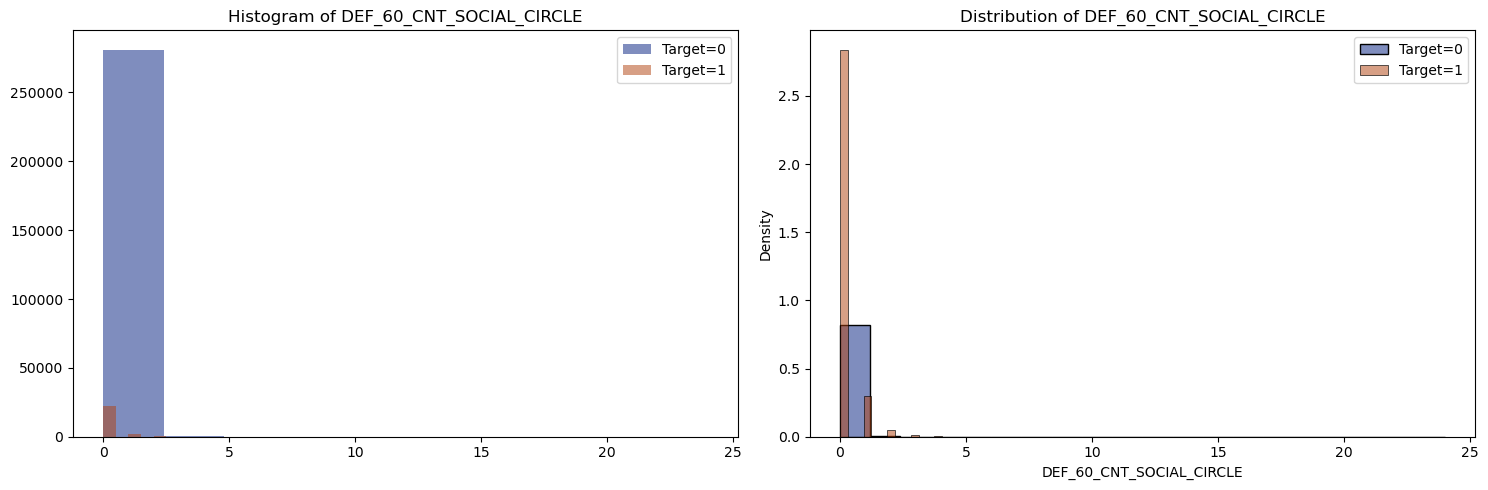

PLOTTING OF DAYS_LAST_PHONE_CHANGE COLUMN


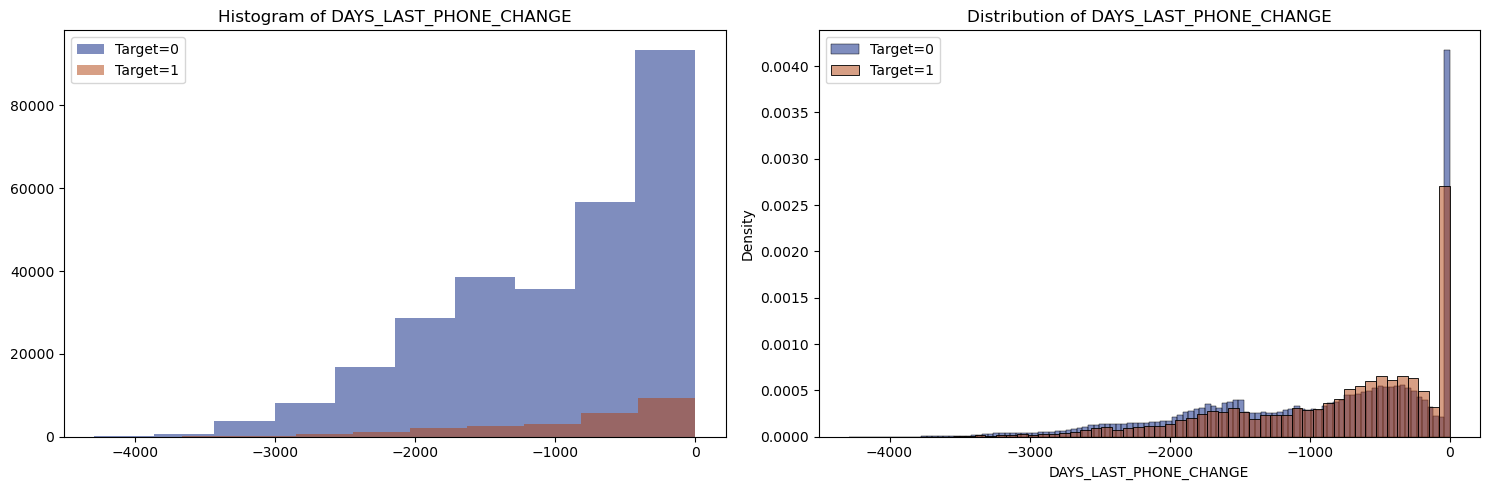

PLOTTING OF FLAG_DOCUMENT_2 COLUMN


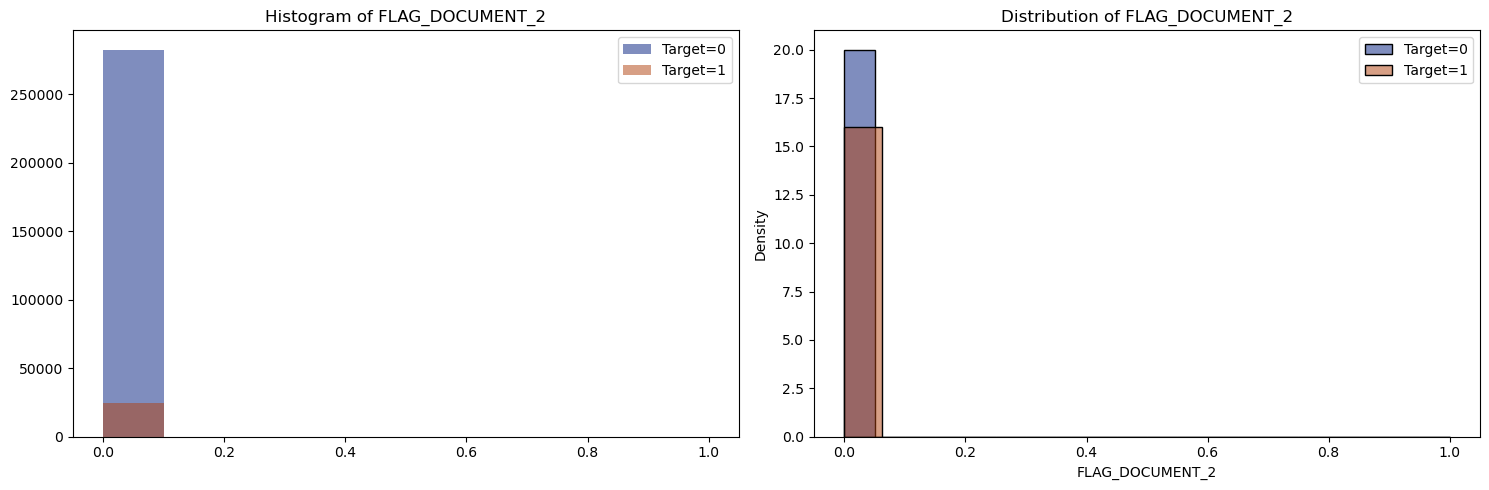

PLOTTING OF FLAG_DOCUMENT_3 COLUMN


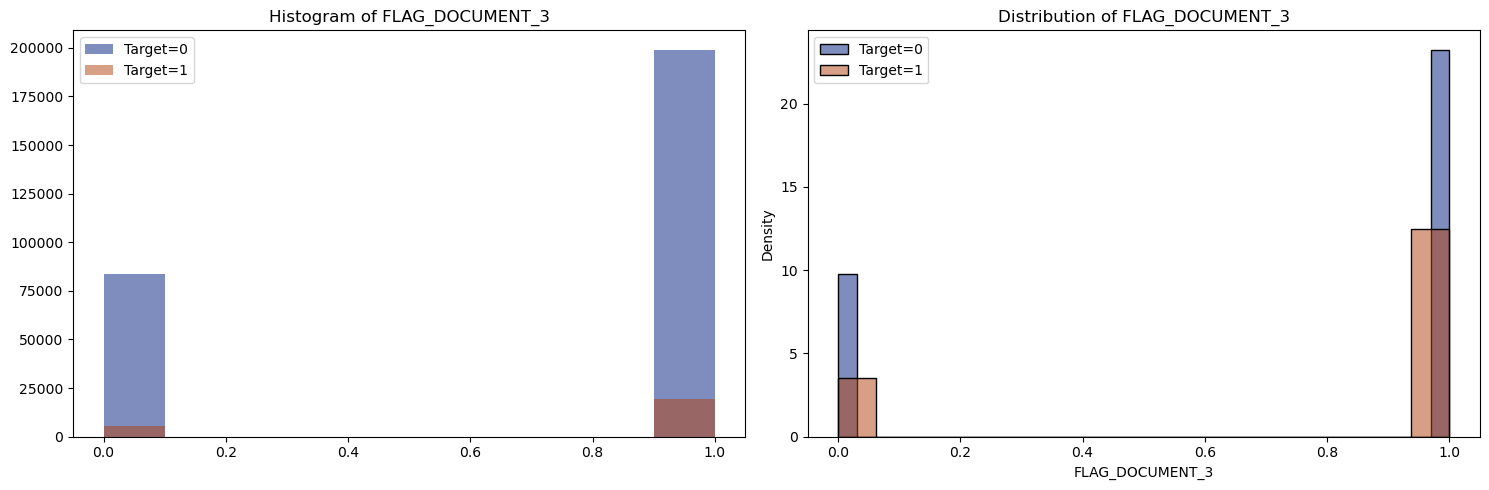

PLOTTING OF FLAG_DOCUMENT_4 COLUMN


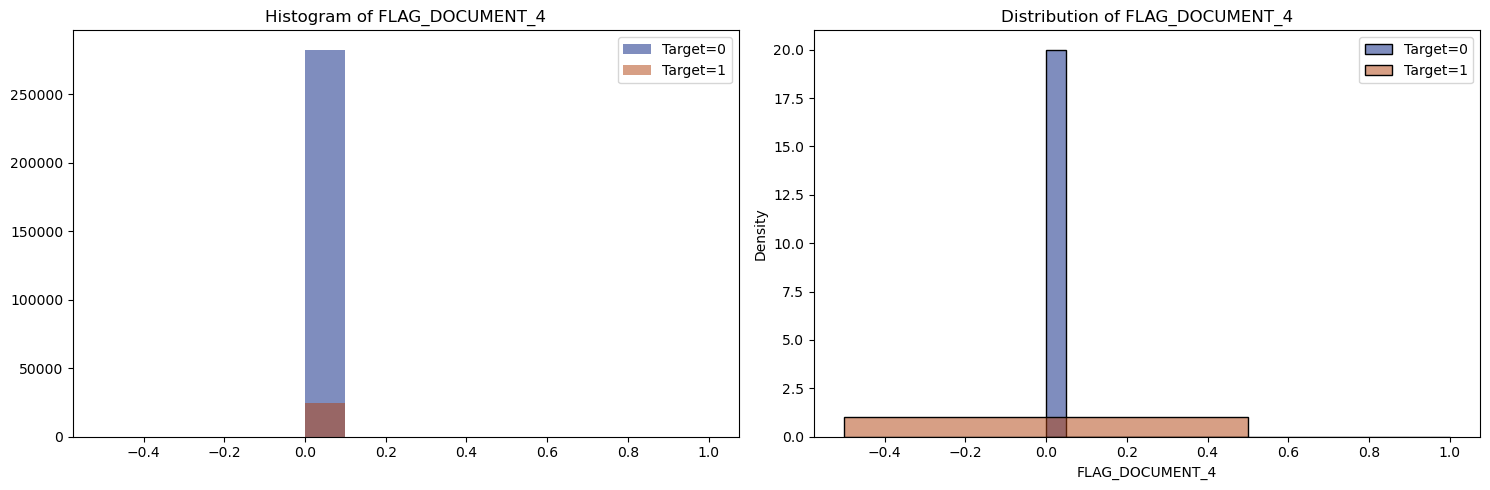

PLOTTING OF FLAG_DOCUMENT_5 COLUMN


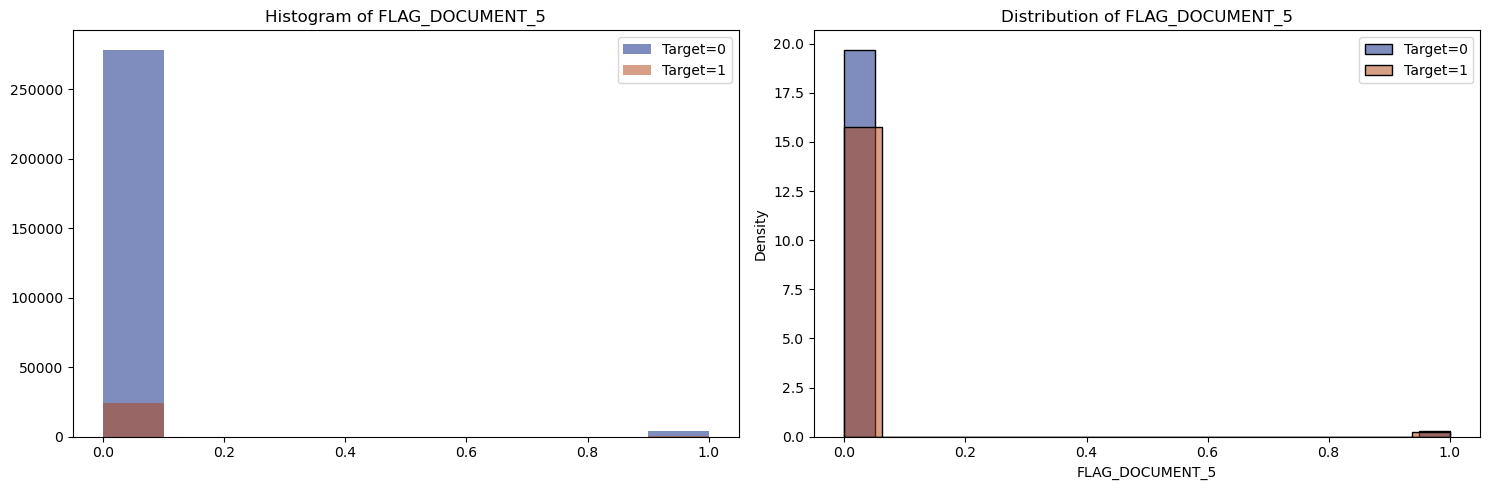

PLOTTING OF FLAG_DOCUMENT_6 COLUMN


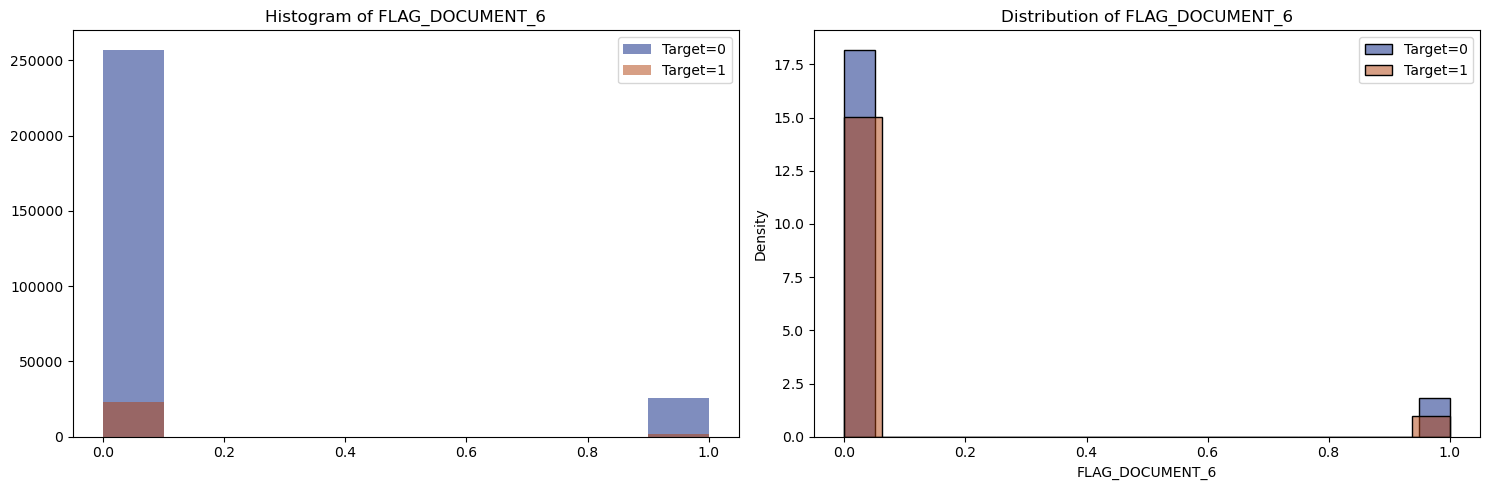

PLOTTING OF FLAG_DOCUMENT_7 COLUMN


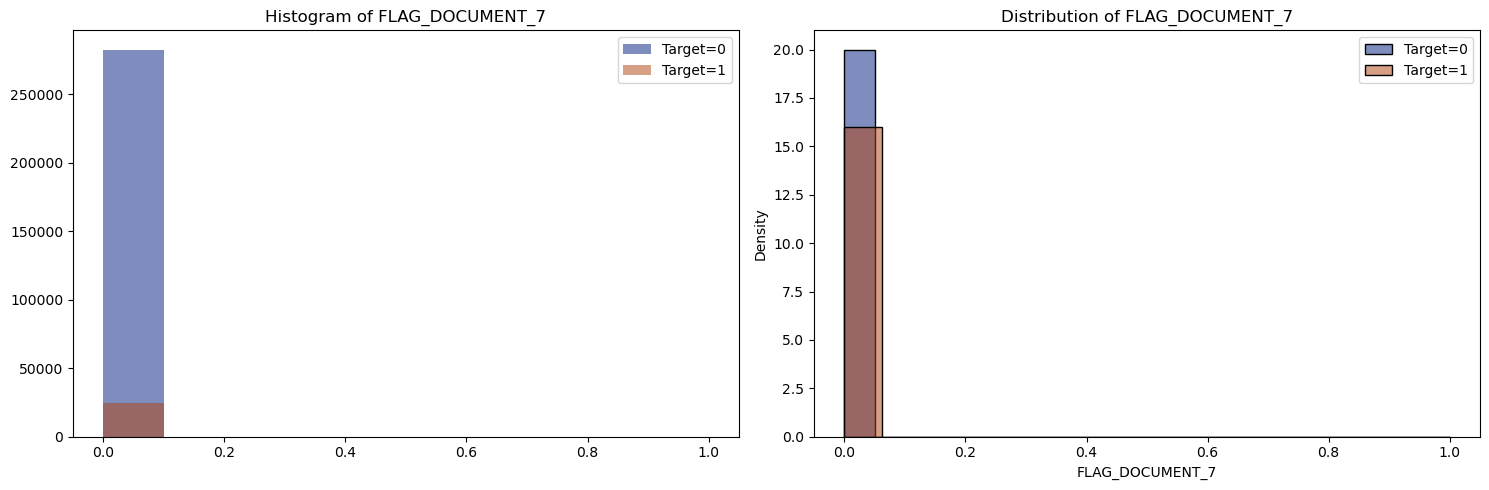

PLOTTING OF FLAG_DOCUMENT_8 COLUMN


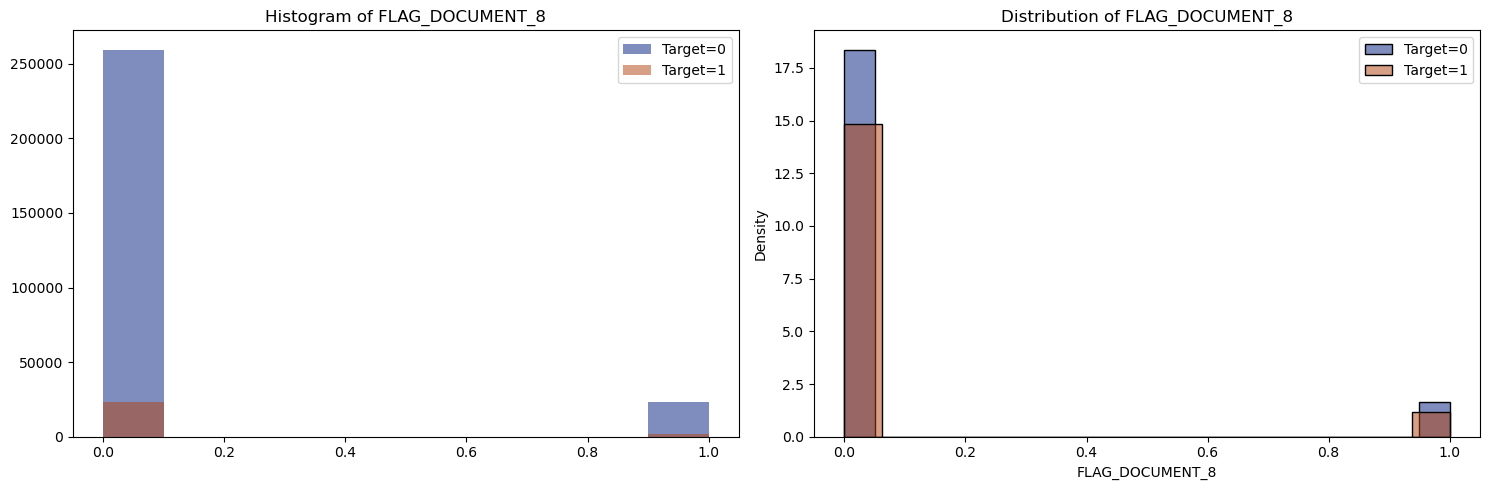

PLOTTING OF FLAG_DOCUMENT_9 COLUMN


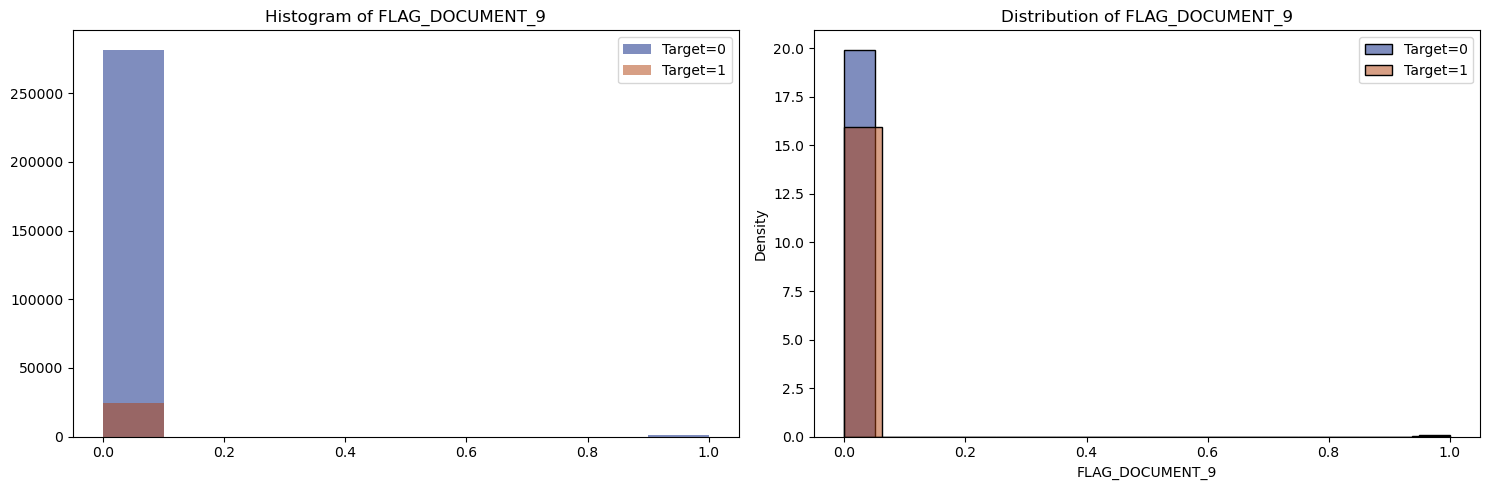

PLOTTING OF FLAG_DOCUMENT_10 COLUMN


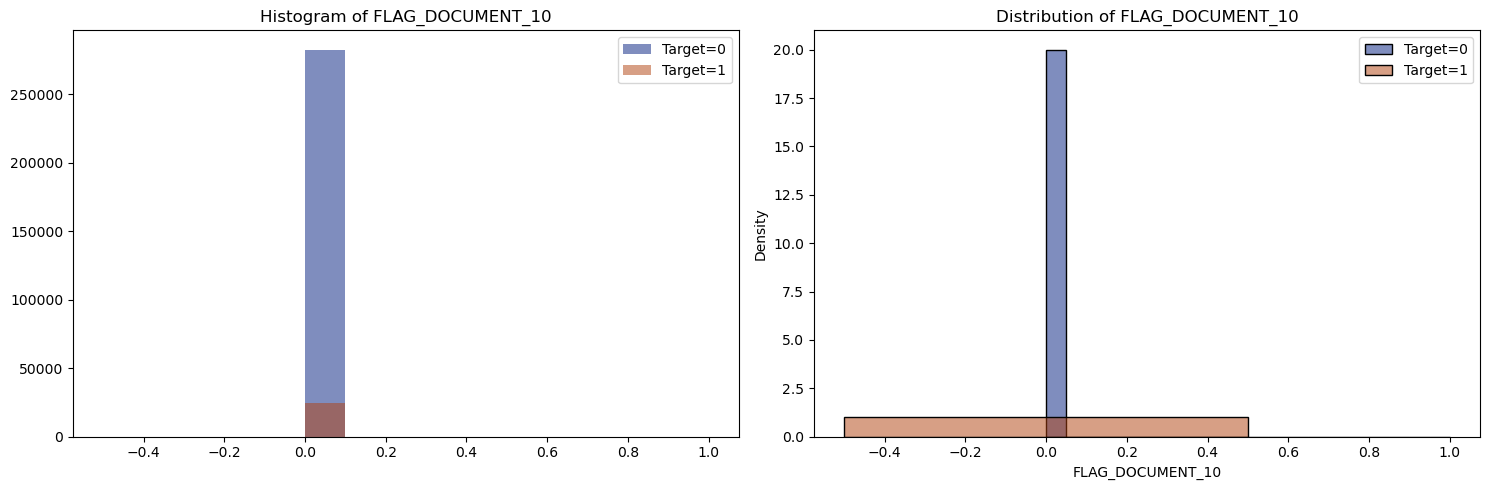

PLOTTING OF FLAG_DOCUMENT_11 COLUMN


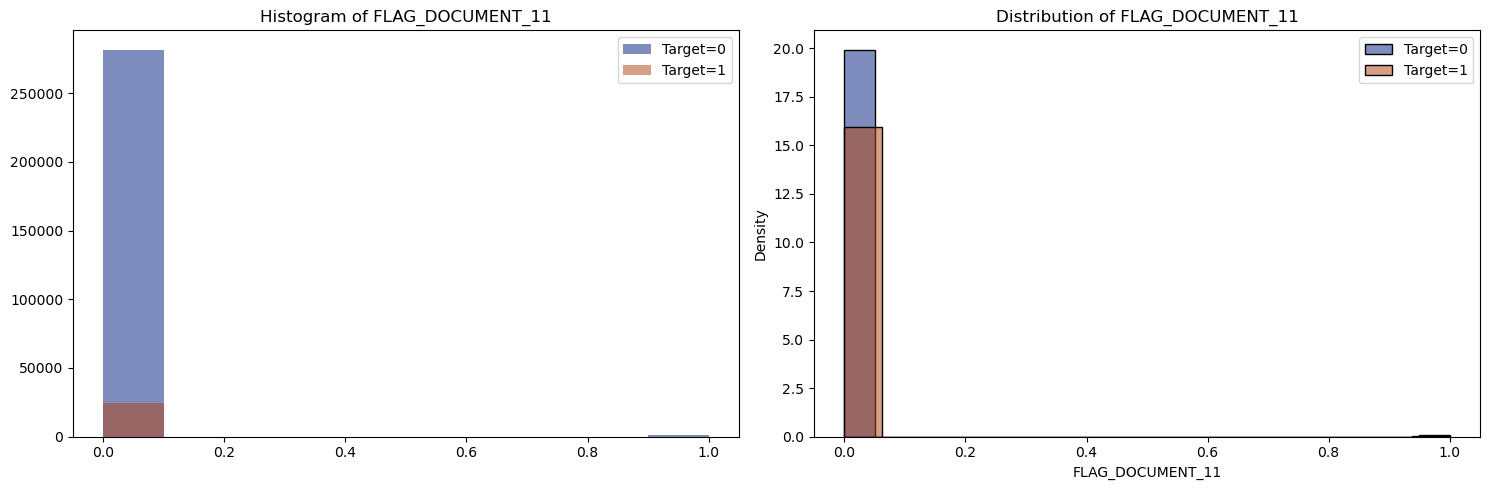

PLOTTING OF FLAG_DOCUMENT_12 COLUMN


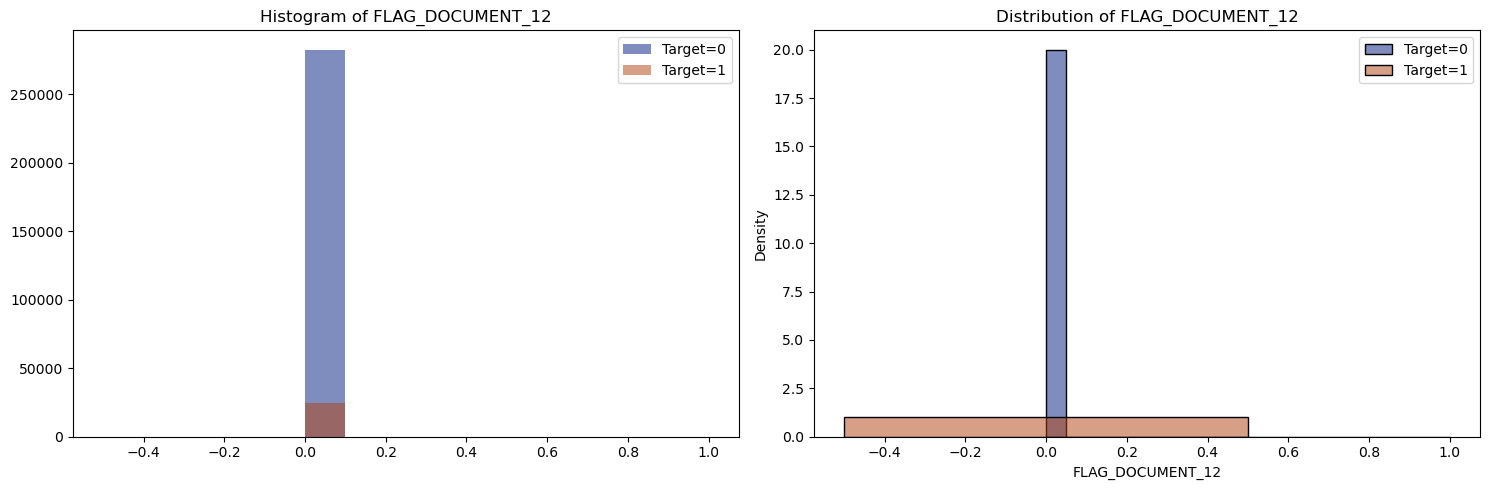

PLOTTING OF FLAG_DOCUMENT_13 COLUMN


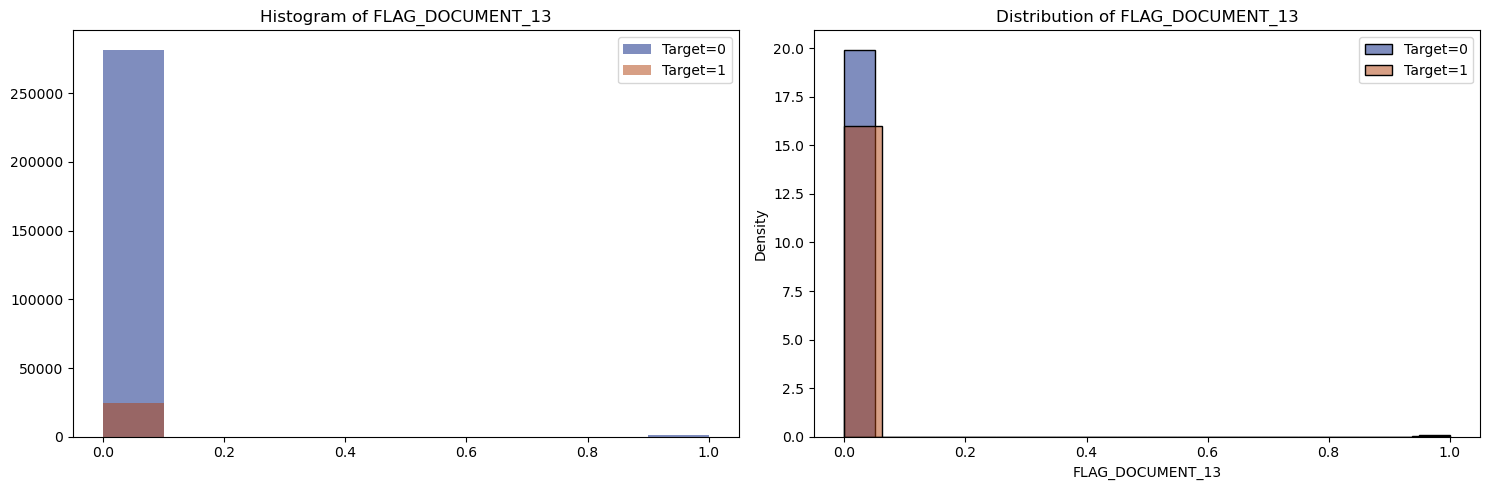

PLOTTING OF FLAG_DOCUMENT_14 COLUMN


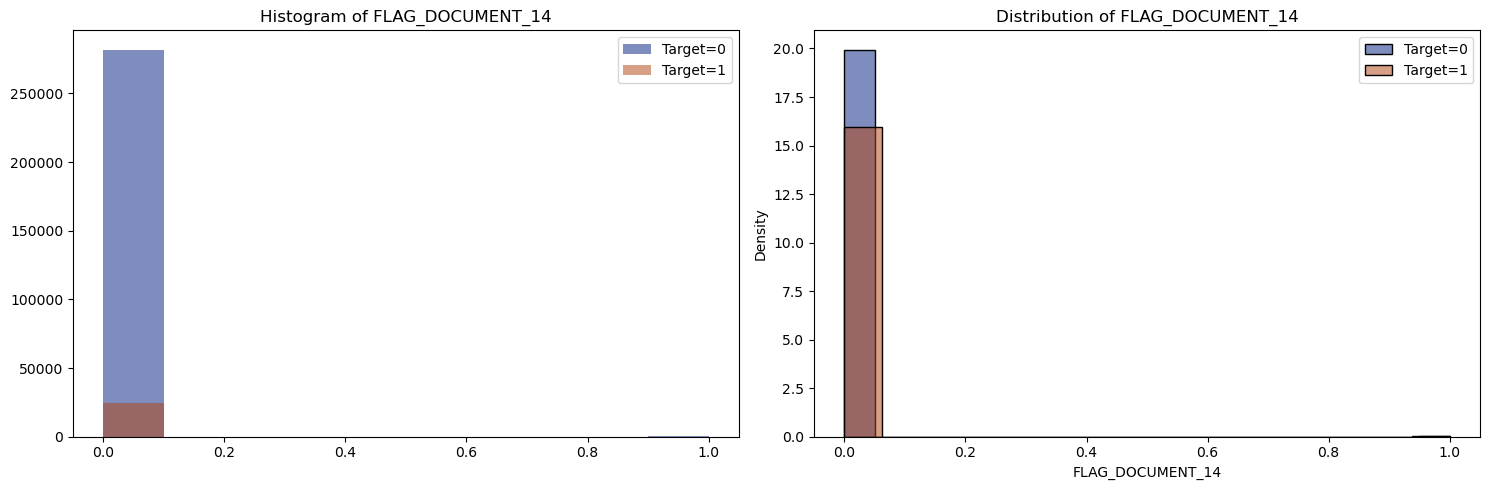

PLOTTING OF FLAG_DOCUMENT_15 COLUMN


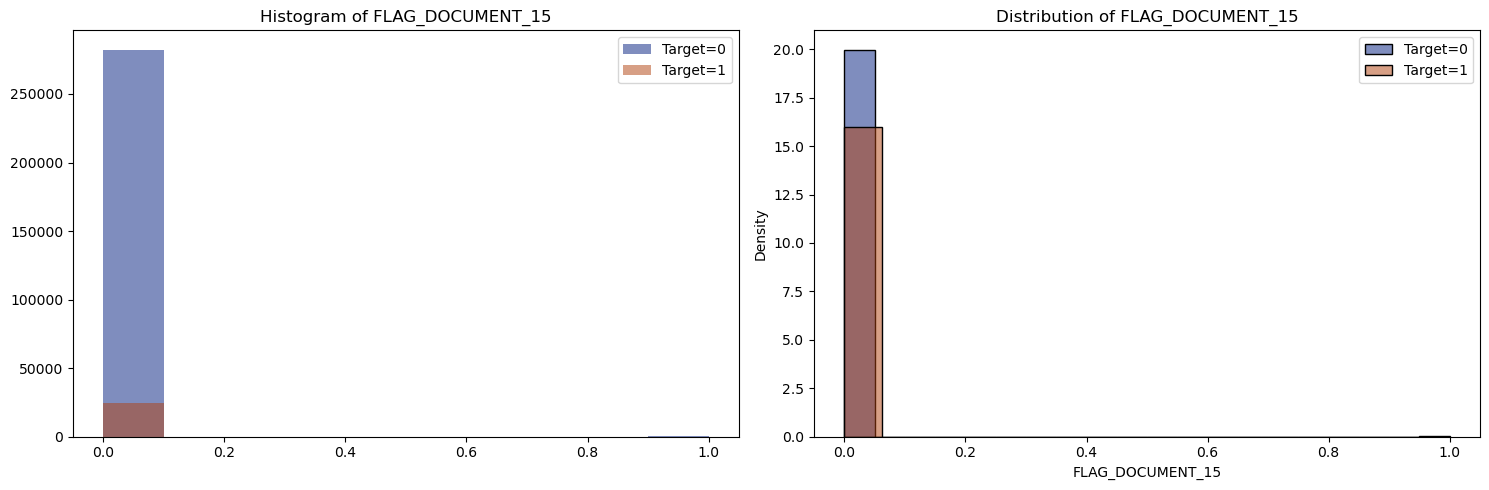

PLOTTING OF FLAG_DOCUMENT_16 COLUMN


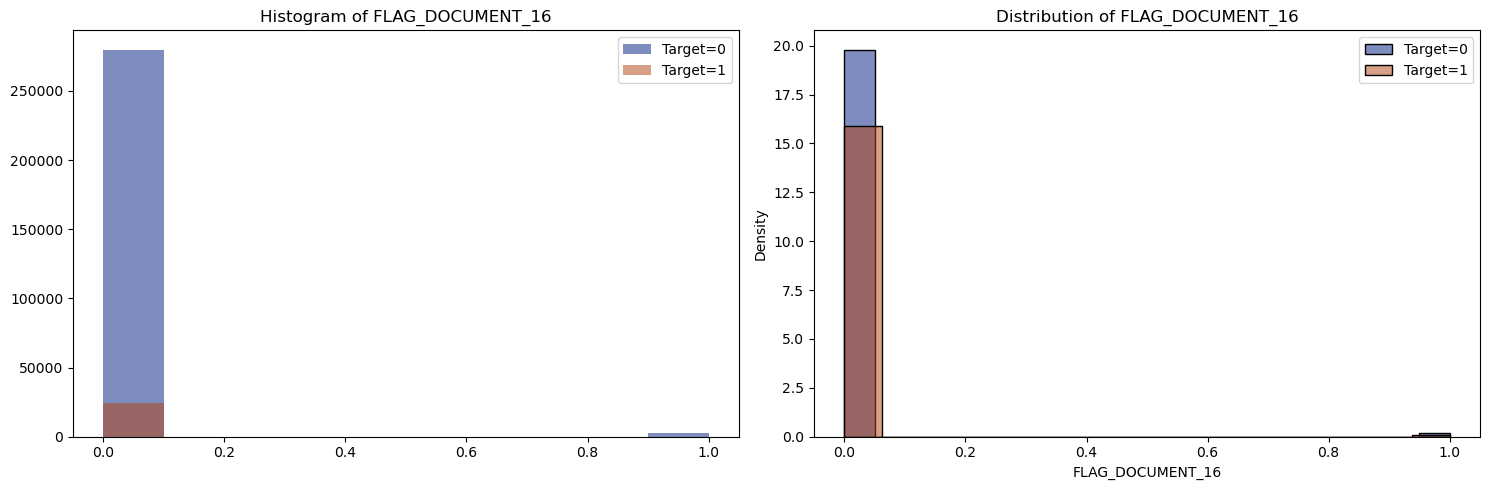

PLOTTING OF FLAG_DOCUMENT_17 COLUMN


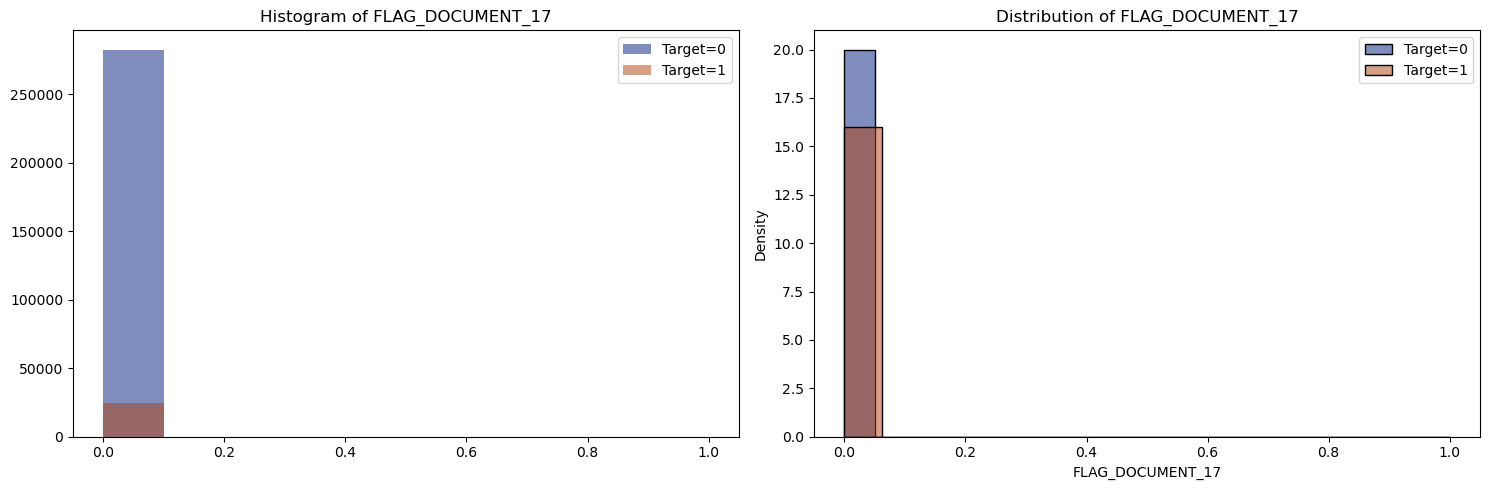

PLOTTING OF FLAG_DOCUMENT_18 COLUMN


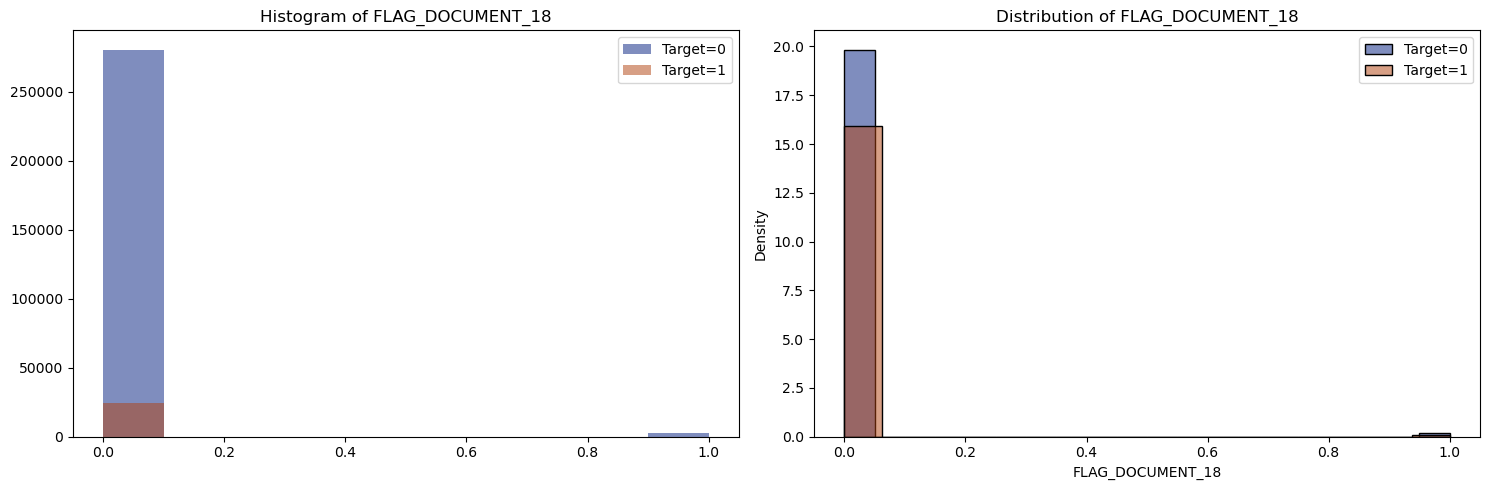

PLOTTING OF FLAG_DOCUMENT_19 COLUMN


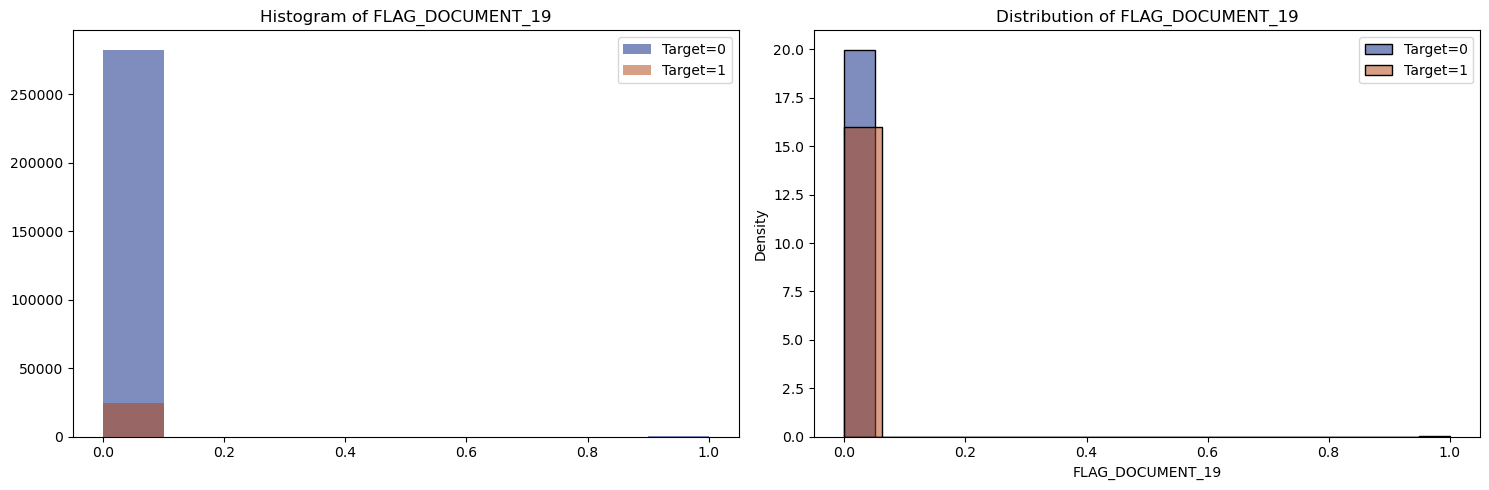

PLOTTING OF FLAG_DOCUMENT_20 COLUMN


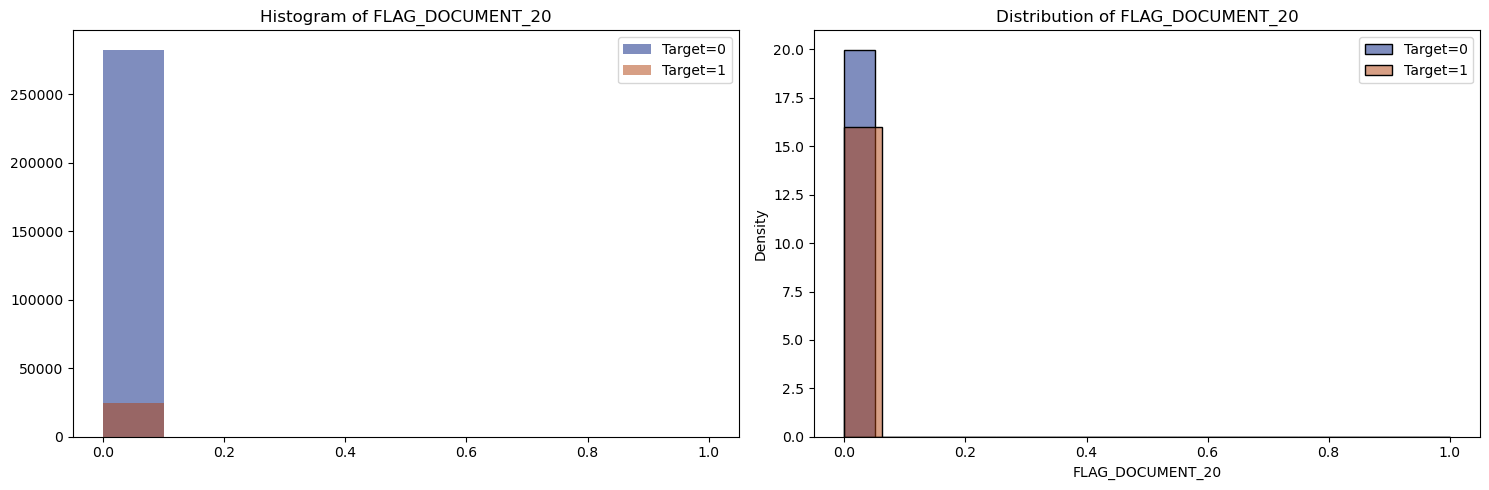

PLOTTING OF FLAG_DOCUMENT_21 COLUMN


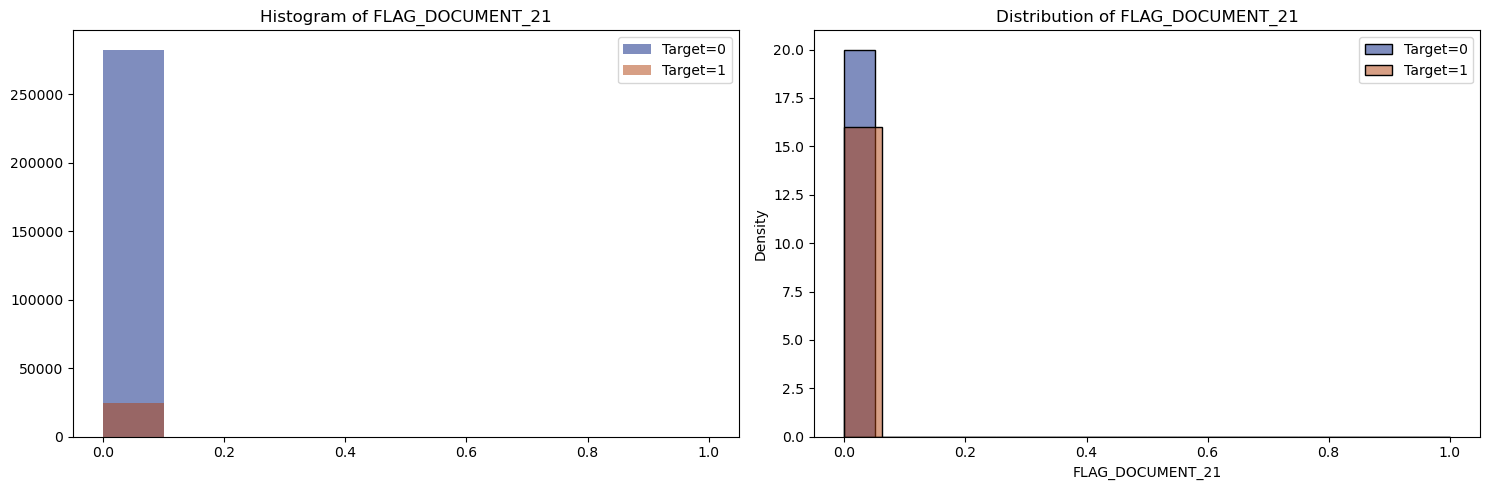

PLOTTING OF AMT_REQ_CREDIT_BUREAU_HOUR COLUMN


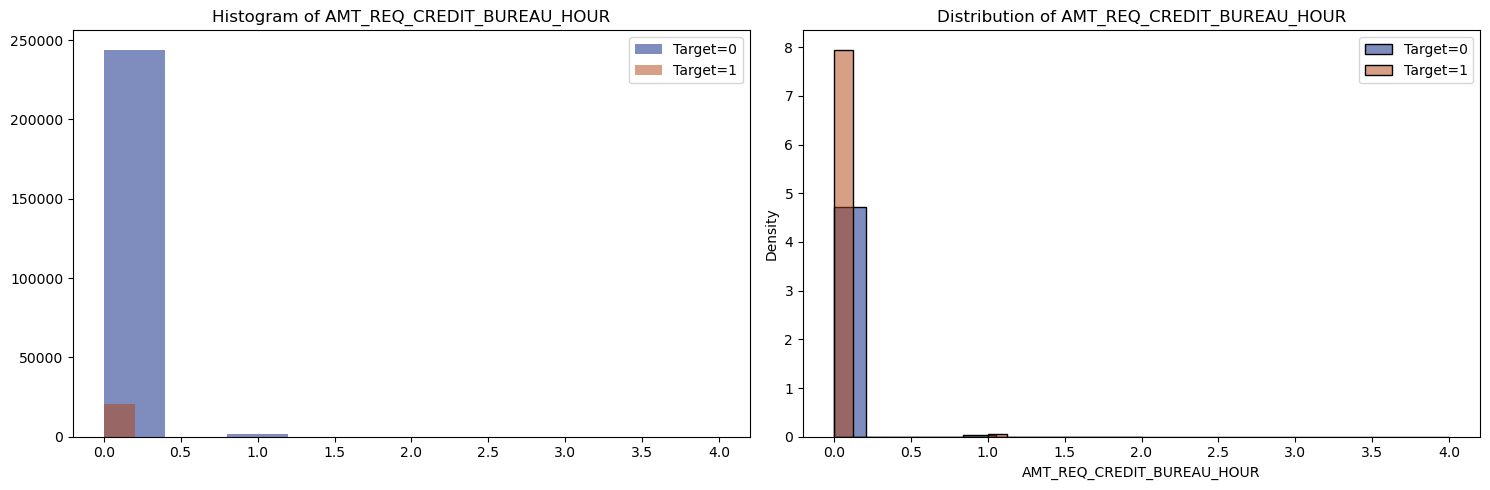

PLOTTING OF AMT_REQ_CREDIT_BUREAU_DAY COLUMN


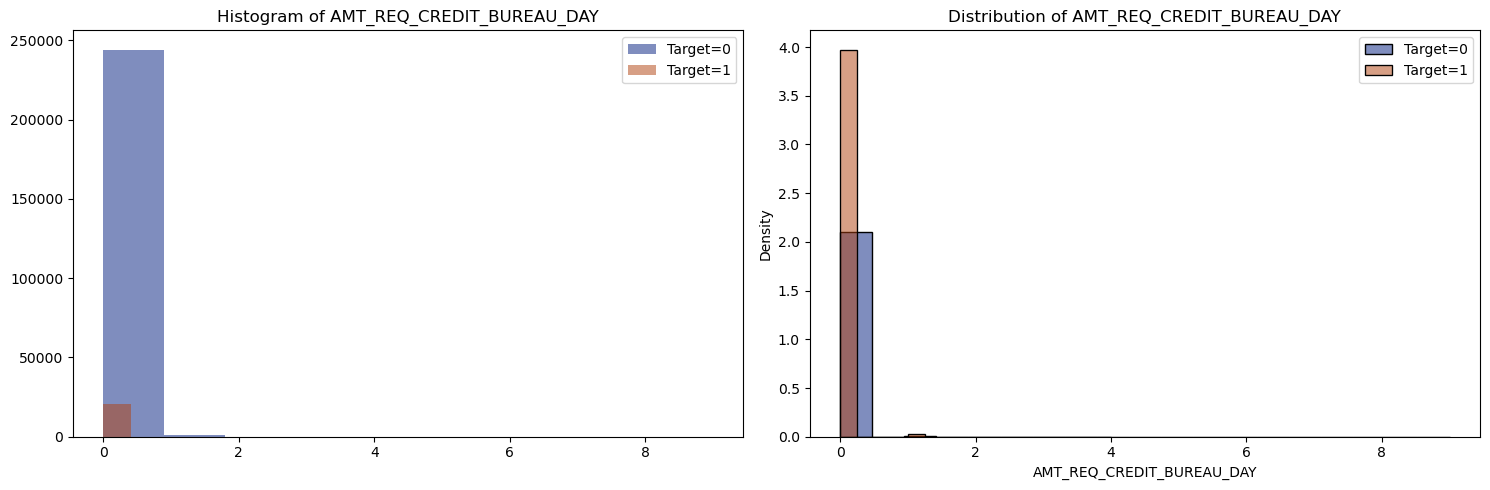

PLOTTING OF AMT_REQ_CREDIT_BUREAU_WEEK COLUMN


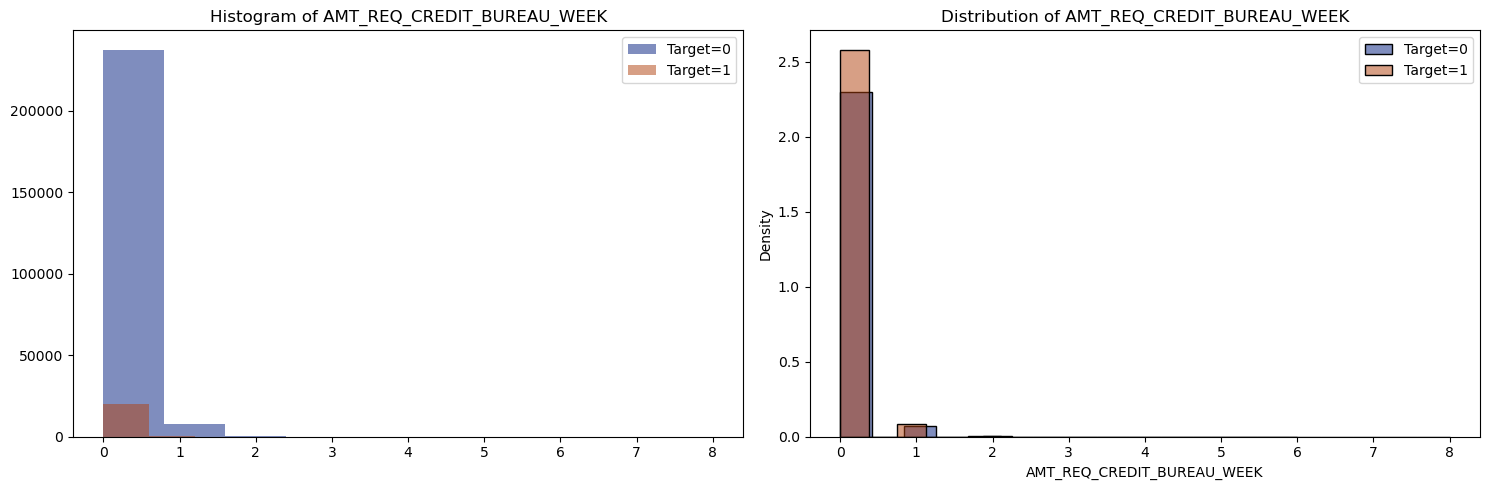

PLOTTING OF AMT_REQ_CREDIT_BUREAU_MON COLUMN


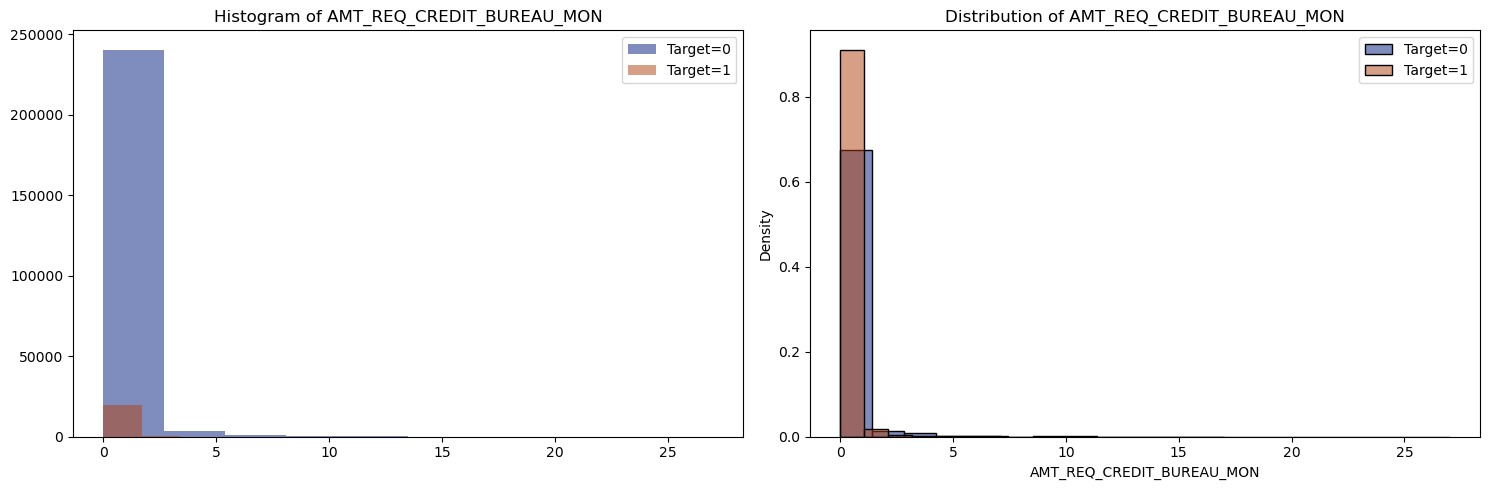

PLOTTING OF AMT_REQ_CREDIT_BUREAU_QRT COLUMN


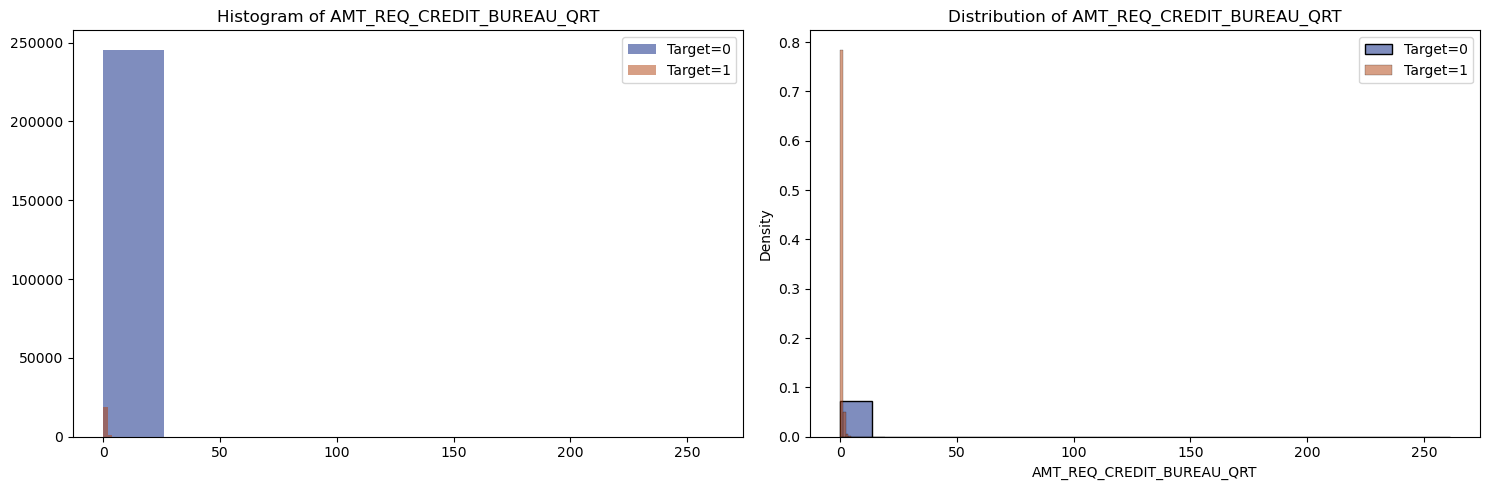

PLOTTING OF AMT_REQ_CREDIT_BUREAU_YEAR COLUMN


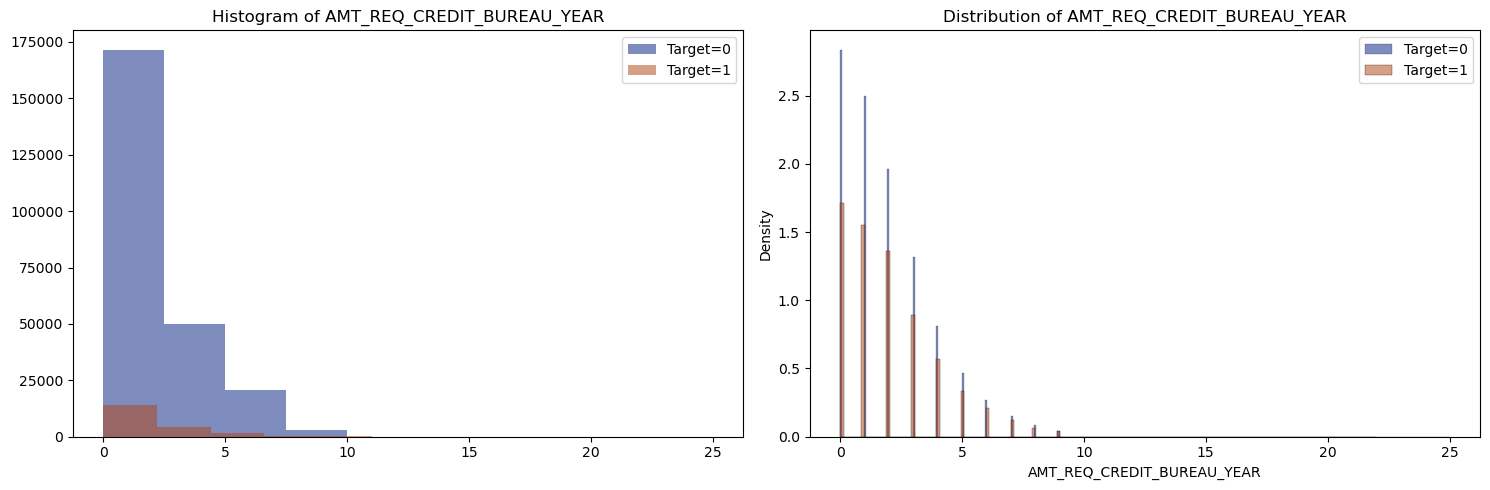

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the Seaborn dark palette
sns.set_palette("dark")

# Iterate over each numerical column to generate plots
for column in data_numerical:
    # Construct and print the title for the current plot
    print("\033[1mPLOTTING OF " + column + " COLUMN\033[1m")

    plt.figure(figsize=(15, 5))

    # Plot histograms for the distribution of the variable for both TARGET categories
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
    plt.hist(data_0[column], alpha=0.5, label='Target=0')  # Histogram for category '0'
    plt.hist(data_1[column], alpha=0.5, label='Target=1')  # Histogram for category '1'
    plt.legend()  # Add a legend to distinguish between categories
    plt.title(f'Histogram of {column}')  # Add title for histogram

    # Plot distribution plots for the non-null values in both TARGET categories
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
    sns.histplot(data_0[column].dropna(), label='Target=0', kde=False, stat='density', alpha=0.5)  # Distribution plot for '0'
    sns.histplot(data_1[column].dropna(), label='Target=1', kde=False, stat='density', alpha=0.5)  # Distribution plot for '1'
    plt.legend()  # Add a legend to distinguish between categories
    plt.title(f'Distribution of {column}')  # Add title for distribution plot

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()  # Display the plots for the current column


### **OBSERVATION-2**
The columns that show noticeable differences between the histogram and distribution plot for target of 0 and 1 
- AMT_CREDIT:
- AMT_ANNUITY:
- AMT_GOODS_PRICE
- DAYS_BIRTH
- HOURS_APPR_PROCESS_START
- EXT_SOUCE_2
- EXT_SOURCE_3
- AMT_REQ_CREDIT_BUREAU_YEAR

# Task 5 - Outliers

Plotting the numerial data based on the index and analysing if there are outliers in any of the columns:

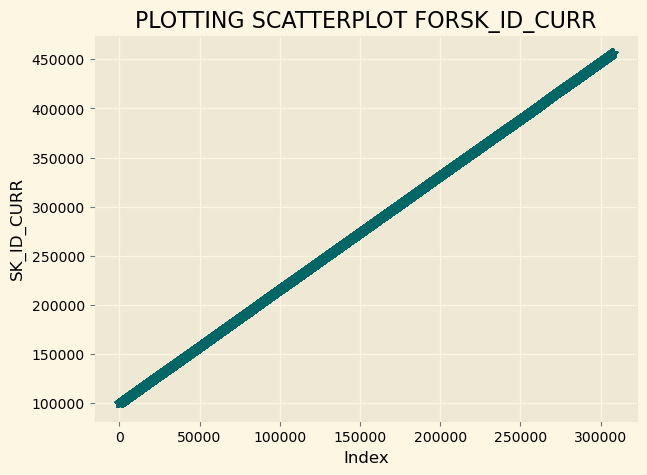

*****************************************************************************************************************


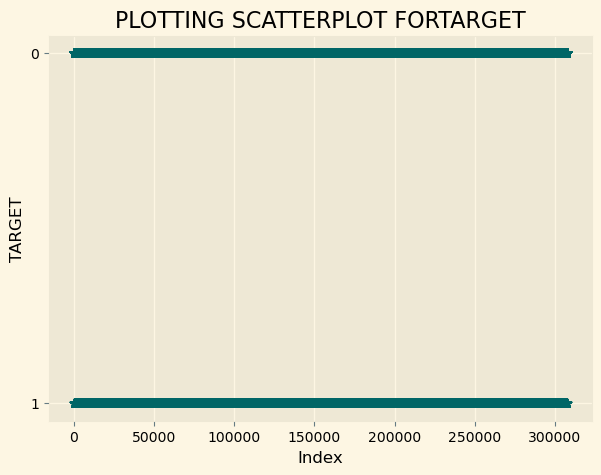

*****************************************************************************************************************


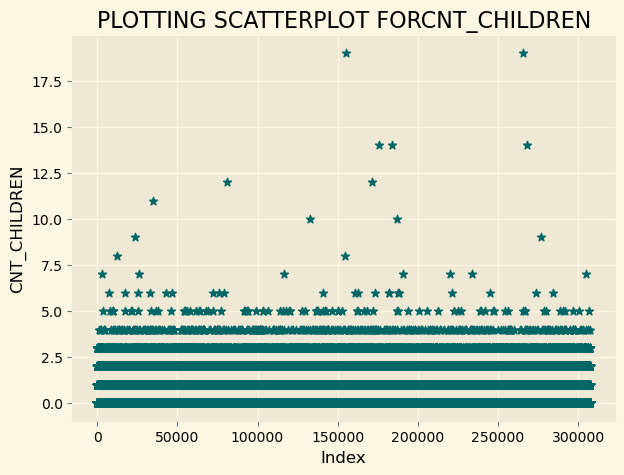

*****************************************************************************************************************


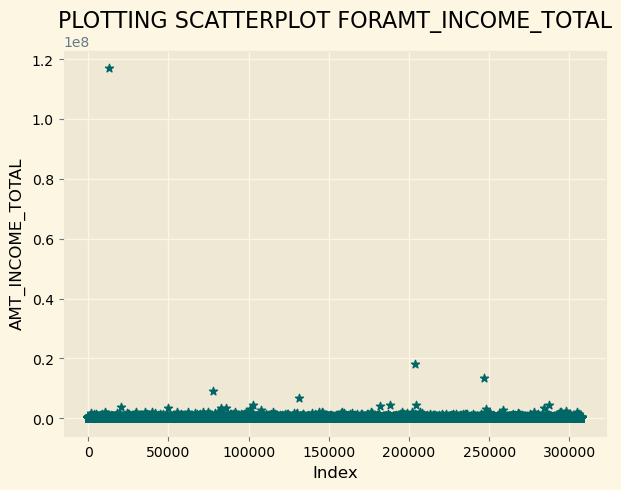

*****************************************************************************************************************


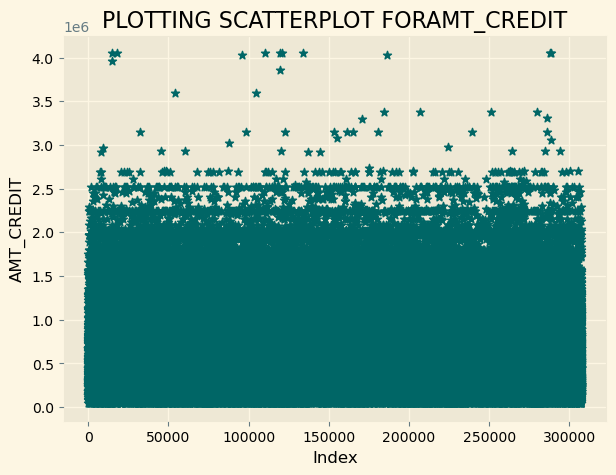

*****************************************************************************************************************


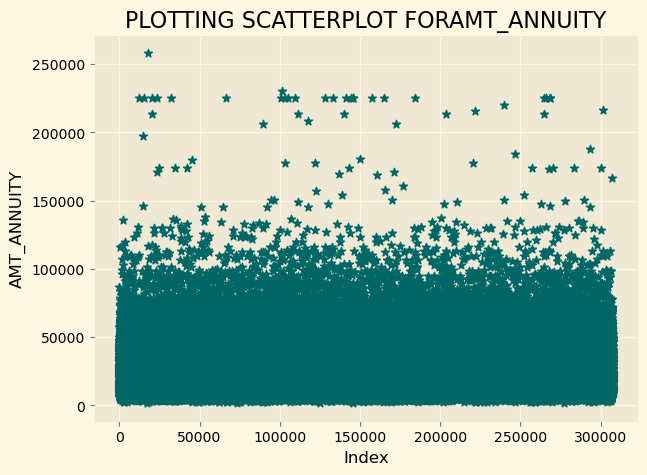

*****************************************************************************************************************


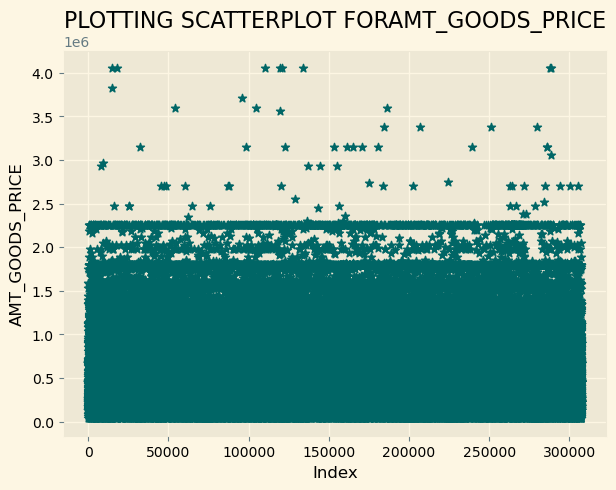

*****************************************************************************************************************


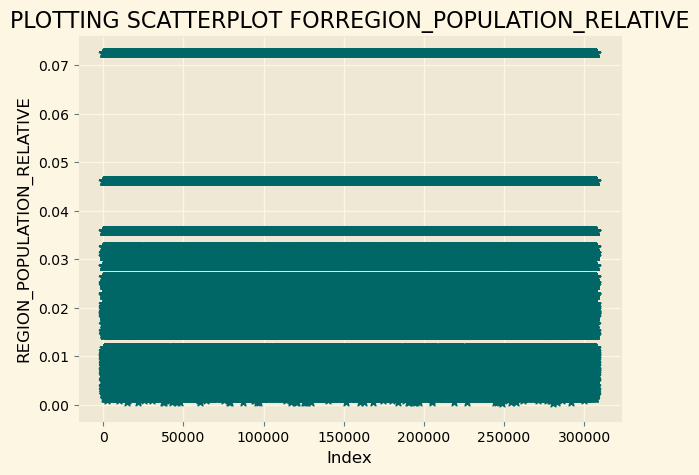

*****************************************************************************************************************


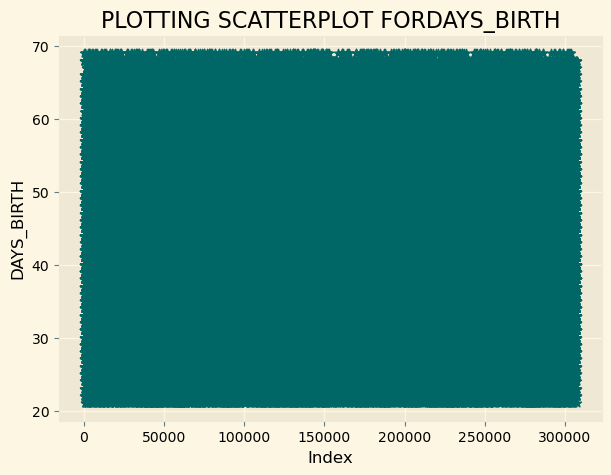

*****************************************************************************************************************


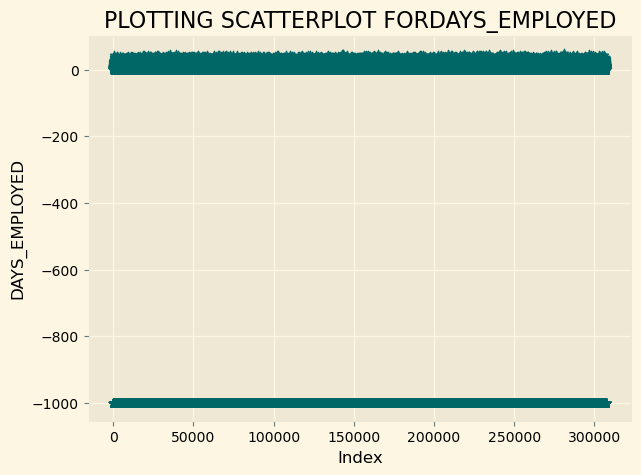

*****************************************************************************************************************


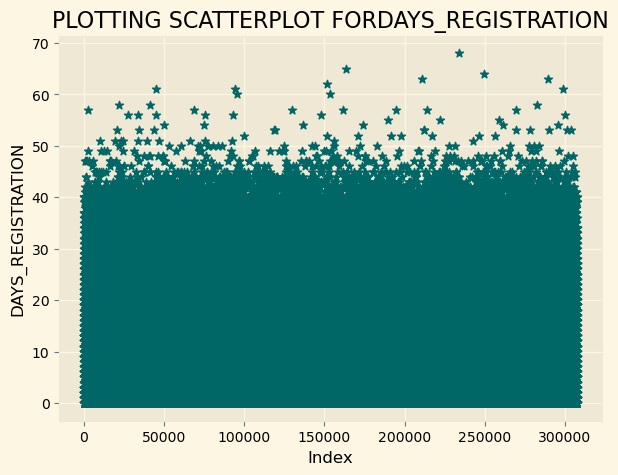

*****************************************************************************************************************


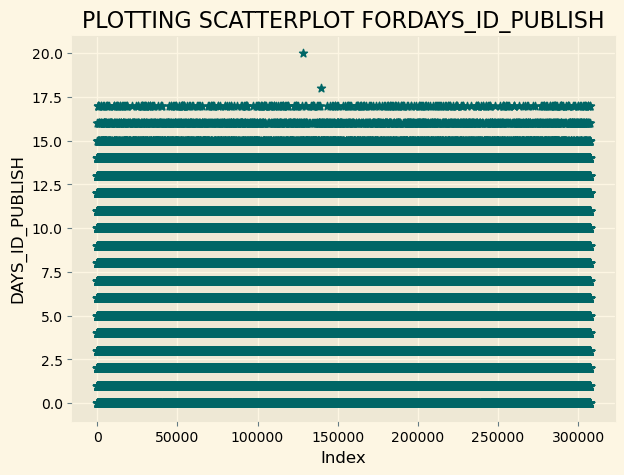

*****************************************************************************************************************


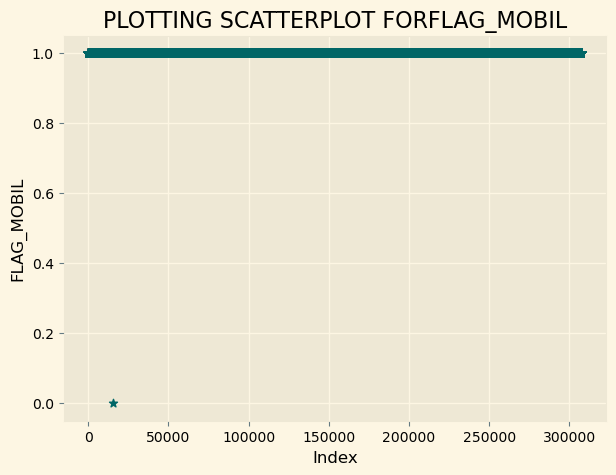

*****************************************************************************************************************


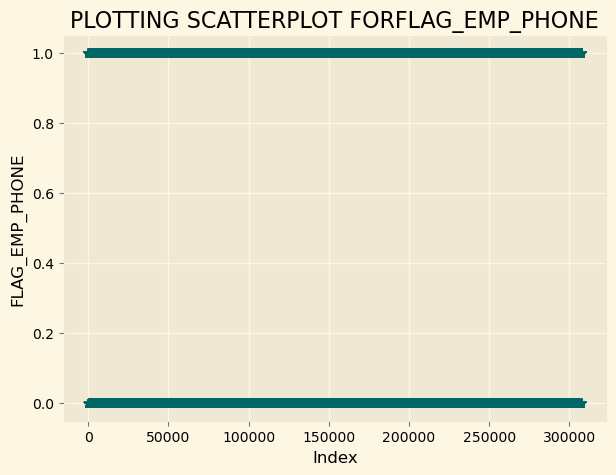

*****************************************************************************************************************


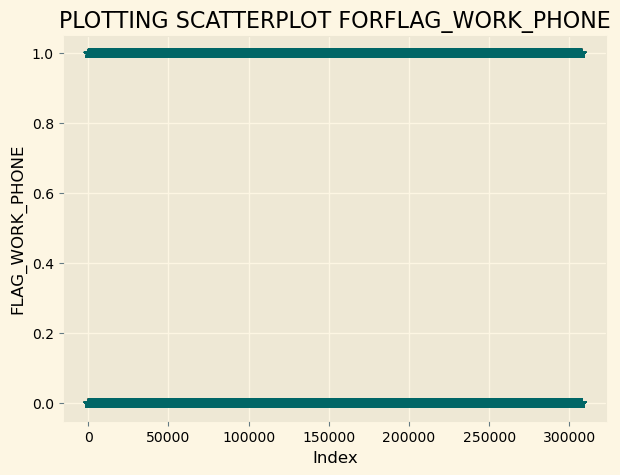

*****************************************************************************************************************


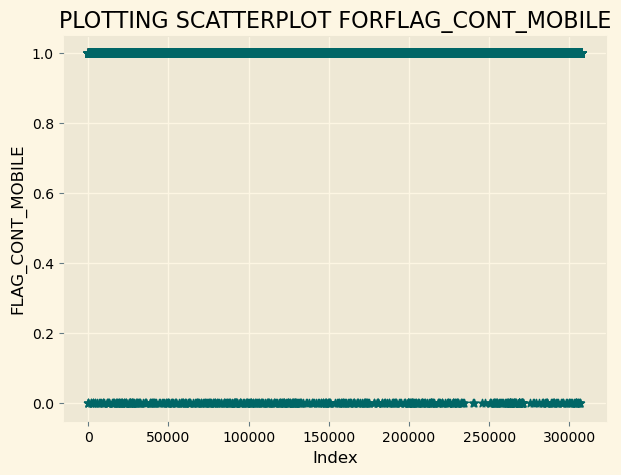

*****************************************************************************************************************


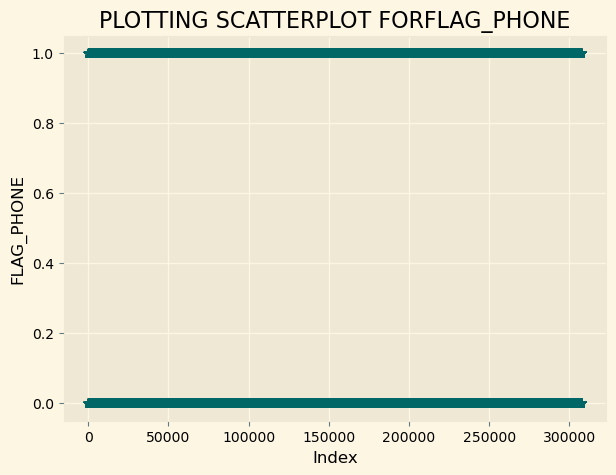

*****************************************************************************************************************


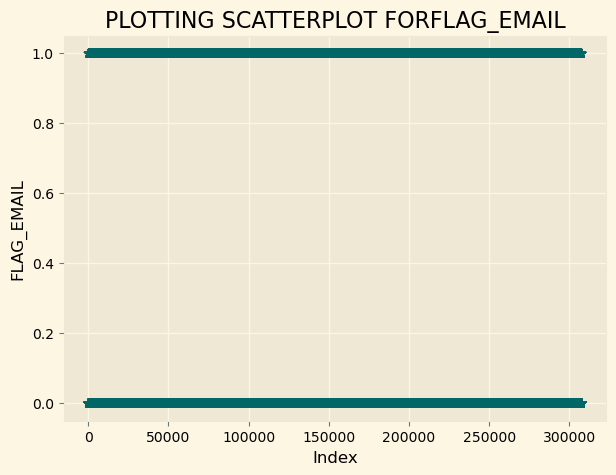

*****************************************************************************************************************


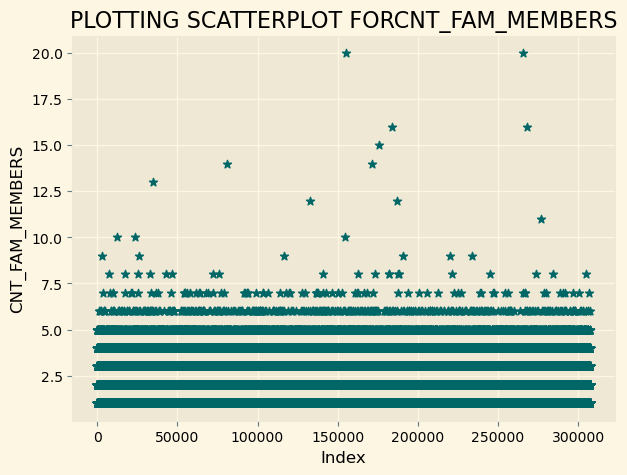

*****************************************************************************************************************


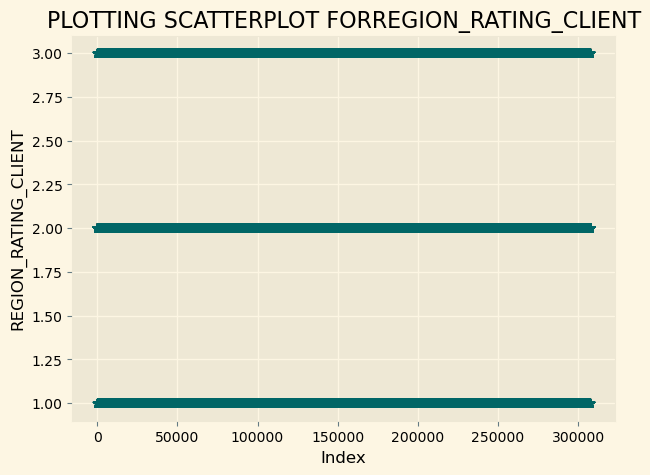

*****************************************************************************************************************


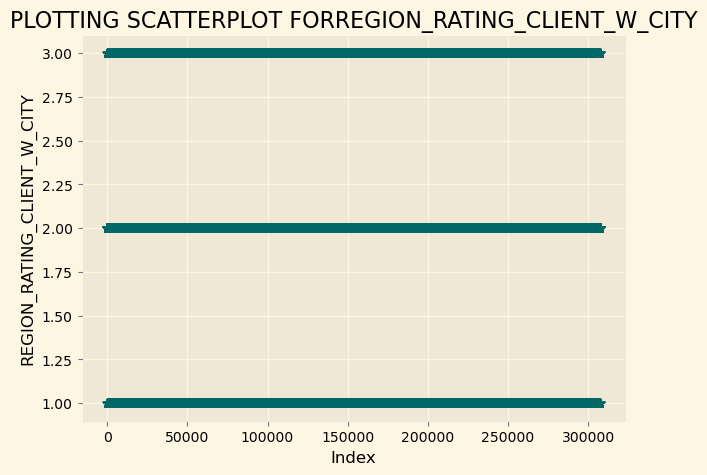

*****************************************************************************************************************


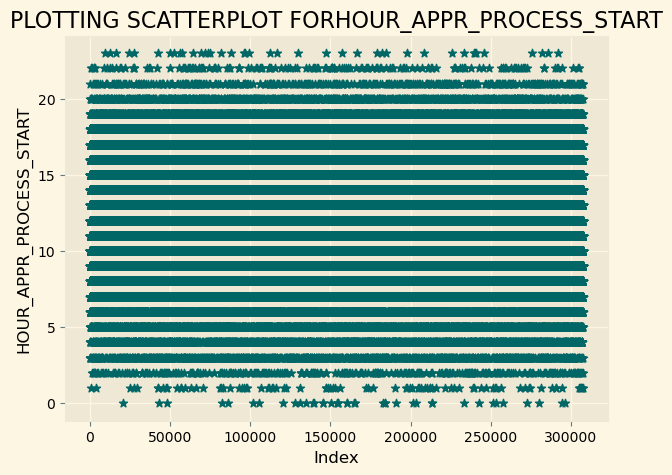

*****************************************************************************************************************


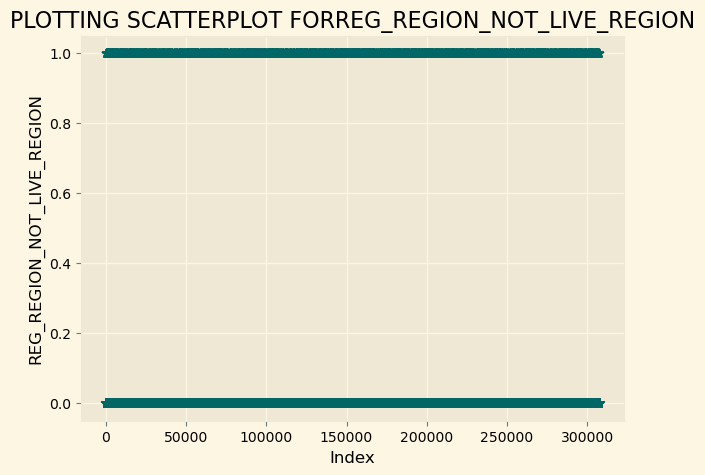

*****************************************************************************************************************


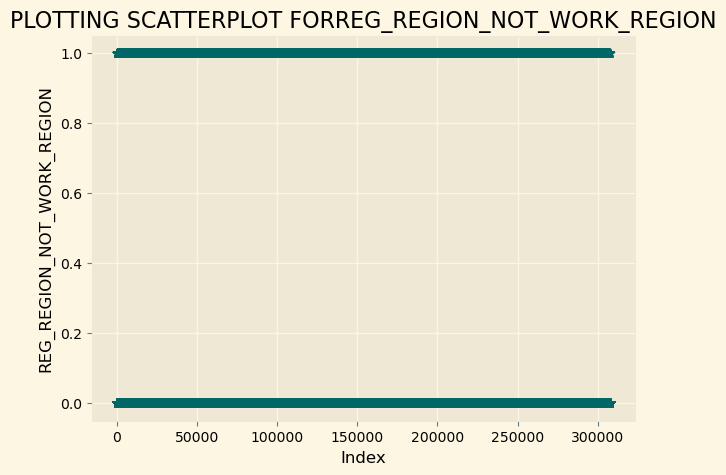

*****************************************************************************************************************


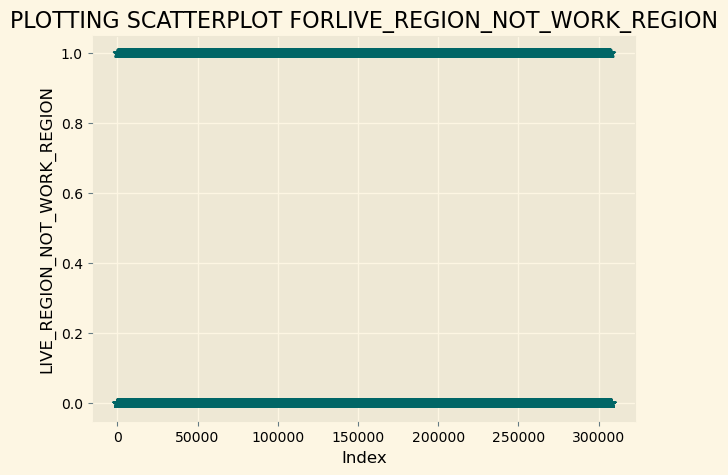

*****************************************************************************************************************


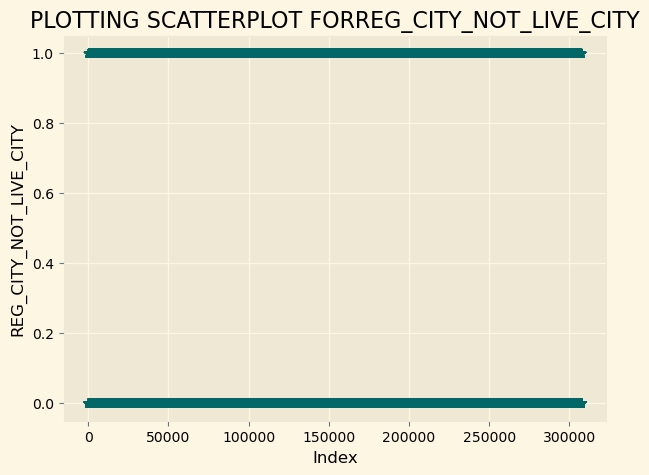

*****************************************************************************************************************


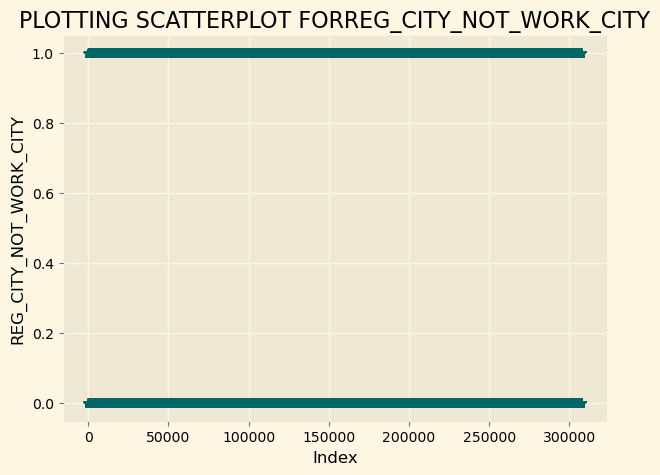

*****************************************************************************************************************


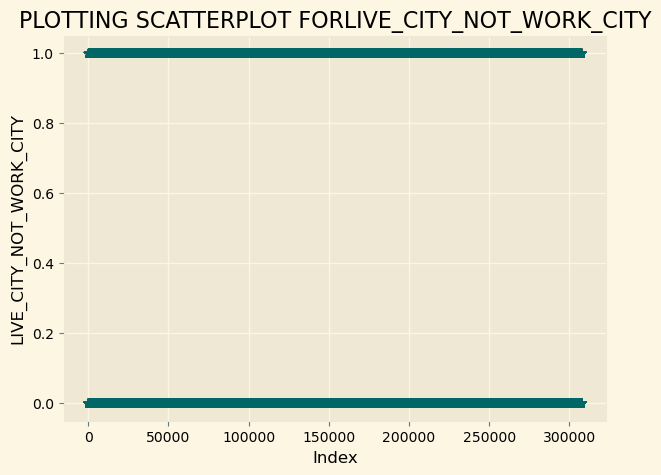

*****************************************************************************************************************


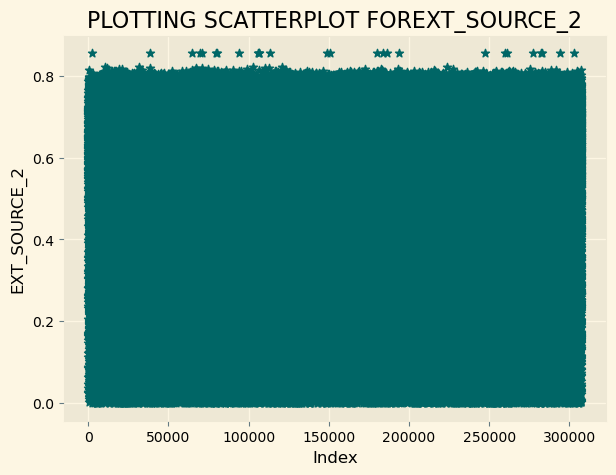

*****************************************************************************************************************


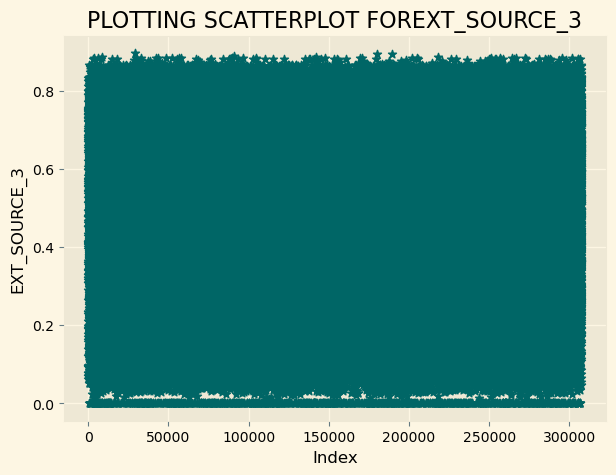

*****************************************************************************************************************


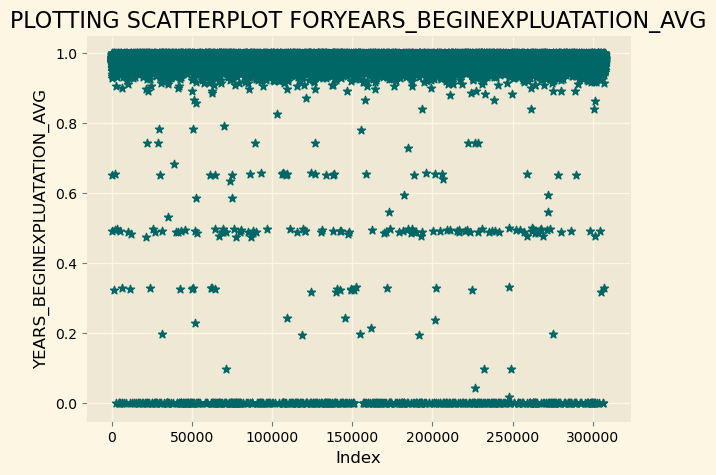

*****************************************************************************************************************


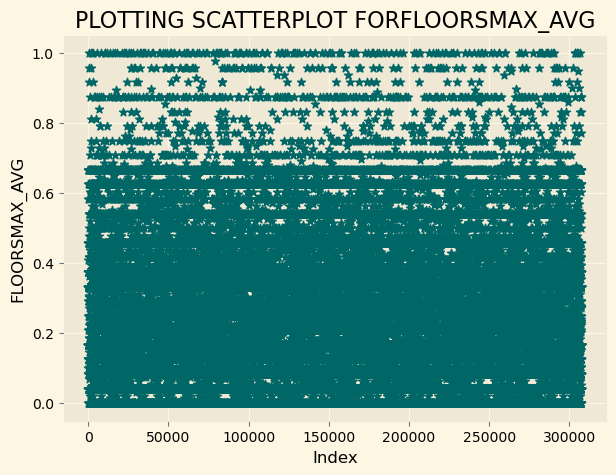

*****************************************************************************************************************


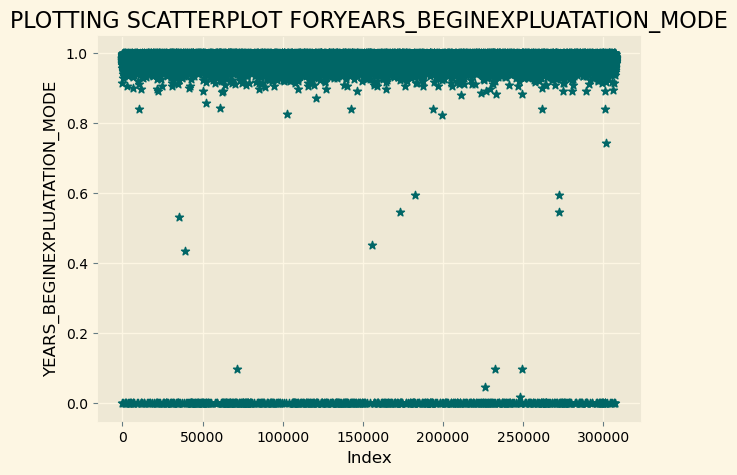

*****************************************************************************************************************


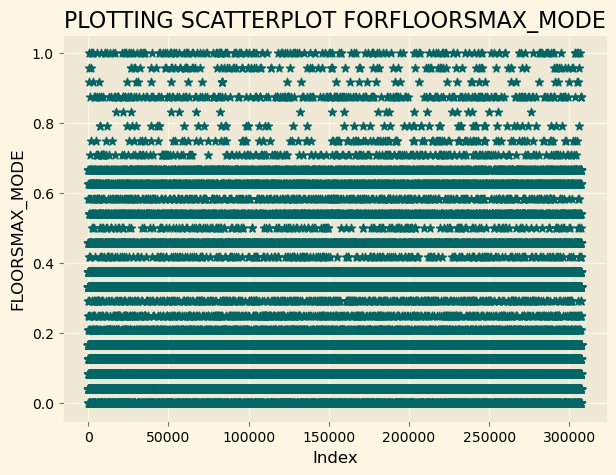

*****************************************************************************************************************


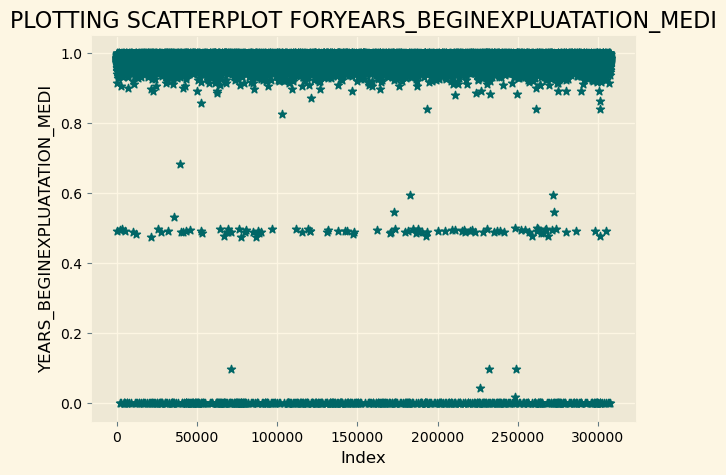

*****************************************************************************************************************


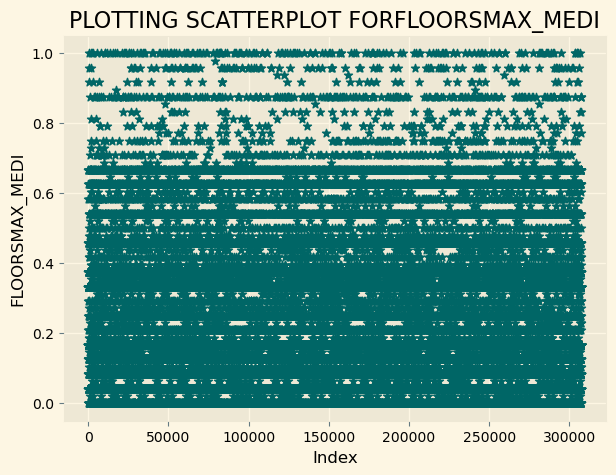

*****************************************************************************************************************


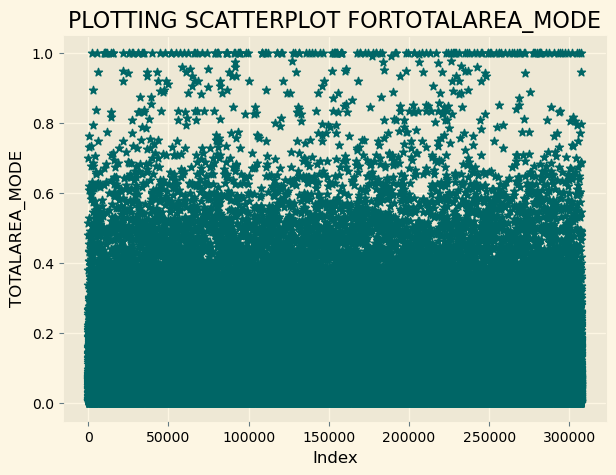

*****************************************************************************************************************


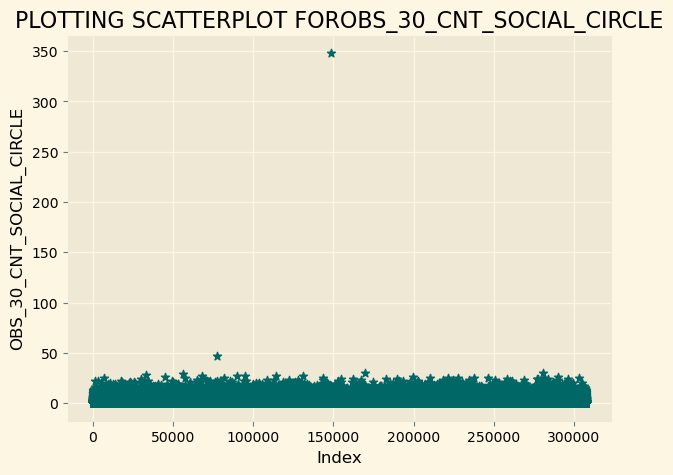

*****************************************************************************************************************


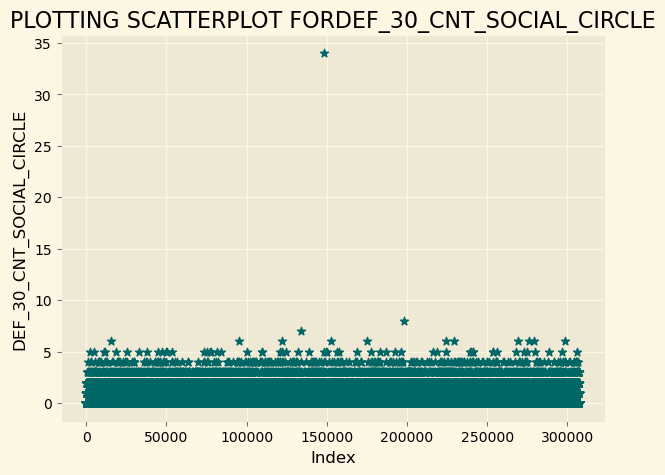

*****************************************************************************************************************


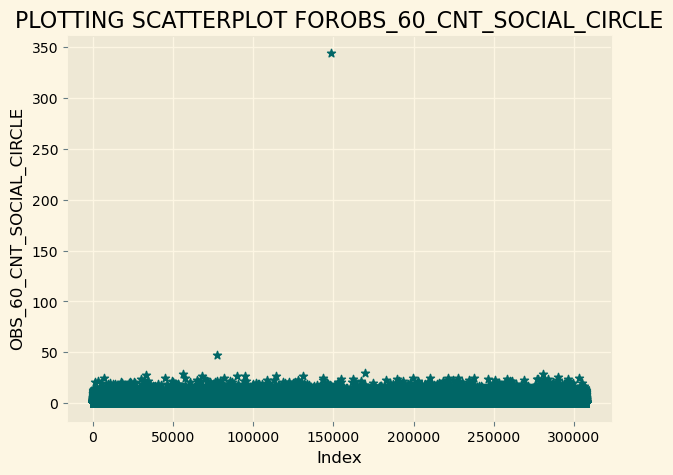

*****************************************************************************************************************


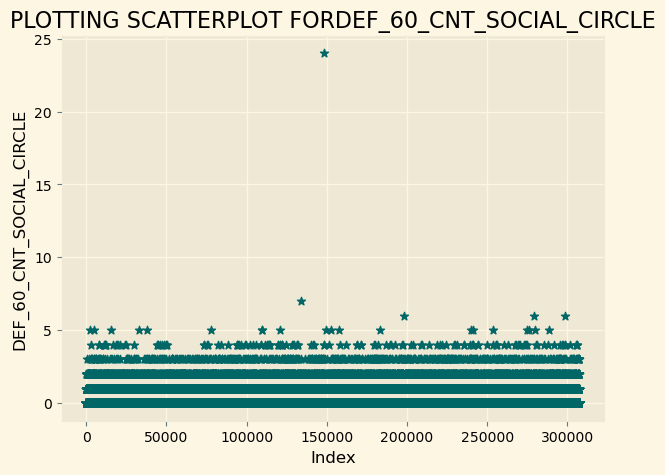

*****************************************************************************************************************


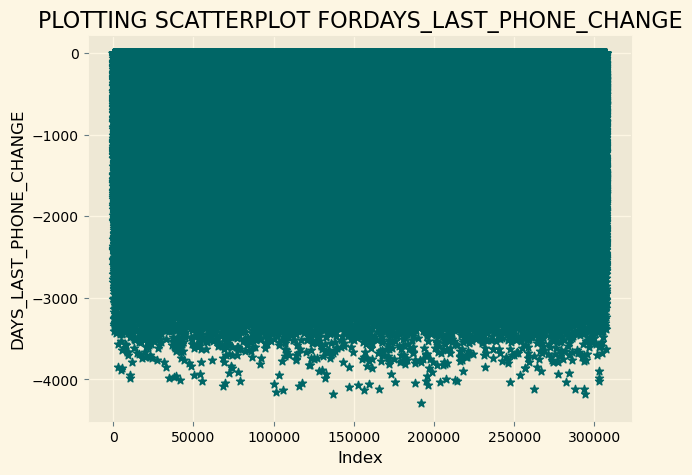

*****************************************************************************************************************


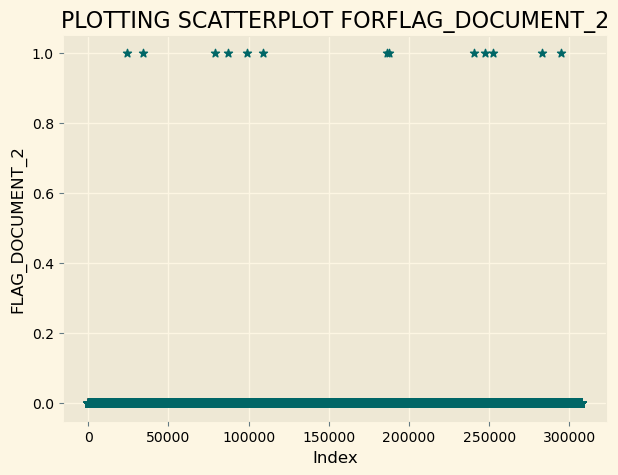

*****************************************************************************************************************


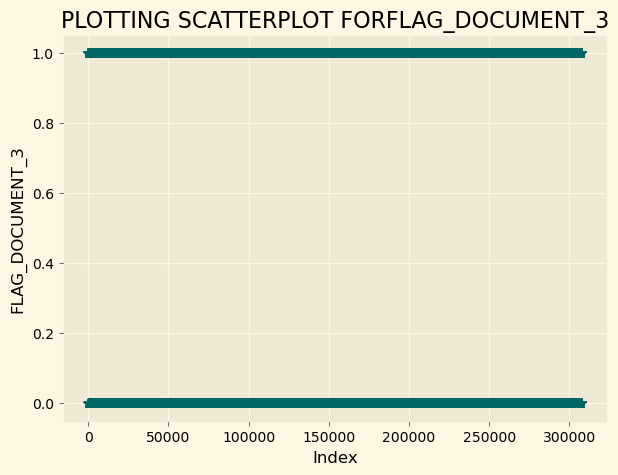

*****************************************************************************************************************


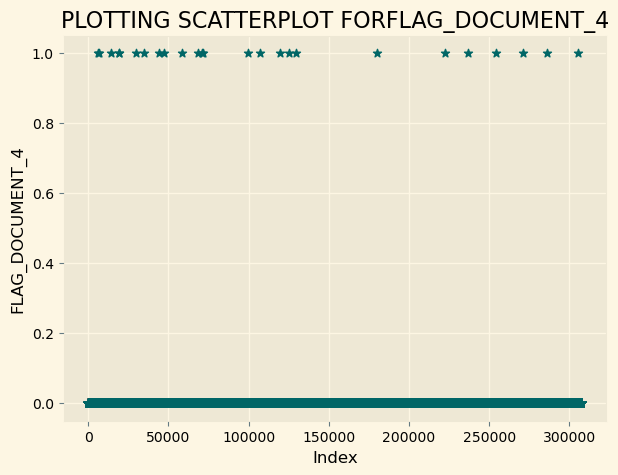

*****************************************************************************************************************


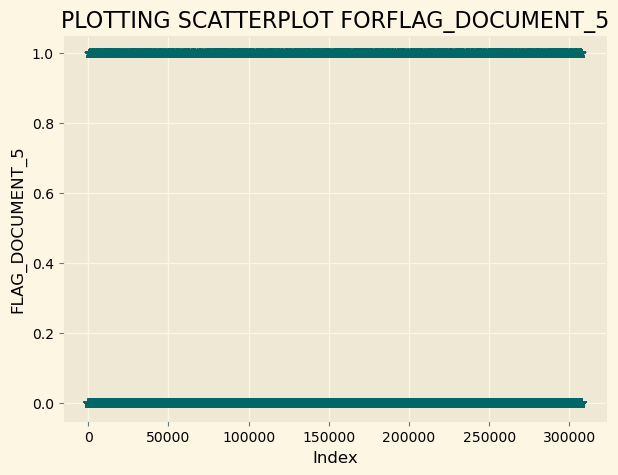

*****************************************************************************************************************


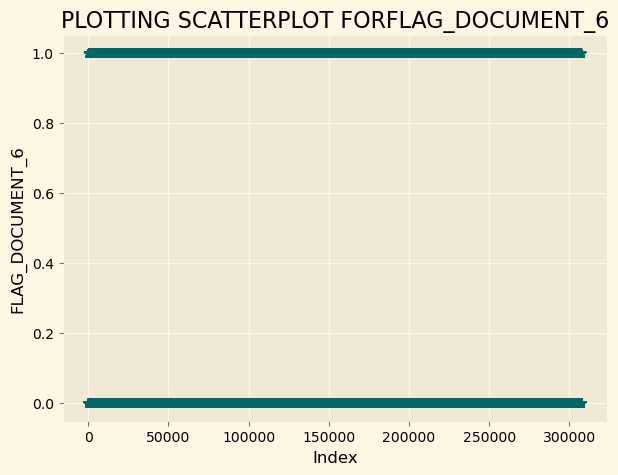

*****************************************************************************************************************


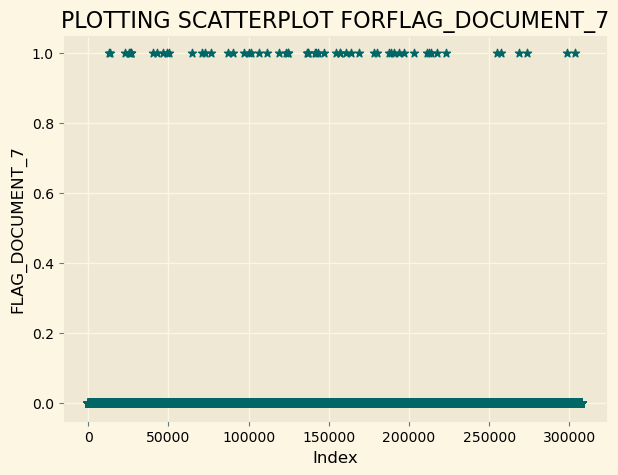

*****************************************************************************************************************


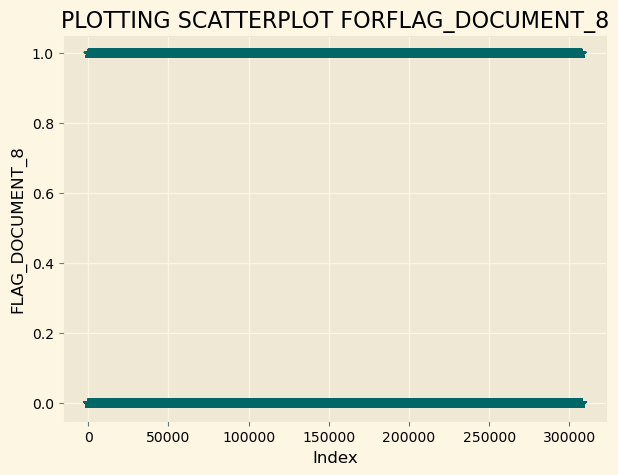

*****************************************************************************************************************


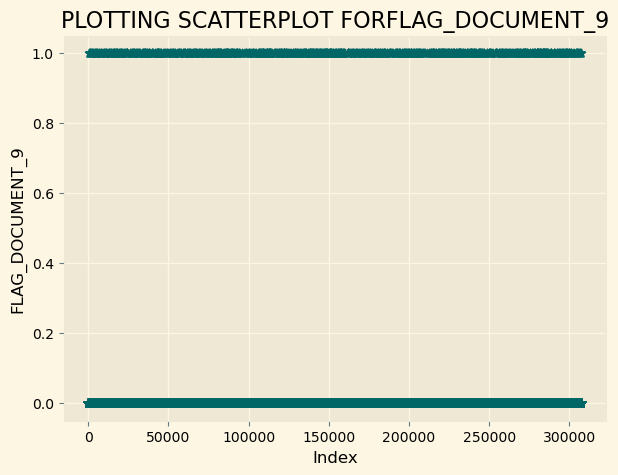

*****************************************************************************************************************


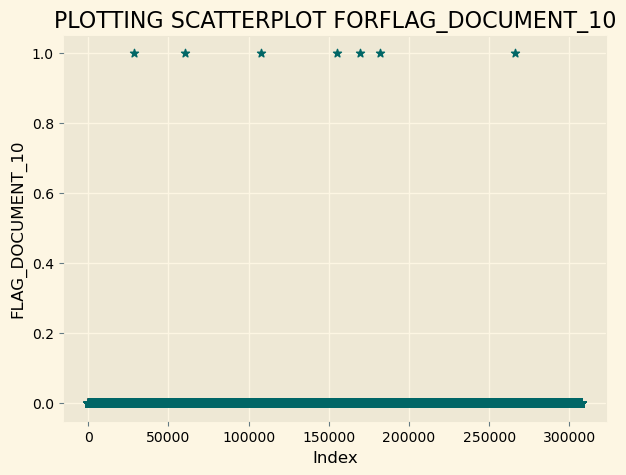

*****************************************************************************************************************


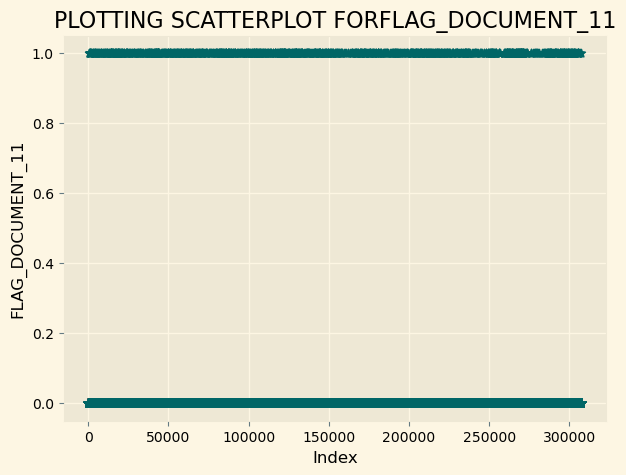

*****************************************************************************************************************


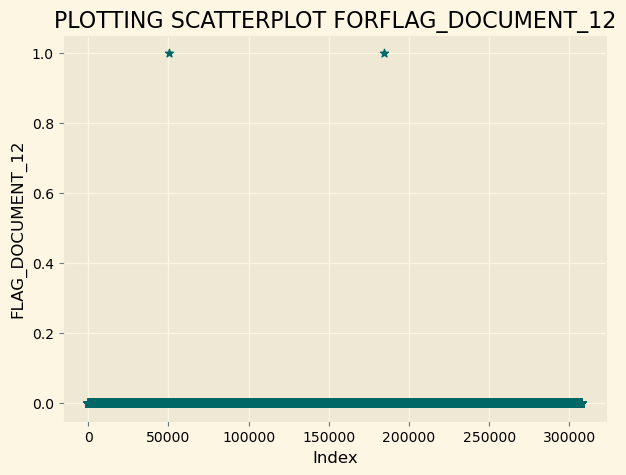

*****************************************************************************************************************


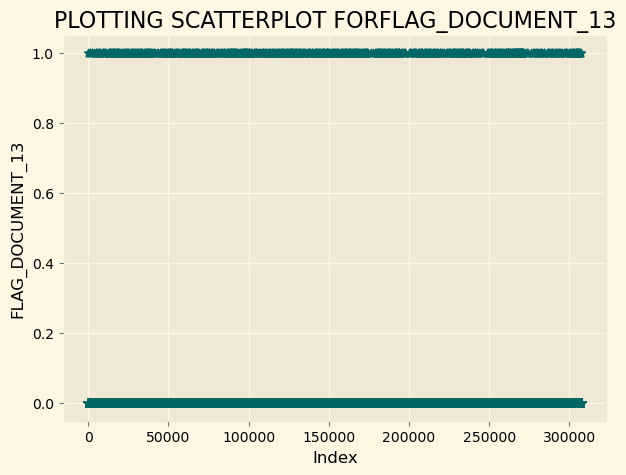

*****************************************************************************************************************


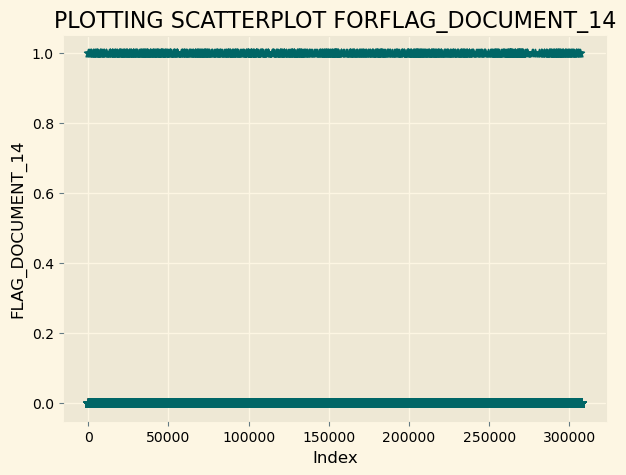

*****************************************************************************************************************


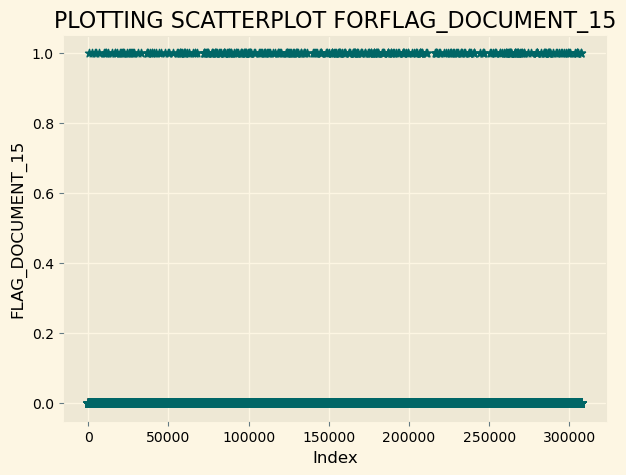

*****************************************************************************************************************


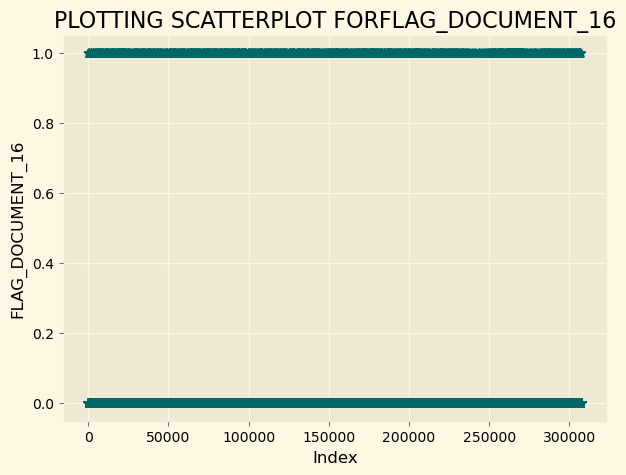

*****************************************************************************************************************


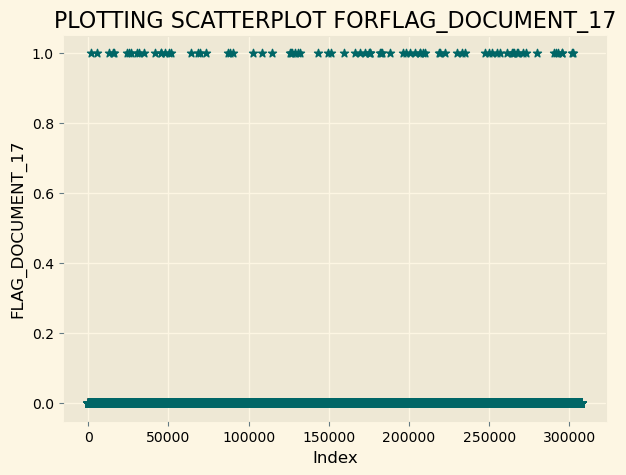

*****************************************************************************************************************


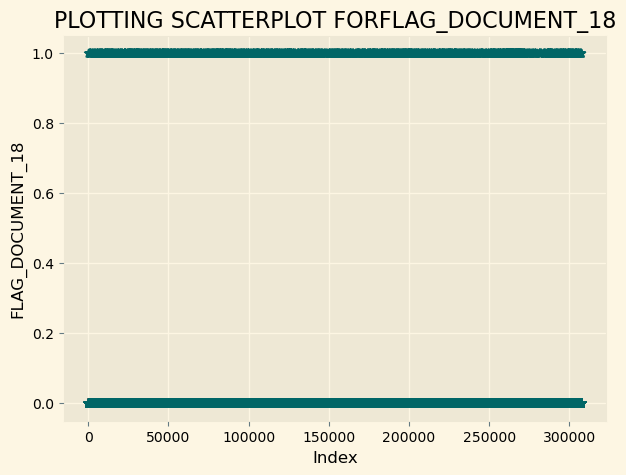

*****************************************************************************************************************


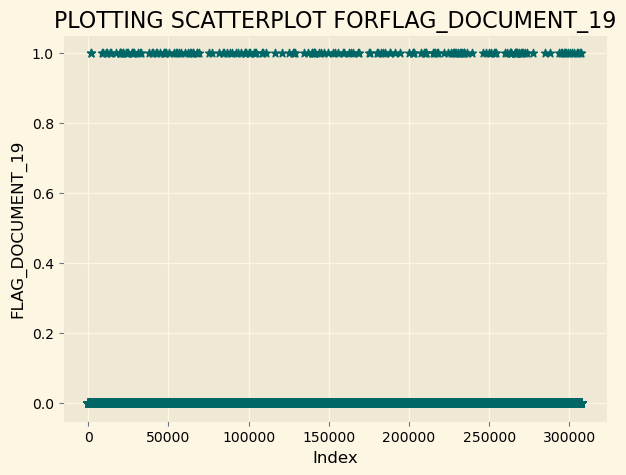

*****************************************************************************************************************


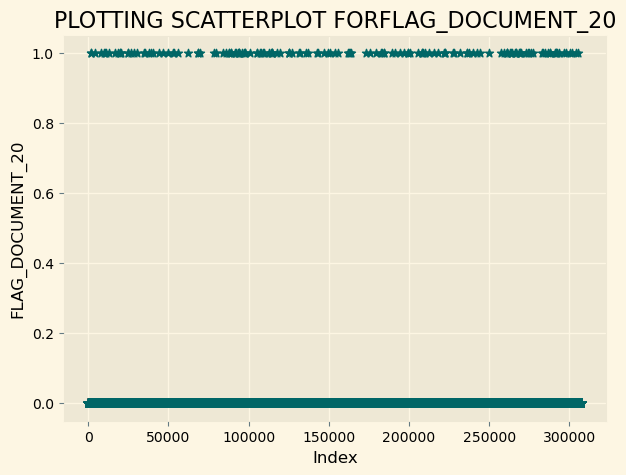

*****************************************************************************************************************


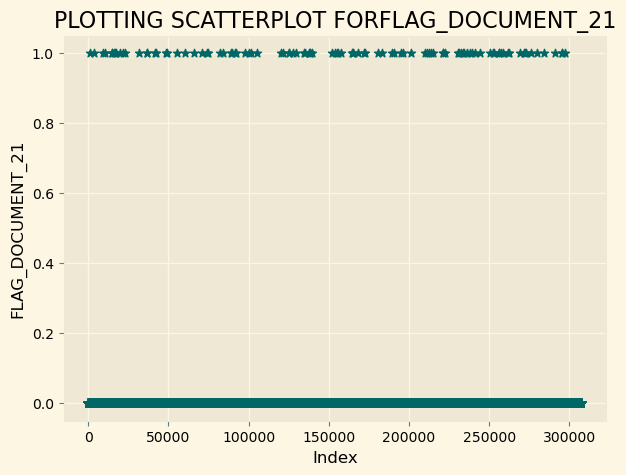

*****************************************************************************************************************


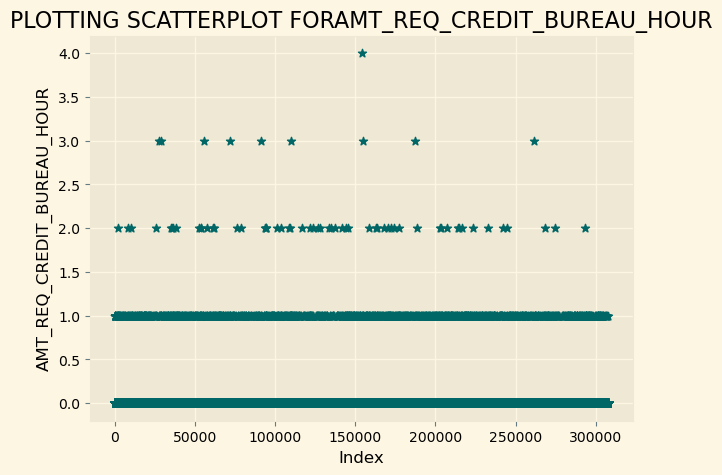

*****************************************************************************************************************


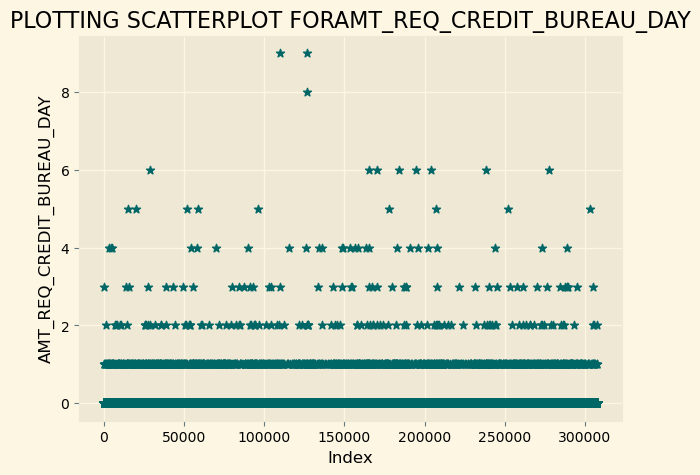

*****************************************************************************************************************


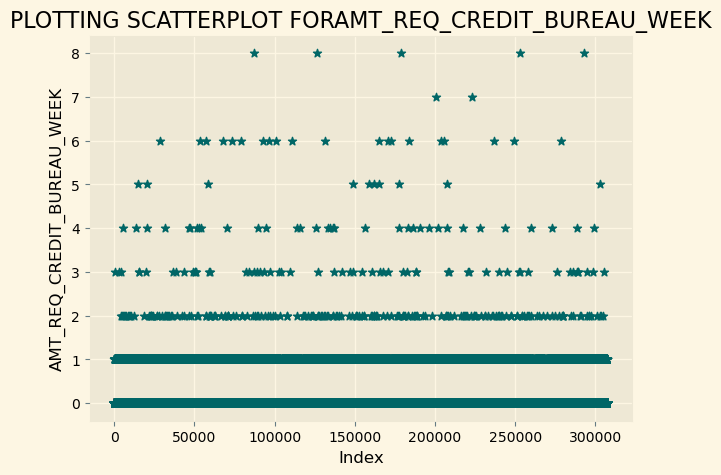

*****************************************************************************************************************


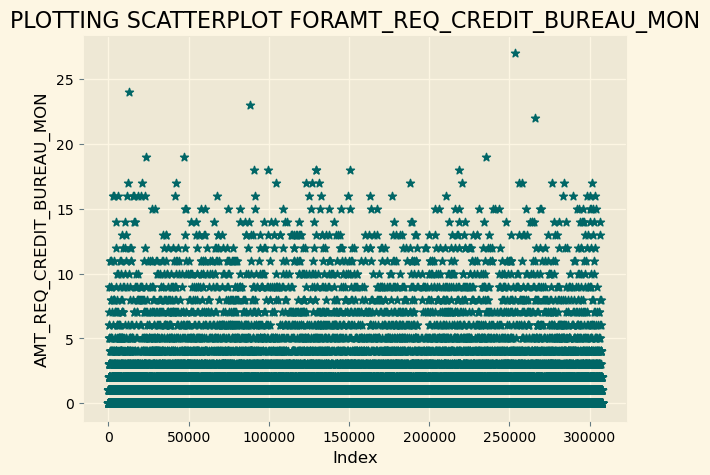

*****************************************************************************************************************


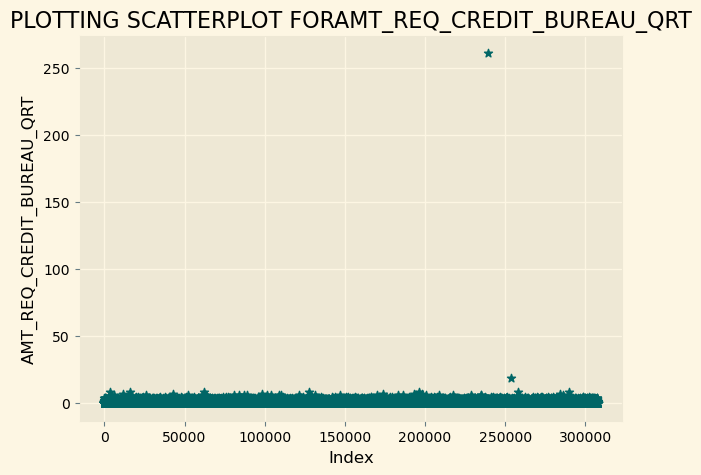

*****************************************************************************************************************


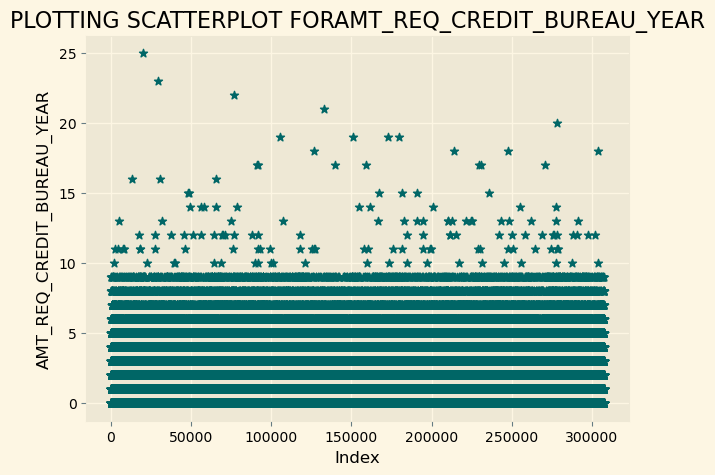

*****************************************************************************************************************


In [32]:
# # Plot each numerical column against the index of the DataFrame 'data'
plt.style.use('Solarize_Light2')

for column in data_numerical:
    plt.figure(figsize=(7,5))
    title="PLOTTING SCATTERPLOT FOR" + column
    plt.scatter(data.index,data[column],marker="*",color="#006666")
    plt.title(title)
    plt.xticks(color="black")
    plt.yticks(color="black")
    plt.xlabel('Index', color='black')  
    plt.ylabel(column,color="black" )#label for the y- axis
    plt.show()
    print("*****************************************************************************************************************")

### **OBSERVATION-3**
Examining outliers is largely dependent on the specifics of the business problem at hand. If we assume the data is accurate, the decision to exclude extreme values should be based on business needs. A review of various plots suggests that the data reporting is reliable. Therefore, instead of removing these points, we will highlight the columns that contain extreme values for further analysis.

The following columns require closer examination:

**CNT_CHILDREN**:
This indicates the number of children a client has. Cases where clients report more than 10 children are considered extreme.

**AMT_INCOME_TOTAL**:
This reflects the client's total income. A specific value around 1.2e8 stands out as significantly higher than others, indicating it may be an outlier worth considering for removal.

**FLAG_MOBILE**:
This indicates whether a client has a mobile phone. Its absence may or may not be classified as an outlier. Additionally, columns like OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, and OBS_60_CNT_SOCIAL_CIRCLE also deserve further attention.

# Let's us load the previous application data 

In [33]:
pdf=pd.read_csv("previous_application.csv")

In [34]:
pdf.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  ...  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877     Consumer loans  ...          -42.0             -37.0                        0.0
1     2802425      108129         Cash loans  ...       365243.0          365243.0                        1.0
2     2523466      122040         Cash loans  ...       365243.0          365243.0                        1.0
3     2819243      176158         Cash loans  ...         -182.0            -177.0                        1.0
4     1784265      202054         Cash loans  ...            NaN               NaN                        NaN

[5 rows x 37 columns]

# Task- 6 Merging dataframe

#### Merging DataFrames: Train and Previous Application Based on SK_ID_PREV

In [35]:
# Merge 'train' DataFrame with 'previous_application' DataFrame based on 'SK_ID_CURR'
# Using 'inner' join to retain only common rows between the two DataFrames
merged_data= data.merge(pdf, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [36]:
merged_data.head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE_x  ... DAYS_LAST_DUE DAYS_TERMINATION NFLAG_INSURED_ON_APPROVAL
0      100002      1           Cash loans  ...         -25.0            -17.0                       0.0
1      100003      0           Cash loans  ...        -536.0           -527.0                       1.0
2      100003      0           Cash loans  ...        -647.0           -639.0                       0.0
3      100003      0           Cash loans  ...       -1980.0          -1976.0                       1.0
4      100004      0      Revolving loans  ...        -724.0           -714.0                       0.0

[5 rows x 117 columns]

In [37]:
merged_data.shape

(1413701, 117)

## Segregating the dataset on Target = 0 and Target = 1

In [38]:
# Create a subset of the DataFrame "data" containing records where the 'TARGET' column is equal to '0'
data_0 = data.loc[data['TARGET'] == '0']

# Create a subset of the DataFrame 'train' containing records where the 'TARGET' column is equal to '1'
data_1 = data.loc[data['TARGET'] == '1']

In [39]:
# Create a subset of the DataFrame 'merged_data' containing records where the 'TARGET' column is equal to '0'
pdata_0 = merged_data.loc[merged_data['TARGET'] == '0']

# Create a subset of the DataFrame 'merged_data' containing records where the 'TARGET' column is equal to '1'
pdata_1 = merged_data.loc[merged_data['TARGET'] == '1']

# Task- 7 Bivariate/Multivariate Analysis

In [40]:
mul= pdata_1[['AMT_INCOME_TOTAL','DAYS_EMPLOYED','CNT_CHILDREN','AMT_CREDIT_x','AMT_CREDIT_y','AMT_ANNUITY_y','AMT_ANNUITY_x','DAYS_BIRTH','AMT_DOWN_PAYMENT',]]

In [41]:
correlation_matrix = mul.corr()
correlation_matrix

AMT_INCOME_TOTAL  DAYS_EMPLOYED  CNT_CHILDREN  ...  AMT_ANNUITY_x  DAYS_BIRTH  AMT_DOWN_PAYMENT
AMT_INCOME_TOTAL          1.000000       0.015863      0.001548  ...       0.055551    0.000318          0.003710
DAYS_EMPLOYED             0.015863       1.000000      0.200291  ...       0.084926   -0.580086          0.004984
CNT_CHILDREN              0.001548       0.200291      1.000000  ...       0.031277   -0.294938         -0.000801
AMT_CREDIT_x              0.043130      -0.007725     -0.010148  ...       0.745679    0.125433          0.038551
AMT_CREDIT_y              0.019166      -0.017408     -0.031337  ...       0.094217    0.111367          0.275166
AMT_ANNUITY_y             0.033361      -0.001138     -0.037902  ...       0.164643    0.119101          0.229057
AMT_ANNUITY_x             0.055551       0.084926      0.031277  ...       1.000000   -0.002645          0.048639
DAYS_BIRTH                0.000318      -0.580086     -0.294938  ...      -0.002645    1.000000          0.011323
AMT_DOWN_PAYMENT          0.003710       0.004984     -0.000801  ...       0.048639    0.011323          1.000000

[9 rows x 9 columns]

In [42]:
plt.style.use("default")

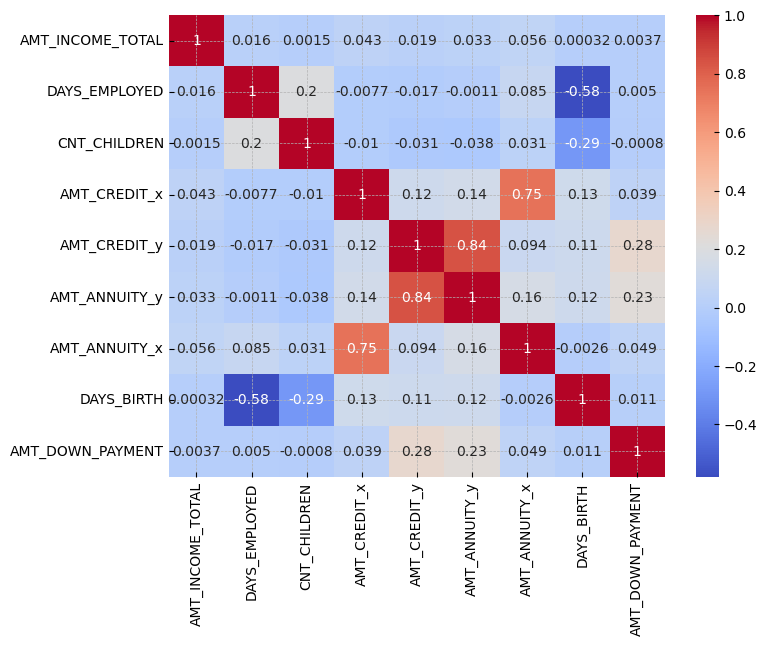

In [43]:
# creating a heatmap 
plt.style.use('bmh')
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True,cmap="coolwarm")
plt.show()

### **OBSERVATION-5**
--> AMT_CREDIT_x and AMT_ANNUITY_x show a strong positive correlation (0.75), indicating that higher credit requests are associated with higher annuity payments.

--> AMT_CREDIT_y and AMT_ANNUITY_y also show a strong positive correlation (0.84), suggesting a similar relationship in a different context.

**Since there is a strong correlation between AMT_CREDIT_x and AMT_ANNUITY_x  ,AMT_CREDIT_y and AMT_ANNUITY_y, using regression plot to further check the variation**

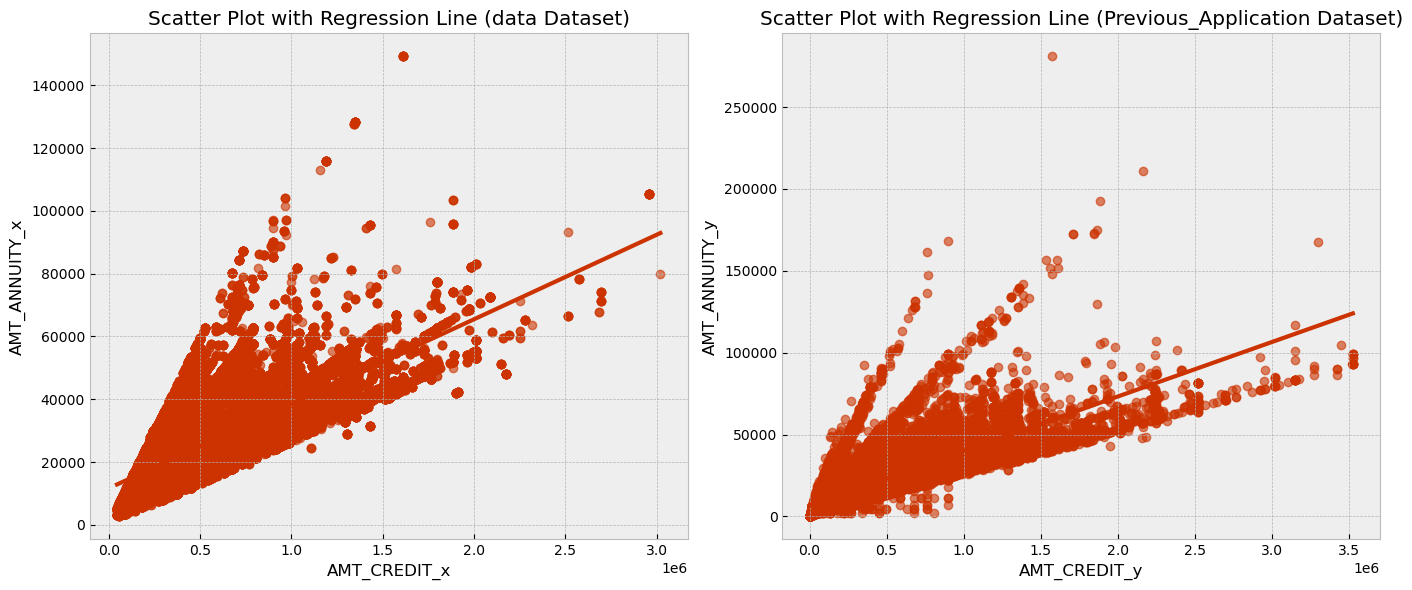

In [44]:
plt.figure(figsize=(14, 6))

#Analysis between amt_credit and amt_annuity from 'train' dataset - original dataframe
plt.subplot(1,2,1)
sns.regplot(data=pdata_1, x='AMT_CREDIT_x', y='AMT_ANNUITY_x', scatter_kws={'alpha':0.6},color="#cc3300")
plt.title('Scatter Plot with Regression Line (data Dataset)')
plt.xlabel('AMT_CREDIT_x')
plt.ylabel('AMT_ANNUITY_x')
plt.grid(True)

#Analysis between amt_credit and amt_annuity from 'previous application' dataset - previous dataframe
plt.subplot(1,2,2)
sns.regplot(data=pdata_1, x='AMT_CREDIT_y', y='AMT_ANNUITY_y', scatter_kws={'alpha':0.6},color="#cc3300")
plt.title('Scatter Plot with Regression Line (Previous_Application Dataset)')
plt.xlabel('AMT_CREDIT_y')
plt.ylabel('AMT_ANNUITY_y')
plt.grid(True)
plt.tight_layout()

plt.show()

The plot also includes a regression line, which models the general trend between the two variables. The upward slope of this line suggests a positive correlation, indicating that as AMT_CREDIT_x increases, AMT_ANNUITY_x also tends to increase. However, there is notable spread in the data, meaning the relationship is not perfectly linear, and there is variability around the trend line.

 <h3>SOME MORE **UNIVARIATE ANALSIS** BASED ON THE DATA OF PREVIOUS APPLICATION</h3>

In [45]:
# value Count of Loan Rejection Reasons based on te previous data
merged_data["CODE_REJECT_REASON"].unique()
rejection_counts = merged_data["CODE_REJECT_REASON"].value_counts()

In [46]:
payment_type=merged_data["NAME_PAYMENT_TYPE"].value_counts()

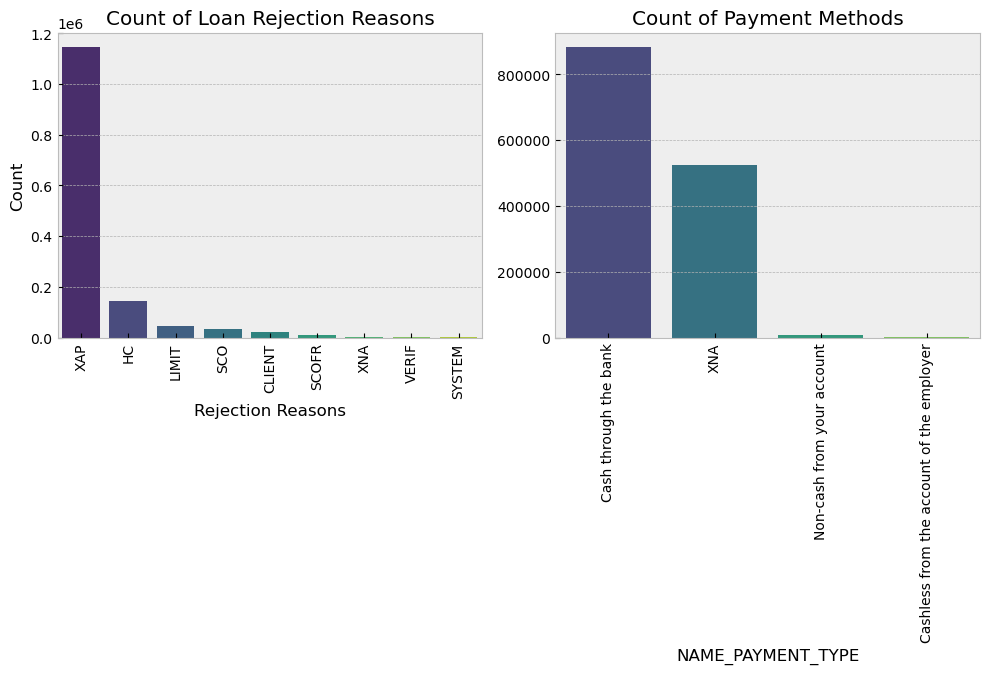

In [47]:
# Create a bar chart


plt.figure(figsize=(10, 7))

plt.subplot(1,2,1)
# Create a bar chart for Count of Loan Rejection Reasons
sns.barplot(x=rejection_counts.index, y=rejection_counts.values, palette="viridis")
plt.title("Count of Loan Rejection Reasons")
plt.xlabel("Rejection Reasons",color="black")
plt.ylabel("Count",color="black")
plt.xticks(rotation=90,color="black")# Rotate x labels for better readability
plt.yticks(color="black")

plt.subplot(1,2,2)
# Create a bar chart for Count of payment methods
sns.barplot(x=payment_type.index, y=payment_type.values, palette="viridis")
plt.title("Count of Payment Methods")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


### **OBSERVATION-6**
The chart suggests that "XAP" is a critical rejection reason and should be further investigated to understand why it impacts such a large number of applications. Other reasons have minimal impact in comparison, so the primary focus for process improvement or policy change could be on addressing issues related to "XAP."

## SUMMARY

Throughout this practice session, we conducted a series of tasks that yielded valuable insights into the loan applicant dataset. We effectively identified missing values, explored variable distributions, analyzed outliers, and examined relationships among different attributes.

This analysis establishes a foundational understanding of the dataset and its implications for loan management and risk assessment. These insights can inform decision-making processes moving forward, such as the development of predictive models or refinement of loan approval criteria, ultimately enhancing lending practices and reducing default risks.
